In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [11]:
from ipynb.fs.full.Funciones_basicas import *
from ipynb.fs.full.Algoritmos import *
from ipynb.fs.full.Visualizaciones import *

In [14]:
path = '../data/graph_geom_corrected_cycles.csv'
csv_grafo = pd.read_csv(path, sep=';')

path_pesos = '../data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)

out = {15190, 1003206, 16503, 15004, 14062, 13735, 1003167, 1003744, 1003746, 1003950, 13730, 13731, 13732, 13733, 15131, 16094, 16095, 131099}

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        S.add(origin)
        S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        G.add_edge(id_[origin], id_[dest])
        
        
###################################################################################################

        
path = '../data/corrected_dijkstra.csv'
csv_grafo = pd.read_csv(path, sep=',')

path_pesos = '../data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)

out = {15190, 1003206, 16503, 15004, 14062, 13735, 1003167, 1003744, 1003746, 1003950, 13730, 13731, 13732, 13733, 15131, 16094, 16095, 131099}

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        S.add(origin)
        S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

T = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        T.add_edge(id_[origin], id_[dest])
    
N = l

W = [0] * N

for u in range(N):
    if pesos[pesos['ID_tapa'] == _id[u]].shape[0] >= 1:  ## tomamos primera columna con el id, si no hay peso = 0
        W[u] = pesos[pesos['ID_tapa'] == _id[u]].iloc[0]['per_predio']

In [15]:
init_possibilities, init_next_dicts = get_dp_table(T, [0] * N, 8, 743, 50)

In [47]:
def simulate(G, W, K_func, s_init, nodes):
    T = []; N = len(W)

    for r in nodes:
        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0 for u in range(N)]

        R = N; s = s_init; ks = []
        for t in range(100):
            R = N - sum(V)
            P = []; k = K_func(R); ks.append(k)
            if t == 0:
                P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, k, s)
            elif N - sum(V) > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif N - sum(V) > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            for u in P[::-1]:
                if CV[u]:
                    I = set(get_ideal(G, V, u)[::-1])
                    V = [not (v in I) for v in range(N)]
                    s = u; break
                else:
                    V, _ = visit(G, V, u)

            size, weight = get_size_weight(G, W, V, s)

            if size == 1 or weight <= 200:
                T.append(t + 1)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}    ks: {ks}")
                break
            if t == 99:
                T.append(100)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}")

    print(sum(T) / len(T), max(T))
    
    return T


In [ ]:
def proportional(R):
    round(6 * R / N + 2)

In [87]:
def uniform(R, x):
    if R == N:
        return 8
    return x

I = [-1 for i in range(N)]
for i in range(2, 9):
    
    S = []
    for u in range(N):
        if I[u] == -1:
            S.append(u)
    
    iters = simulate(T, W, lambda x: uniform(x, i), 743, S)
    for j in range(len(iters)):
        if iters[j] <= 5:
            I[S[j]] = i
    print("\n\n##########################################################################\n\n\n")

Result 0: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 5: 8    acc: 8.833333333333334    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 6: 8    acc: 8.714285714285714    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 7: 8    acc: 8.625    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 8: 8    acc: 8.555555555555555    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 9: 8    acc: 8.5    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 10: 8    acc: 8.454545454545455    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 11: 8    acc: 8.416666666666666    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 12: 8    acc: 8.384615384615385    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 13: 8    acc: 8.357142857142858    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 14: 1    acc: 7.866666666666666    ks: [8]
Result 15: 1    acc: 7.4375    ks: [8]
Result 1

Result 122: 8    acc: 7.902439024390244    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 123: 8    acc: 7.903225806451613    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 124: 9    acc: 7.912    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 125: 8    acc: 7.912698412698413    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 126: 9    acc: 7.921259842519685    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 127: 9    acc: 7.9296875    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 128: 9    acc: 7.937984496124031    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 129: 9    acc: 7.946153846153846    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 130: 9    acc: 7.9541984732824424    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 131: 9    acc: 7.962121212121212    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 132: 8    acc: 7.962406015037594    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 133: 9    acc: 7.970149253731344    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 134: 9    acc: 7.977777777777778    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 135: 9    acc: 7.985294117647059    ks: [8, 2, 2,

Result 239: 9    acc: 7.908333333333333    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 240: 7    acc: 7.904564315352697    ks: [8, 2, 2, 2, 2, 2, 2]
Result 241: 7    acc: 7.900826446280992    ks: [8, 2, 2, 2, 2, 2, 2]
Result 242: 4    acc: 7.88477366255144    ks: [8, 2, 2, 2]
Result 243: 8    acc: 7.885245901639344    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 244: 8    acc: 7.885714285714286    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 245: 10    acc: 7.894308943089431    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 246: 7    acc: 7.890688259109312    ks: [8, 2, 2, 2, 2, 2, 2]
Result 247: 7    acc: 7.887096774193548    ks: [8, 2, 2, 2, 2, 2, 2]
Result 248: 4    acc: 7.871485943775101    ks: [8, 2, 2, 2]
Result 249: 8    acc: 7.872    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 250: 8    acc: 7.872509960159363    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 251: 8    acc: 7.873015873015873    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 252: 8    acc: 7.873517786561265    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 253: 8    acc: 7.8740157

Result 365: 8    acc: 7.379781420765028    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 366: 8    acc: 7.381471389645776    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 367: 8    acc: 7.383152173913044    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 368: 8    acc: 7.384823848238482    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 369: 8    acc: 7.386486486486486    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 370: 8    acc: 7.388140161725067    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 371: 8    acc: 7.389784946236559    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 372: 8    acc: 7.39142091152815    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 373: 8    acc: 7.393048128342246    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 374: 8    acc: 7.394666666666667    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 375: 8    acc: 7.3962765957446805    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 376: 8    acc: 7.3978779840848805    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 377: 10    acc: 7.404761904761905    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 378: 8    acc: 7.406332453825858    ks: [8, 2, 2,

Result 488: 7    acc: 7.251533742331288    ks: [8, 2, 2, 2, 2, 2, 2]
Result 489: 11    acc: 7.259183673469388    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 490: 8    acc: 7.260692464358452    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 491: 8    acc: 7.262195121951219    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 492: 8    acc: 7.26369168356998    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 493: 8    acc: 7.265182186234818    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 494: 8    acc: 7.266666666666667    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 495: 7    acc: 7.266129032258065    ks: [8, 2, 2, 2, 2, 2, 2]
Result 496: 7    acc: 7.26559356136821    ks: [8, 2, 2, 2, 2, 2, 2]
Result 497: 7    acc: 7.265060240963855    ks: [8, 2, 2, 2, 2, 2, 2]
Result 498: 6    acc: 7.2625250501002006    ks: [8, 2, 2, 2, 2, 2]
Result 499: 8    acc: 7.264    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 500: 7    acc: 7.263473053892215    ks: [8, 2, 2, 2, 2, 2, 2]
Result 501: 8    acc: 7.264940239043825    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 502: 8   

Result 603: 8    acc: 7.380794701986755    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 604: 8    acc: 7.381818181818182    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 605: 9    acc: 7.384488448844884    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 606: 8    acc: 7.385502471169687    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 607: 9    acc: 7.3881578947368425    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 608: 9    acc: 7.390804597701149    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 609: 10    acc: 7.395081967213115    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 610: 8    acc: 7.396072013093289    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 611: 10    acc: 7.400326797385621    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 612: 10    acc: 7.404567699836868    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 613: 8    acc: 7.405537459283388    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 614: 10    acc: 7.409756097560976    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 615: 10    acc: 7.413961038961039    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 616: 8    ac

Result 723: 9    acc: 7.3687845303867405    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 724: 8    acc: 7.369655172413793    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 725: 8    acc: 7.370523415977962    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 726: 9    acc: 7.372764786795048    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 727: 8    acc: 7.373626373626373    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 728: 9    acc: 7.3758573388203015    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 729: 7    acc: 7.375342465753425    ks: [8, 2, 2, 2, 2, 2, 2]
Result 730: 7    acc: 7.374829001367989    ks: [8, 2, 2, 2, 2, 2, 2]
Result 731: 7    acc: 7.3743169398907105    ks: [8, 2, 2, 2, 2, 2, 2]
Result 732: 7    acc: 7.373806275579809    ks: [8, 2, 2, 2, 2, 2, 2]
Result 733: 8    acc: 7.374659400544959    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 734: 8    acc: 7.375510204081633    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 735: 8    acc: 7.376358695652174    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 736: 8    acc: 7.377204884667571    ks: [8, 2, 2, 2, 2, 2

Result 841: 7    acc: 7.358669833729216    ks: [8, 2, 2, 2, 2, 2, 2]
Result 842: 9    acc: 7.3606168446026095    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 843: 9    acc: 7.362559241706161    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 844: 9    acc: 7.364497041420118    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 845: 9    acc: 7.366430260047282    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 846: 9    acc: 7.368358913813459    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 847: 8    acc: 7.369103773584905    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 848: 6    acc: 7.3674911660777385    ks: [8, 2, 2, 2, 2, 2]
Result 849: 9    acc: 7.369411764705882    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 850: 9    acc: 7.371327849588719    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 851: 9    acc: 7.373239436619718    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 852: 9    acc: 7.375146541617819    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 853: 9    acc: 7.377049180327869    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 854: 9    acc: 7.378947368421053  

Result 959: 6    acc: 7.352083333333334    ks: [8, 2, 2, 2, 2, 2]
Result 960: 8    acc: 7.352757544224766    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 961: 5    acc: 7.350311850311851    ks: [8, 2, 2, 2, 2]
Result 962: 8    acc: 7.350986500519211    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 963: 6    acc: 7.3495850622406635    ks: [8, 2, 2, 2, 2, 2]
Result 964: 4    acc: 7.346113989637305    ks: [8, 2, 2, 2]
Result 965: 4    acc: 7.342650103519669    ks: [8, 2, 2, 2]
Result 966: 4    acc: 7.339193381592554    ks: [8, 2, 2, 2]
Result 967: 4    acc: 7.335743801652892    ks: [8, 2, 2, 2]
Result 968: 4    acc: 7.332301341589267    ks: [8, 2, 2, 2]
Result 969: 7    acc: 7.331958762886598    ks: [8, 2, 2, 2, 2, 2, 2]
Result 970: 6    acc: 7.33058702368692    ks: [8, 2, 2, 2, 2, 2]
Result 971: 7    acc: 7.330246913580247    ks: [8, 2, 2, 2, 2, 2, 2]
Result 972: 4    acc: 7.326824254881809    ks: [8, 2, 2, 2]
Result 973: 4    acc: 7.323408624229979    ks: [8, 2, 2, 2]
Result 974: 4    acc: 7.32    ks: [8,

Result 1079: 8    acc: 7.287962962962963    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1080: 7    acc: 7.287696577243294    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1081: 3    acc: 7.28373382624769    ks: [8, 2, 2]
Result 1082: 8    acc: 7.284395198522622    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1083: 8    acc: 7.285055350553505    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1084: 8    acc: 7.285714285714286    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1085: 9    acc: 7.287292817679558    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1086: 9    acc: 7.28886844526219    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1087: 9    acc: 7.290441176470588    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1088: 9    acc: 7.292011019283747    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1089: 9    acc: 7.293577981651376    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1090: 9    acc: 7.295142071494042    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1091: 9    acc: 7.2967032967032965    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1092: 9    acc: 7.298261665141812    ks: [

Result 1200: 7    acc: 7.2248126561199    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1201: 7    acc: 7.224625623960066    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1202: 7    acc: 7.224438902743142    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1203: 7    acc: 7.224252491694352    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1204: 7    acc: 7.224066390041494    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1205: 9    acc: 7.225538971807628    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1206: 10    acc: 7.2278376139188065    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1207: 10    acc: 7.2301324503311255    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1208: 10    acc: 7.2324234904880065    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1209: 8    acc: 7.2330578512396695    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1210: 8    acc: 7.233691164327002    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1211: 8    acc: 7.234323432343234    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1212: 7    acc: 7.234130255564716    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1213: 7    acc: 7.233937397034596   

Result 1315: 7    acc: 7.301671732522796    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1316: 7    acc: 7.301442672741079    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1317: 7    acc: 7.301213960546282    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1318: 7    acc: 7.300985595147839    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1319: 8    acc: 7.301515151515152    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1320: 8    acc: 7.302043906131718    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1321: 8    acc: 7.302571860816944    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1322: 8    acc: 7.303099017384731    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1323: 8    acc: 7.303625377643504    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1324: 8    acc: 7.304150943396227    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1325: 8    acc: 7.304675716440422    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1326: 8    acc: 7.305199698568199    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1327: 8    acc: 7.305722891566265    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1328: 8    acc: 7.306245297215952    ks: [8, 2, 2, 2, 2,

Result 1433: 7    acc: 7.298465829846583    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1434: 7    acc: 7.298257839721255    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1435: 7    acc: 7.298050139275766    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1436: 7    acc: 7.297842727905358    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1437: 7    acc: 7.297635605006954    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1438: 7    acc: 7.2974287699791525    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1439: 7    acc: 7.2972222222222225    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1440: 7    acc: 7.297015961138099    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1441: 7    acc: 7.296809986130374    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1442: 7    acc: 7.296604296604297    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1443: 7    acc: 7.296398891966759    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1444: 7    acc: 7.296193771626298    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1445: 7    acc: 7.295988934993084    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1446: 7    acc: 7.295784381478922    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1447: 8    

Result 1549: 7    acc: 7.3109677419354835    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1550: 8    acc: 7.311411992263056    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1551: 8    acc: 7.311855670103093    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1552: 8    acc: 7.3122987765614935    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1553: 7    acc: 7.312097812097812    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1554: 7    acc: 7.311897106109325    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1555: 7    acc: 7.311696658097686    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1556: 7    acc: 7.311496467565831    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1557: 7    acc: 7.311296534017972    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1558: 7    acc: 7.3110968569595896    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1559: 7    acc: 7.310897435897436    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1560: 9    acc: 7.311979500320308    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1561: 9    acc: 7.313060179257362    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1562: 7    acc: 7.312859884836852    ks: [8, 2, 2, 2, 2, 2,

Result 1664: 9    acc: 7.335735735735736    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1665: 9    acc: 7.336734693877551    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1666: 9    acc: 7.3377324535092985    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1667: 9    acc: 7.338729016786571    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1668: 9    acc: 7.339724385859796    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1669: 7    acc: 7.339520958083832    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1670: 7    acc: 7.339317773788151    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1671: 7    acc: 7.339114832535885    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1672: 7    acc: 7.338912133891213    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1673: 7    acc: 7.338709677419355    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1674: 8    acc: 7.33910447761194    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1675: 7    acc: 7.3389021479713605    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1676: 9    acc: 7.339892665474061    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1677: 9    acc: 7.340882002383791    ks: [8

Result 1777: 8    acc: 7.38132733408324    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1778: 10    acc: 7.382799325463743    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1779: 10    acc: 7.384269662921349    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1780: 10    acc: 7.385738349241999    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1781: 10    acc: 7.3872053872053876    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1782: 9    acc: 7.388109927089175    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1783: 9    acc: 7.389013452914798    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1784: 9    acc: 7.389915966386555    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1785: 9    acc: 7.3908174692049275    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1786: 10    acc: 7.392277560156687    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1787: 10    acc: 7.3937360178970915    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1788: 6    acc: 7.3929569591950814    ks: [8, 2, 2, 2, 2, 2]
Result 1789: 6    acc: 7.39217877094972    ks: [8, 2, 2, 2, 2, 2]
Result 

Result 1891: 8    acc: 7.409619450317125    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1892: 9    acc: 7.410459587955626    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1893: 9    acc: 7.41129883843717    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1894: 9    acc: 7.4121372031662265    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1895: 9    acc: 7.412974683544304    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1896: 7    acc: 7.412756984712704    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1897: 7    acc: 7.412539515279241    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1898: 7    acc: 7.412322274881516    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1899: 7    acc: 7.412105263157895    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1900: 7    acc: 7.4118884797475015    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1901: 7    acc: 7.4116719242902205    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1902: 7    acc: 7.411455596426695    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1903: 7    acc: 7.411239495798319    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1904: 7    acc: 7.411023622047244    ks: [8, 2, 2, 2, 

Result 2008: 7    acc: 7.422598307615729    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2009: 7    acc: 7.422388059701492    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2010: 7    acc: 7.422178020885132    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2011: 8    acc: 7.422465208747515    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2012: 8    acc: 7.422752111276702    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2013: 9    acc: 7.423535253227408    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2014: 9    acc: 7.424317617866005    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2015: 9    acc: 7.4250992063492065    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2016: 8    acc: 7.425384234010907    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2017: 8    acc: 7.425668979187314    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2018: 8    acc: 7.425953442298168    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2019: 8    acc: 7.426237623762376    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2020: 8    acc: 7.426521523998021    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2021: 8    acc: 7.426805143422354    ks: [8

Result 2123: 8    acc: 7.438323917137477    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2124: 8    acc: 7.438588235294118    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2125: 8    acc: 7.438852304797742    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2126: 8    acc: 7.4391161259990595    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2127: 7    acc: 7.43890977443609    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2128: 7    acc: 7.438703616721465    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2129: 6    acc: 7.438028169014085    ks: [8, 2, 2, 2, 2, 2]
Result 2130: 6    acc: 7.437353355232285    ks: [8, 2, 2, 2, 2, 2]
Result 2131: 6    acc: 7.436679174484053    ks: [8, 2, 2, 2, 2, 2]
Result 2132: 6    acc: 7.4360056258790435    ks: [8, 2, 2, 2, 2, 2]
Result 2133: 6    acc: 7.435332708528585    ks: [8, 2, 2, 2, 2, 2]
Result 2134: 6    acc: 7.434660421545668    ks: [8, 2, 2, 2, 2, 2]
Result 2135: 6    acc: 7.433988764044944    ks: [8, 2, 2, 2, 2, 2]
Result 2136: 7    acc: 7.43378568086102    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2137: 6    acc: 7.4331

Result 2251: 7    acc: 7.326820603907637    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2252: 7    acc: 7.326675543719485    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2253: 7    acc: 7.326530612244898    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2254: 8    acc: 7.326829268292683    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2255: 7    acc: 7.32668439716312    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2256: 8    acc: 7.3269827204253435    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2257: 7    acc: 7.326837909654562    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2258: 8    acc: 7.32713590084108    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2259: 7    acc: 7.326991150442478    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2260: 7    acc: 7.326846528084918    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2261: 8    acc: 7.327144120247569    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2262: 7    acc: 7.326999558108705    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2263: 8    acc: 7.3272968197879855    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2264: 8    acc: 7.327593818984547    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Re

Result 2369: 6    acc: 7.319409282700422    ks: [8, 2, 2, 2, 2, 2]
Result 2370: 6    acc: 7.318852804723745    ks: [8, 2, 2, 2, 2, 2]
Result 2371: 6    acc: 7.318296795952782    ks: [8, 2, 2, 2, 2, 2]
Result 2372: 6    acc: 7.3177412557943535    ks: [8, 2, 2, 2, 2, 2]
Result 2373: 6    acc: 7.317186183656276    ks: [8, 2, 2, 2, 2, 2]
Result 2374: 6    acc: 7.316631578947368    ks: [8, 2, 2, 2, 2, 2]
Result 2375: 5    acc: 7.315656565656566    ks: [8, 2, 2, 2, 2]
Result 2376: 9    acc: 7.316365166175852    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2377: 9    acc: 7.317073170731708    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2378: 9    acc: 7.317780580075662    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2379: 6    acc: 7.317226890756302    ks: [8, 2, 2, 2, 2, 2]
Result 2380: 5    acc: 7.316253674926501    ks: [8, 2, 2, 2, 2]
Result 2381: 5    acc: 7.315281276238455    ks: [8, 2, 2, 2, 2]
Result 2382: 5    acc: 7.314309693663449    ks: [8, 2, 2, 2, 2]
Result 2383: 5    acc: 7.313338926174497    ks

Result 2495: 6    acc: 7.234775641025641    ks: [8, 2, 2, 2, 2, 2]
Result 2496: 6    acc: 7.234281137364838    ks: [8, 2, 2, 2, 2, 2]
Result 2497: 6    acc: 7.233787029623699    ks: [8, 2, 2, 2, 2, 2]
Result 2498: 6    acc: 7.233293317326931    ks: [8, 2, 2, 2, 2, 2]
Result 2499: 6    acc: 7.2328    ks: [8, 2, 2, 2, 2, 2]
Result 2500: 6    acc: 7.232307077169132    ks: [8, 2, 2, 2, 2, 2]
Result 2501: 6    acc: 7.231814548361311    ks: [8, 2, 2, 2, 2, 2]
Result 2502: 6    acc: 7.231322413104275    ks: [8, 2, 2, 2, 2, 2]
Result 2503: 6    acc: 7.230830670926518    ks: [8, 2, 2, 2, 2, 2]
Result 2504: 6    acc: 7.2303393213572855    ks: [8, 2, 2, 2, 2, 2]
Result 2505: 6    acc: 7.2298483639265765    ks: [8, 2, 2, 2, 2, 2]
Result 2506: 6    acc: 7.229357798165138    ks: [8, 2, 2, 2, 2, 2]
Result 2507: 6    acc: 7.228867623604466    ks: [8, 2, 2, 2, 2, 2]
Result 2508: 6    acc: 7.228377839776804    ks: [8, 2, 2, 2, 2, 2]
Result 2509: 6    acc: 7.22788844621514    ks: [8, 2, 2, 2, 2, 2]
Resul

Result 2618: 8    acc: 7.186330660557465    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2619: 7    acc: 7.186259541984733    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2620: 7    acc: 7.1861884776802745    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2621: 7    acc: 7.186117467581998    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2622: 7    acc: 7.186046511627907    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2623: 8    acc: 7.186356707317073    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2624: 8    acc: 7.1866666666666665    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2625: 8    acc: 7.186976389946687    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2626: 8    acc: 7.1872858774267225    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2627: 7    acc: 7.187214611872146    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2628: 7    acc: 7.187143400532522    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2629: 7    acc: 7.187072243346008    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2630: 8    acc: 7.187381223869251    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2631: 8    acc: 7.187689969604863    ks: [8, 2, 2, 2, 2, 2, 2,

Result 2734: 8    acc: 7.194515539305302    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2735: 8    acc: 7.194809941520468    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2736: 8    acc: 7.195104128607965    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2737: 8    acc: 7.195398100803506    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2738: 8    acc: 7.195691858342461    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2739: 8    acc: 7.195985401459854    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2740: 7    acc: 7.195913900036483    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2741: 7    acc: 7.1958424507658645    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2742: 8    acc: 7.196135617936566    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2743: 8    acc: 7.196428571428571    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2744: 8    acc: 7.19672131147541    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2745: 9    acc: 7.197378004369993    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2746: 7    acc: 7.197306152165999    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2747: 7    acc: 7.197234352256186    ks: [8, 2, 2,

Result 2847: 6    acc: 7.219452247191011    ks: [8, 2, 2, 2, 2, 2]
Result 2848: 6    acc: 7.219024219024219    ks: [8, 2, 2, 2, 2, 2]
Result 2849: 7    acc: 7.218947368421053    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2850: 8    acc: 7.219221325850579    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2851: 8    acc: 7.219495091164095    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2852: 8    acc: 7.219768664563618    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2853: 8    acc: 7.220042046250876    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2854: 7    acc: 7.219964973730297    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2855: 8    acc: 7.220238095238095    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2856: 8    acc: 7.220511025551278    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2857: 8    acc: 7.220783764870538    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2858: 8    acc: 7.221056313396293    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2859: 7    acc: 7.220979020979021    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2860: 6    acc: 7.220552254456484    ks: [8, 2, 2, 2, 2, 2]
Resul

Result 2969: 8    acc: 7.1946127946127945    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2970: 8    acc: 7.194883877482329    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2971: 8    acc: 7.195154777927321    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2972: 8    acc: 7.195425496131853    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2973: 8    acc: 7.195696032279758    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2974: 8    acc: 7.1959663865546215    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2975: 7    acc: 7.195900537634409    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2976: 7    acc: 7.195834732952637    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2977: 7    acc: 7.195768972464742    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2978: 7    acc: 7.195703256126217    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2979: 7    acc: 7.195637583892617    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2980: 7    acc: 7.195571955719557    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2981: 7    acc: 7.1955063715627094    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2982: 7    acc: 7.195440831377808    ks: [8, 2, 2, 2, 2, 2, 2]

Result 3094: 8    acc: 7.146365105008077    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3095: 9    acc: 7.146963824289406    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3096: 9    acc: 7.147562156926058    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3097: 9    acc: 7.148160103292446    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3098: 9    acc: 7.148757663762504    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3099: 9    acc: 7.1493548387096775    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3100: 9    acc: 7.149951628506933    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3101: 9    acc: 7.150548033526757    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3102: 9    acc: 7.151144054141153    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3103: 9    acc: 7.15173969072165    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3104: 9    acc: 7.152334943639292    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3105: 9    acc: 7.152929813264649    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3106: 8    acc: 7.153202446089475    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3107: 7    

Result 3205: 11    acc: 7.191203992514036    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3206: 10    acc: 7.192079825381977    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3207: 9    acc: 7.192643391521197    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3208: 9    acc: 7.193206606419445    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3209: 7    acc: 7.193146417445483    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3210: 7    acc: 7.19308626596076    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3211: 7    acc: 7.193026151930262    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3212: 7    acc: 7.192966075319016    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3213: 7    acc: 7.192906036092097    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3214: 7    acc: 7.192846034214619    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3215: 7    acc: 7.192786069651741    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3216: 7    acc: 7.192726142368667    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3217: 7    acc: 7.19266625233064    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3218: 10    acc: 7.1935383659521595    ks: [8, 2, 

Result 3322: 8    acc: 7.198314775804995    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3323: 6    acc: 7.197954271961492    ks: [8, 2, 2, 2, 2, 2]
Result 3324: 8    acc: 7.1981954887218045    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3325: 8    acc: 7.1984365604329525    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3326: 7    acc: 7.198376916140667    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3327: 8    acc: 7.198617788461538    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3328: 8    acc: 7.198858516070892    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3329: 8    acc: 7.199099099099099    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3330: 8    acc: 7.199339537676374    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3331: 7    acc: 7.199279711884754    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3332: 7    acc: 7.199219921992199    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3333: 7    acc: 7.199160167966407    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3334: 7    acc: 7.199100449775113    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3335: 8    acc: 7.199340527577938    ks: [8, 2, 2, 2, 2, 2, 2, 

Result 3438: 7    acc: 7.21488804885141    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3439: 6    acc: 7.214534883720931    ks: [8, 2, 2, 2, 2, 2]
Result 3440: 8    acc: 7.2147631502470215    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3441: 8    acc: 7.214991284137129    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3442: 8    acc: 7.215219285506826    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3443: 8    acc: 7.215447154471545    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3444: 7    acc: 7.2153846153846155    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3445: 7    acc: 7.215322112594312    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3446: 7    acc: 7.215259646069046    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3447: 7    acc: 7.215197215777263    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3448: 7    acc: 7.215134821687446    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3449: 7    acc: 7.215072463768116    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3450: 8    acc: 7.215299913068676    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3451: 8    acc: 7.215527230590962    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Resu

Result 3550: 7    acc: 7.242466910729372    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3551: 7    acc: 7.242398648648648    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3552: 7    acc: 7.242330424992963    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3553: 7    acc: 7.2422622397298815    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3554: 5    acc: 7.241631504922644    ks: [8, 2, 2, 2, 2]
Result 3555: 7    acc: 7.241563554555681    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3556: 7    acc: 7.241495642395277    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3557: 7    acc: 7.241427768409219    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3558: 7    acc: 7.241359932565327    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3559: 7    acc: 7.24129213483146    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3560: 7    acc: 7.241224375175513    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3561: 7    acc: 7.241156653565413    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3562: 8    acc: 7.2413696323323045    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3563: 8    acc: 7.241582491582491    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3564: 9    a

Result 3665: 9    acc: 7.257774140752864    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3666: 8    acc: 7.257976547586583    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3667: 8    acc: 7.258178844056706    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3668: 9    acc: 7.2586535840828565    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3669: 9    acc: 7.259128065395095    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3670: 9    acc: 7.2596022882048485    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3671: 8    acc: 7.259803921568627    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3672: 7    acc: 7.259733188129594    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3673: 7    acc: 7.259662493195427    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3674: 8    acc: 7.259863945578231    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3675: 8    acc: 7.26006528835691    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3676: 8    acc: 7.260266521620887    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3677: 8    acc: 7.260467645459489    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3678: 7    acc: 7.260396846969285    

Result 3784: 8    acc: 7.255482166446499    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3785: 8    acc: 7.25567881669308    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3786: 8    acc: 7.255875363084235    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3787: 8    acc: 7.256071805702217    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3788: 8    acc: 7.25626814462919    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3789: 8    acc: 7.2564643799472295    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3790: 8    acc: 7.256660511738327    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3791: 8    acc: 7.256856540084388    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3792: 8    acc: 7.257052465067229    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3793: 9    acc: 7.257511860832894    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3794: 8    acc: 7.257707509881423    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3795: 6    acc: 7.257376185458377    ks: [8, 2, 2, 2, 2, 2]
Result 3796: 6    acc: 7.257045035554385    ks: [8, 2, 2, 2, 2, 2]
Result 3797: 7    acc: 7.256977356503423    ks: [8, 2, 2, 2, 

Result 3904: 7    acc: 7.247119078104993    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3905: 7    acc: 7.247055811571941    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3906: 7    acc: 7.246992577425134    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3907: 7    acc: 7.246929375639714    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3908: 7    acc: 7.246866206190842    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3909: 8    acc: 7.247058823529412    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3910: 7    acc: 7.246995653285604    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3911: 8    acc: 7.247188139059305    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3912: 7    acc: 7.247124968055201    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3913: 8    acc: 7.247317322432294    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3914: 8    acc: 7.2475095785440615    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3915: 8    acc: 7.247701736465781    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3916: 8    acc: 7.247893796272658    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3917: 8    acc: 7.248085758039816    ks: [8, 2, 2, 2, 2, 2, 2, 2

Result 4018: 10    acc: 7.260014929086838    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4019: 8    acc: 7.260199004975124    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4020: 10    acc: 7.260880378015419    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4021: 7    acc: 7.260815514669319    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4022: 7    acc: 7.2607506835694755    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4023: 7    acc: 7.260685884691849    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4024: 7    acc: 7.2606211180124225    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4025: 7    acc: 7.260556383507203    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4026: 9    acc: 7.26098832878073    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4027: 10    acc: 7.2616683217477656    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4028: 7    acc: 7.261603375527426    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4029: 7    acc: 7.2615384615384615    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4030: 7    acc: 7.261473579756884    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4031: 7    acc: 7.26140873015873    ks: [

Result 4132: 8    acc: 7.274618920880716    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4133: 8    acc: 7.2747943880019355    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4134: 8    acc: 7.2749697702539295    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4135: 8    acc: 7.275145067698259    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4136: 8    acc: 7.275320280396422    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4137: 8    acc: 7.27549540840986    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4138: 8    acc: 7.275670451799952    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4139: 8    acc: 7.275845410628019    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4140: 8    acc: 7.276020284955325    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4141: 8    acc: 7.276195074843071    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4142: 7    acc: 7.276128409365194    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4143: 7    acc: 7.276061776061776    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4144: 9    acc: 7.276477683956574    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4145: 9    acc: 7.276893391220454    ks: [8, 2

Result 4248: 9    acc: 7.287126382678277    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4249: 9    acc: 7.287529411764706    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4250: 10    acc: 7.288167490002352    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4251: 11    acc: 7.289040451552211    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4252: 12    acc: 7.290148130731248    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4253: 12    acc: 7.291255289139634    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4254: 12    acc: 7.292361927144536    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4255: 12    acc: 7.293468045112782    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4256: 11    acc: 7.294338736199201    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4257: 10    acc: 7.294974166275247    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4258: 7    acc: 7.294904907255225    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4259: 7    acc: 7.294835680751174    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4260: 7    acc: 7.2947664867402

Result 4361: 5    acc: 7.301237964236589    ks: [8, 2, 2, 2, 2]
Result 4362: 5    acc: 7.300710520284208    ks: [8, 2, 2, 2, 2]
Result 4363: 5    acc: 7.3001833180568285    ks: [8, 2, 2, 2, 2]
Result 4364: 5    acc: 7.299656357388316    ks: [8, 2, 2, 2, 2]
Result 4365: 5    acc: 7.299129638112689    ks: [8, 2, 2, 2, 2]
Result 4366: 5    acc: 7.2986031600641175    ks: [8, 2, 2, 2, 2]
Result 4367: 5    acc: 7.298076923076923    ks: [8, 2, 2, 2, 2]
Result 4368: 5    acc: 7.29755092698558    ks: [8, 2, 2, 2, 2]
Result 4369: 5    acc: 7.297025171624714    ks: [8, 2, 2, 2, 2]
Result 4370: 5    acc: 7.296499656829101    ks: [8, 2, 2, 2, 2]
Result 4371: 5    acc: 7.295974382433669    ks: [8, 2, 2, 2, 2]
Result 4372: 5    acc: 7.295449348273497    ks: [8, 2, 2, 2, 2]
Result 4373: 5    acc: 7.2949245541838135    ks: [8, 2, 2, 2, 2]
Result 4374: 5    acc: 7.2944    ks: [8, 2, 2, 2, 2]
Result 4375: 5    acc: 7.293875685557587    ks: [8, 2, 2, 2, 2]
Result 4376: 5    acc: 7.293351610692255    ks: [

Result 4477: 6    acc: 7.301920500223314    ks: [8, 2, 2, 2, 2, 2]
Result 4478: 7    acc: 7.301853092208082    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4479: 10    acc: 7.302455357142857    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4480: 7    acc: 7.302387859852711    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4481: 9    acc: 7.30276662204373    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4482: 8    acc: 7.302922150345751    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4483: 9    acc: 7.303300624442462    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4484: 8    acc: 7.303455964325529    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4485: 8    acc: 7.303611234953188    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4486: 9    acc: 7.30398930242924    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4487: 8    acc: 7.304144385026738    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4488: 7    acc: 7.304076631766541    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4489: 9    acc: 7.3044543429844095    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4490: 9    acc: 7.3048318859942105    ks:

Result 11: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 12: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 13: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 19: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 20: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 21: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 22: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 23: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 25: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 26: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 27: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 28: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 29: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 30: 6    acc: 6.0    ks: [8, 3, 3, 3, 3, 3]
Result 31: 5    acc: 5.961538461538462    ks: [8, 3, 3, 3, 3]
Result 32: 6    acc: 5.962962962962963    ks: [8, 3, 3, 3, 3, 3]
Result 33: 6    acc: 5.964285714285714    ks: [8, 3, 3, 3, 3, 3]
Result 34: 6    acc: 5.9655172413793105    ks: [8, 3, 3, 3, 3, 3]
Result 35: 6    acc: 5.96666

Result 152: 6    acc: 5.979310344827586    ks: [8, 3, 3, 3, 3, 3]
Result 153: 6    acc: 5.97945205479452    ks: [8, 3, 3, 3, 3, 3]
Result 154: 6    acc: 5.979591836734694    ks: [8, 3, 3, 3, 3, 3]
Result 155: 6    acc: 5.97972972972973    ks: [8, 3, 3, 3, 3, 3]
Result 156: 6    acc: 5.97986577181208    ks: [8, 3, 3, 3, 3, 3]
Result 157: 6    acc: 5.98    ks: [8, 3, 3, 3, 3, 3]
Result 158: 6    acc: 5.9801324503311255    ks: [8, 3, 3, 3, 3, 3]
Result 159: 6    acc: 5.980263157894737    ks: [8, 3, 3, 3, 3, 3]
Result 160: 7    acc: 5.9869281045751634    ks: [8, 3, 3, 3, 3, 3, 3]
Result 161: 5    acc: 5.98051948051948    ks: [8, 3, 3, 3, 3]
Result 163: 5    acc: 5.974193548387097    ks: [8, 3, 3, 3, 3]
Result 164: 5    acc: 5.967948717948718    ks: [8, 3, 3, 3, 3]
Result 165: 5    acc: 5.961783439490445    ks: [8, 3, 3, 3, 3]
Result 166: 6    acc: 5.962025316455696    ks: [8, 3, 3, 3, 3, 3]
Result 172: 5    acc: 5.955974842767295    ks: [8, 3, 3, 3, 3]
Result 173: 6    acc: 5.95625    ks: 

Result 312: 5    acc: 5.818181818181818    ks: [8, 3, 3, 3, 3]
Result 315: 6    acc: 5.818840579710145    ks: [8, 3, 3, 3, 3, 3]
Result 316: 7    acc: 5.823104693140794    ks: [8, 3, 3, 3, 3, 3, 3]
Result 317: 7    acc: 5.827338129496403    ks: [8, 3, 3, 3, 3, 3, 3]
Result 320: 5    acc: 5.82437275985663    ks: [8, 3, 3, 3, 3]
Result 323: 5    acc: 5.821428571428571    ks: [8, 3, 3, 3, 3]
Result 324: 5    acc: 5.818505338078292    ks: [8, 3, 3, 3, 3]
Result 325: 6    acc: 5.819148936170213    ks: [8, 3, 3, 3, 3, 3]
Result 326: 6    acc: 5.819787985865724    ks: [8, 3, 3, 3, 3, 3]
Result 332: 6    acc: 5.820422535211268    ks: [8, 3, 3, 3, 3, 3]
Result 333: 6    acc: 5.821052631578947    ks: [8, 3, 3, 3, 3, 3]
Result 334: 6    acc: 5.821678321678322    ks: [8, 3, 3, 3, 3, 3]
Result 335: 4    acc: 5.815331010452962    ks: [8, 3, 3, 3]
Result 337: 6    acc: 5.815972222222222    ks: [8, 3, 3, 3, 3, 3]
Result 341: 6    acc: 5.8166089965397925    ks: [8, 3, 3, 3, 3, 3]
Result 343: 4    acc: 

Result 499: 5    acc: 5.7835820895522385    ks: [8, 3, 3, 3, 3]
Result 500: 6    acc: 5.784119106699752    ks: [8, 3, 3, 3, 3, 3]
Result 501: 6    acc: 5.784653465346534    ks: [8, 3, 3, 3, 3, 3]
Result 502: 6    acc: 5.785185185185185    ks: [8, 3, 3, 3, 3, 3]
Result 503: 5    acc: 5.783251231527093    ks: [8, 3, 3, 3, 3]
Result 504: 5    acc: 5.781326781326781    ks: [8, 3, 3, 3, 3]
Result 505: 5    acc: 5.779411764705882    ks: [8, 3, 3, 3, 3]
Result 506: 5    acc: 5.777506112469438    ks: [8, 3, 3, 3, 3]
Result 507: 5    acc: 5.775609756097561    ks: [8, 3, 3, 3, 3]
Result 508: 5    acc: 5.773722627737226    ks: [8, 3, 3, 3, 3]
Result 509: 5    acc: 5.771844660194175    ks: [8, 3, 3, 3, 3]
Result 510: 5    acc: 5.769975786924939    ks: [8, 3, 3, 3, 3]
Result 511: 5    acc: 5.768115942028985    ks: [8, 3, 3, 3, 3]
Result 512: 5    acc: 5.766265060240964    ks: [8, 3, 3, 3, 3]
Result 513: 5    acc: 5.764423076923077    ks: [8, 3, 3, 3, 3]
Result 514: 6    acc: 5.764988009592326    ks

Result 626: 5    acc: 5.763705103969754    ks: [8, 3, 3, 3, 3]
Result 627: 6    acc: 5.764150943396227    ks: [8, 3, 3, 3, 3, 3]
Result 628: 6    acc: 5.764595103578155    ks: [8, 3, 3, 3, 3, 3]
Result 629: 6    acc: 5.765037593984962    ks: [8, 3, 3, 3, 3, 3]
Result 630: 5    acc: 5.7636022514071295    ks: [8, 3, 3, 3, 3]
Result 631: 4    acc: 5.760299625468165    ks: [8, 3, 3, 3]
Result 632: 5    acc: 5.758878504672897    ks: [8, 3, 3, 3, 3]
Result 633: 5    acc: 5.757462686567164    ks: [8, 3, 3, 3, 3]
Result 634: 5    acc: 5.756052141527002    ks: [8, 3, 3, 3, 3]
Result 635: 5    acc: 5.754646840148699    ks: [8, 3, 3, 3, 3]
Result 636: 5    acc: 5.753246753246753    ks: [8, 3, 3, 3, 3]
Result 637: 5    acc: 5.7518518518518515    ks: [8, 3, 3, 3, 3]
Result 638: 5    acc: 5.750462107208873    ks: [8, 3, 3, 3, 3]
Result 639: 4    acc: 5.747232472324724    ks: [8, 3, 3, 3]
Result 640: 4    acc: 5.7440147329650095    ks: [8, 3, 3, 3]
Result 641: 4    acc: 5.740808823529412    ks: [8, 3

Result 758: 6    acc: 5.635811836115327    ks: [8, 3, 3, 3, 3, 3]
Result 759: 7    acc: 5.637878787878788    ks: [8, 3, 3, 3, 3, 3, 3]
Result 760: 7    acc: 5.639939485627837    ks: [8, 3, 3, 3, 3, 3, 3]
Result 761: 6    acc: 5.640483383685801    ks: [8, 3, 3, 3, 3, 3]
Result 762: 5    acc: 5.639517345399699    ks: [8, 3, 3, 3, 3]
Result 763: 5    acc: 5.63855421686747    ks: [8, 3, 3, 3, 3]
Result 764: 5    acc: 5.637593984962406    ks: [8, 3, 3, 3, 3]
Result 765: 5    acc: 5.636636636636637    ks: [8, 3, 3, 3, 3]
Result 766: 5    acc: 5.63568215892054    ks: [8, 3, 3, 3, 3]
Result 767: 6    acc: 5.63622754491018    ks: [8, 3, 3, 3, 3, 3]
Result 768: 6    acc: 5.63677130044843    ks: [8, 3, 3, 3, 3, 3]
Result 769: 5    acc: 5.635820895522388    ks: [8, 3, 3, 3, 3]
Result 770: 4    acc: 5.6333830104321905    ks: [8, 3, 3, 3]
Result 771: 5    acc: 5.632440476190476    ks: [8, 3, 3, 3, 3]
Result 772: 7    acc: 5.634472511144131    ks: [8, 3, 3, 3, 3, 3, 3]
Result 773: 5    acc: 5.6335311

Result 908: 4    acc: 5.568900126422251    ks: [8, 3, 3, 3]
Result 909: 4    acc: 5.566919191919192    ks: [8, 3, 3, 3]
Result 910: 4    acc: 5.564943253467844    ks: [8, 3, 3, 3]
Result 911: 4    acc: 5.562972292191436    ks: [8, 3, 3, 3]
Result 912: 4    acc: 5.561006289308176    ks: [8, 3, 3, 3]
Result 913: 4    acc: 5.559045226130653    ks: [8, 3, 3, 3]
Result 914: 5    acc: 5.558343789209536    ks: [8, 3, 3, 3, 3]
Result 916: 5    acc: 5.557644110275689    ks: [8, 3, 3, 3, 3]
Result 917: 5    acc: 5.55694618272841    ks: [8, 3, 3, 3, 3]
Result 918: 5    acc: 5.55625    ks: [8, 3, 3, 3, 3]
Result 919: 5    acc: 5.555555555555555    ks: [8, 3, 3, 3, 3]
Result 920: 7    acc: 5.557356608478803    ks: [8, 3, 3, 3, 3, 3, 3]
Result 921: 7    acc: 5.559153175591532    ks: [8, 3, 3, 3, 3, 3, 3]
Result 922: 5    acc: 5.558457711442786    ks: [8, 3, 3, 3, 3]
Result 923: 5    acc: 5.55776397515528    ks: [8, 3, 3, 3, 3]
Result 924: 5    acc: 5.557071960297767    ks: [8, 3, 3, 3, 3]
Result 925

Result 1053: 5    acc: 5.494028230184582    ks: [8, 3, 3, 3, 3]
Result 1054: 5    acc: 5.493492407809111    ks: [8, 3, 3, 3, 3]
Result 1055: 5    acc: 5.492957746478873    ks: [8, 3, 3, 3, 3]
Result 1056: 5    acc: 5.492424242424242    ks: [8, 3, 3, 3, 3]
Result 1057: 5    acc: 5.491891891891892    ks: [8, 3, 3, 3, 3]
Result 1058: 5    acc: 5.491360691144709    ks: [8, 3, 3, 3, 3]
Result 1059: 5    acc: 5.4908306364617046    ks: [8, 3, 3, 3, 3]
Result 1060: 5    acc: 5.490301724137931    ks: [8, 3, 3, 3, 3]
Result 1061: 5    acc: 5.489773950484392    ks: [8, 3, 3, 3, 3]
Result 1062: 7    acc: 5.491397849462365    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1063: 5    acc: 5.490870032223416    ks: [8, 3, 3, 3, 3]
Result 1065: 7    acc: 5.492489270386266    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1066: 5    acc: 5.491961414790997    ks: [8, 3, 3, 3, 3]
Result 1067: 5    acc: 5.491434689507495    ks: [8, 3, 3, 3, 3]
Result 1068: 7    acc: 5.493048128342246    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1069: 5    acc

Result 1216: 5    acc: 5.480916030534351    ks: [8, 3, 3, 3, 3]
Result 1217: 6    acc: 5.48141086749285    ks: [8, 3, 3, 3, 3, 3]
Result 1218: 6    acc: 5.481904761904762    ks: [8, 3, 3, 3, 3, 3]
Result 1219: 6    acc: 5.482397716460514    ks: [8, 3, 3, 3, 3, 3]
Result 1220: 6    acc: 5.482889733840304    ks: [8, 3, 3, 3, 3, 3]
Result 1221: 5    acc: 5.482431149097816    ks: [8, 3, 3, 3, 3]
Result 1222: 5    acc: 5.481973434535105    ks: [8, 3, 3, 3, 3]
Result 1223: 6    acc: 5.482464454976303    ks: [8, 3, 3, 3, 3, 3]
Result 1224: 5    acc: 5.482007575757576    ks: [8, 3, 3, 3, 3]
Result 1225: 5    acc: 5.481551561021759    ks: [8, 3, 3, 3, 3]
Result 1226: 7    acc: 5.482986767485822    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1227: 7    acc: 5.484419263456091    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1228: 5    acc: 5.483962264150944    ks: [8, 3, 3, 3, 3]
Result 1229: 5    acc: 5.483506126295947    ks: [8, 3, 3, 3, 3]
Result 1230: 5    acc: 5.483050847457627    ks: [8, 3, 3, 3, 3]
Result 1231: 5

Result 1342: 5    acc: 5.496592844974447    ks: [8, 3, 3, 3, 3]
Result 1343: 5    acc: 5.496170212765957    ks: [8, 3, 3, 3, 3]
Result 1344: 5    acc: 5.495748299319728    ks: [8, 3, 3, 3, 3]
Result 1345: 5    acc: 5.4953271028037385    ks: [8, 3, 3, 3, 3]
Result 1346: 5    acc: 5.49490662139219    ks: [8, 3, 3, 3, 3]
Result 1347: 5    acc: 5.494486853265479    ks: [8, 3, 3, 3, 3]
Result 1348: 5    acc: 5.494067796610169    ks: [8, 3, 3, 3, 3]
Result 1349: 5    acc: 5.493649449618967    ks: [8, 3, 3, 3, 3]
Result 1350: 5    acc: 5.493231810490694    ks: [8, 3, 3, 3, 3]
Result 1351: 5    acc: 5.492814877430262    ks: [8, 3, 3, 3, 3]
Result 1352: 5    acc: 5.492398648648648    ks: [8, 3, 3, 3, 3]
Result 1353: 5    acc: 5.4919831223628695    ks: [8, 3, 3, 3, 3]
Result 1354: 5    acc: 5.491568296795953    ks: [8, 3, 3, 3, 3]
Result 1355: 5    acc: 5.491154170176917    ks: [8, 3, 3, 3, 3]
Result 1358: 5    acc: 5.4907407407407405    ks: [8, 3, 3, 3, 3]
Result 1359: 5    acc: 5.4903280067283

Result 1479: 6    acc: 5.4803996925441965    ks: [8, 3, 3, 3, 3, 3]
Result 1480: 6    acc: 5.480798771121352    ks: [8, 3, 3, 3, 3, 3]
Result 1481: 6    acc: 5.48119723714505    ks: [8, 3, 3, 3, 3, 3]
Result 1482: 6    acc: 5.4815950920245395    ks: [8, 3, 3, 3, 3, 3]
Result 1483: 6    acc: 5.481992337164751    ks: [8, 3, 3, 3, 3, 3]
Result 1484: 6    acc: 5.48238897396631    ks: [8, 3, 3, 3, 3, 3]
Result 1485: 6    acc: 5.482785003825555    ks: [8, 3, 3, 3, 3, 3]
Result 1486: 6    acc: 5.483180428134556    ks: [8, 3, 3, 3, 3, 3]
Result 1487: 6    acc: 5.483575248281131    ks: [8, 3, 3, 3, 3, 3]
Result 1488: 6    acc: 5.483969465648855    ks: [8, 3, 3, 3, 3, 3]
Result 1490: 4    acc: 5.482837528604119    ks: [8, 3, 3, 3]
Result 1491: 4    acc: 5.4817073170731705    ks: [8, 3, 3, 3]
Result 1493: 4    acc: 5.48057882711348    ks: [8, 3, 3, 3]
Result 1494: 4    acc: 5.47945205479452    ks: [8, 3, 3, 3]
Result 1495: 4    acc: 5.478326996197719    ks: [8, 3, 3, 3]
Result 1496: 4    acc: 5.4

Result 1608: 6    acc: 5.482130343377715    ks: [8, 3, 3, 3, 3, 3]
Result 1609: 6    acc: 5.48249299719888    ks: [8, 3, 3, 3, 3, 3]
Result 1610: 6    acc: 5.482855143456963    ks: [8, 3, 3, 3, 3, 3]
Result 1611: 6    acc: 5.4832167832167835    ks: [8, 3, 3, 3, 3, 3]
Result 1612: 5    acc: 5.482879105520615    ks: [8, 3, 3, 3, 3]
Result 1613: 5    acc: 5.48254189944134    ks: [8, 3, 3, 3, 3]
Result 1614: 4    acc: 5.481507327285415    ks: [8, 3, 3, 3]
Result 1615: 4    acc: 5.480474198047419    ks: [8, 3, 3, 3]
Result 1616: 5    acc: 5.4801393728223    ks: [8, 3, 3, 3, 3]
Result 1617: 5    acc: 5.479805013927576    ks: [8, 3, 3, 3, 3]
Result 1618: 6    acc: 5.480167014613778    ks: [8, 3, 3, 3, 3, 3]
Result 1619: 6    acc: 5.480528511821975    ks: [8, 3, 3, 3, 3, 3]
Result 1620: 6    acc: 5.480889506601807    ks: [8, 3, 3, 3, 3, 3]
Result 1621: 5    acc: 5.480555555555555    ks: [8, 3, 3, 3, 3]
Result 1622: 6    acc: 5.480916030534351    ks: [8, 3, 3, 3, 3, 3]
Result 1623: 6    acc: 5.

Result 1732: 4    acc: 5.513862024500322    ks: [8, 3, 3, 3]
Result 1733: 4    acc: 5.512886597938144    ks: [8, 3, 3, 3]
Result 1734: 4    acc: 5.511912427559563    ks: [8, 3, 3, 3]
Result 1735: 4    acc: 5.510939510939511    ks: [8, 3, 3, 3]
Result 1736: 4    acc: 5.509967845659164    ks: [8, 3, 3, 3]
Result 1737: 4    acc: 5.5089974293059125    ks: [8, 3, 3, 3]
Result 1738: 5    acc: 5.508670520231214    ks: [8, 3, 3, 3, 3]
Result 1739: 5    acc: 5.508344030808729    ks: [8, 3, 3, 3, 3]
Result 1740: 5    acc: 5.508017960230918    ks: [8, 3, 3, 3, 3]
Result 1741: 5    acc: 5.507692307692308    ks: [8, 3, 3, 3, 3]
Result 1742: 5    acc: 5.507367072389494    ks: [8, 3, 3, 3, 3]
Result 1743: 6    acc: 5.507682458386684    ks: [8, 3, 3, 3, 3, 3]
Result 1744: 6    acc: 5.507997440818938    ks: [8, 3, 3, 3, 3, 3]
Result 1745: 6    acc: 5.508312020460358    ks: [8, 3, 3, 3, 3, 3]
Result 1746: 6    acc: 5.508626198083067    ks: [8, 3, 3, 3, 3, 3]
Result 1747: 5    acc: 5.508301404853129    k

Result 1858: 5    acc: 5.510435301132976    ks: [8, 3, 3, 3, 3]
Result 1859: 5    acc: 5.510131108462455    ks: [8, 3, 3, 3, 3]
Result 1860: 5    acc: 5.509827278141751    ks: [8, 3, 3, 3, 3]
Result 1861: 5    acc: 5.5095238095238095    ks: [8, 3, 3, 3, 3]
Result 1862: 8    acc: 5.511005353955978    ks: [8, 3, 3, 3, 3, 3, 3, 3]
Result 1863: 7    acc: 5.511890606420928    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1864: 5    acc: 5.5115864527629235    ks: [8, 3, 3, 3, 3]
Result 1865: 5    acc: 5.511282660332542    ks: [8, 3, 3, 3, 3]
Result 1866: 6    acc: 5.511572700296736    ks: [8, 3, 3, 3, 3, 3]
Result 1867: 5    acc: 5.511269276393832    ks: [8, 3, 3, 3, 3]
Result 1868: 6    acc: 5.5115589804386484    ks: [8, 3, 3, 3, 3, 3]
Result 1869: 5    acc: 5.511255924170616    ks: [8, 3, 3, 3, 3]
Result 1870: 5    acc: 5.510953226761397    ks: [8, 3, 3, 3, 3]
Result 1871: 7    acc: 5.511834319526627    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1872: 7    acc: 5.512714370195151    ks: [8, 3, 3, 3, 3, 3, 3]
Resu

Result 1983: 6    acc: 5.519422863485016    ks: [8, 3, 3, 3, 3, 3]
Result 1984: 6    acc: 5.519689406544648    ks: [8, 3, 3, 3, 3, 3]
Result 1985: 5    acc: 5.51940133037694    ks: [8, 3, 3, 3, 3]
Result 1986: 6    acc: 5.519667590027701    ks: [8, 3, 3, 3, 3, 3]
Result 1987: 6    acc: 5.519933554817276    ks: [8, 3, 3, 3, 3, 3]
Result 1988: 6    acc: 5.520199225235197    ks: [8, 3, 3, 3, 3, 3]
Result 1989: 6    acc: 5.520464601769912    ks: [8, 3, 3, 3, 3, 3]
Result 1990: 6    acc: 5.5207296849087895    ks: [8, 3, 3, 3, 3, 3]
Result 1991: 6    acc: 5.520994475138122    ks: [8, 3, 3, 3, 3, 3]
Result 1992: 6    acc: 5.521258972943126    ks: [8, 3, 3, 3, 3, 3]
Result 1993: 6    acc: 5.521523178807947    ks: [8, 3, 3, 3, 3, 3]
Result 1994: 5    acc: 5.521235521235521    ks: [8, 3, 3, 3, 3]
Result 1995: 5    acc: 5.520948180815877    ks: [8, 3, 3, 3, 3]
Result 1996: 5    acc: 5.520661157024794    ks: [8, 3, 3, 3, 3]
Result 1997: 5    acc: 5.520374449339207    ks: [8, 3, 3, 3, 3]
Result 199

Result 2112: 5    acc: 5.5100983946141895    ks: [8, 3, 3, 3, 3]
Result 2113: 5    acc: 5.50983436853002    ks: [8, 3, 3, 3, 3]
Result 2114: 5    acc: 5.5095706156233835    ks: [8, 3, 3, 3, 3]
Result 2115: 5    acc: 5.509307135470527    ks: [8, 3, 3, 3, 3]
Result 2116: 5    acc: 5.5090439276485785    ks: [8, 3, 3, 3, 3]
Result 2117: 5    acc: 5.508780991735537    ks: [8, 3, 3, 3, 3]
Result 2118: 5    acc: 5.508518327310274    ks: [8, 3, 3, 3, 3]
Result 2119: 5    acc: 5.508255933952529    ks: [8, 3, 3, 3, 3]
Result 2120: 5    acc: 5.507993811242908    ks: [8, 3, 3, 3, 3]
Result 2121: 5    acc: 5.507731958762887    ks: [8, 3, 3, 3, 3]
Result 2122: 6    acc: 5.507985574446161    ks: [8, 3, 3, 3, 3, 3]
Result 2123: 5    acc: 5.507723995880536    ks: [8, 3, 3, 3, 3]
Result 2124: 5    acc: 5.507462686567164    ks: [8, 3, 3, 3, 3]
Result 2125: 5    acc: 5.507201646090535    ks: [8, 3, 3, 3, 3]
Result 2126: 5    acc: 5.5069408740359895    ks: [8, 3, 3, 3, 3]
Result 2127: 5    acc: 5.506680369

Result 2303: 5    acc: 5.510927634774162    ks: [8, 3, 3, 3, 3]
Result 2304: 5    acc: 5.5106796116504855    ks: [8, 3, 3, 3, 3]
Result 2305: 5    acc: 5.5104318292091214    ks: [8, 3, 3, 3, 3]
Result 2306: 5    acc: 5.510184287099903    ks: [8, 3, 3, 3, 3]
Result 2307: 5    acc: 5.50993698497334    ks: [8, 3, 3, 3, 3]
Result 2308: 5    acc: 5.50968992248062    ks: [8, 3, 3, 3, 3]
Result 2309: 5    acc: 5.509443099273608    ks: [8, 3, 3, 3, 3]
Result 2310: 5    acc: 5.50919651500484    ks: [8, 3, 3, 3, 3]
Result 2311: 5    acc: 5.508950169327528    ks: [8, 3, 3, 3, 3]
Result 2312: 7    acc: 5.509671179883946    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2313: 6    acc: 5.509908168197197    ks: [8, 3, 3, 3, 3, 3]
Result 2314: 6    acc: 5.510144927536232    ks: [8, 3, 3, 3, 3, 3]
Result 2315: 6    acc: 5.510381458232738    ks: [8, 3, 3, 3, 3, 3]
Result 2316: 6    acc: 5.510617760617761    ks: [8, 3, 3, 3, 3, 3]
Result 2317: 6    acc: 5.510853835021708    ks: [8, 3, 3, 3, 3, 3]
Result 2318: 6    ac

Result 2505: 4    acc: 5.486745886654479    ks: [8, 3, 3, 3]
Result 2506: 4    acc: 5.486066697121974    ks: [8, 3, 3, 3]
Result 2507: 4    acc: 5.485388127853882    ks: [8, 3, 3, 3]
Result 2508: 4    acc: 5.484710178000912    ks: [8, 3, 3, 3]
Result 2509: 4    acc: 5.484032846715328    ks: [8, 3, 3, 3]
Result 2510: 4    acc: 5.483356133150934    ks: [8, 3, 3, 3]
Result 2511: 4    acc: 5.482680036463081    ks: [8, 3, 3, 3]
Result 2512: 5    acc: 5.48246013667426    ks: [8, 3, 3, 3, 3]
Result 2513: 5    acc: 5.48224043715847    ks: [8, 3, 3, 3, 3]
Result 2514: 5    acc: 5.48202093764224    ks: [8, 3, 3, 3, 3]
Result 2515: 5    acc: 5.481801637852593    ks: [8, 3, 3, 3, 3]
Result 2516: 5    acc: 5.4815825375170535    ks: [8, 3, 3, 3, 3]
Result 2517: 5    acc: 5.481363636363636    ks: [8, 3, 3, 3, 3]
Result 2518: 5    acc: 5.481144934120854    ks: [8, 3, 3, 3, 3]
Result 2519: 5    acc: 5.4809264305177114    ks: [8, 3, 3, 3, 3]
Result 2520: 5    acc: 5.480708125283704    ks: [8, 3, 3, 3, 3

Result 2670: 6    acc: 5.4583513163573585    ks: [8, 3, 3, 3, 3, 3]
Result 2671: 5    acc: 5.458153580672994    ks: [8, 3, 3, 3, 3]
Result 2672: 6    acc: 5.458387235877534    ks: [8, 3, 3, 3, 3, 3]
Result 2673: 6    acc: 5.458620689655173    ks: [8, 3, 3, 3, 3, 3]
Result 2674: 5    acc: 5.458423093494184    ks: [8, 3, 3, 3, 3]
Result 2675: 5    acc: 5.458225667527993    ks: [8, 3, 3, 3, 3]
Result 2676: 6    acc: 5.458458889367198    ks: [8, 3, 3, 3, 3, 3]
Result 2677: 6    acc: 5.458691910499139    ks: [8, 3, 3, 3, 3, 3]
Result 2678: 7    acc: 5.459354838709677    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2679: 6    acc: 5.4595872742906275    ks: [8, 3, 3, 3, 3, 3]
Result 2680: 5    acc: 5.459389772238934    ks: [8, 3, 3, 3, 3]
Result 2681: 6    acc: 5.459621993127148    ks: [8, 3, 3, 3, 3, 3]
Result 2682: 5    acc: 5.459424645770717    ks: [8, 3, 3, 3, 3]
Result 2683: 5    acc: 5.459227467811159    ks: [8, 3, 3, 3, 3]
Result 2684: 5    acc: 5.459030459030459    ks: [8, 3, 3, 3, 3]
Result 2685

Result 2801: 5    acc: 5.451718494271685    ks: [8, 3, 3, 3, 3]
Result 2802: 5    acc: 5.451533742331288    ks: [8, 3, 3, 3, 3]
Result 2803: 7    acc: 5.452166802943581    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2804: 6    acc: 5.452390682468328    ks: [8, 3, 3, 3, 3, 3]
Result 2805: 6    acc: 5.4526143790849675    ks: [8, 3, 3, 3, 3, 3]
Result 2806: 6    acc: 5.452837893017558    ks: [8, 3, 3, 3, 3, 3]
Result 2807: 6    acc: 5.453061224489796    ks: [8, 3, 3, 3, 3, 3]
Result 2808: 7    acc: 5.453692370461036    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2809: 6    acc: 5.4539151712887435    ks: [8, 3, 3, 3, 3, 3]
Result 2810: 6    acc: 5.454137790460661    ks: [8, 3, 3, 3, 3, 3]
Result 2811: 6    acc: 5.454360228198859    ks: [8, 3, 3, 3, 3, 3]
Result 2812: 6    acc: 5.454582484725051    ks: [8, 3, 3, 3, 3, 3]
Result 2813: 6    acc: 5.454804560260587    ks: [8, 3, 3, 3, 3, 3]
Result 2814: 6    acc: 5.455026455026455    ks: [8, 3, 3, 3, 3, 3]
Result 2815: 6    acc: 5.455248169243287    ks: [8, 3, 3, 3,

Result 2930: 4    acc: 5.436844150796735    ks: [8, 3, 3, 3]
Result 2931: 4    acc: 5.436285936285937    ks: [8, 3, 3, 3]
Result 2932: 4    acc: 5.435728155339806    ks: [8, 3, 3, 3]
Result 2933: 6    acc: 5.435947204968944    ks: [8, 3, 3, 3, 3, 3]
Result 2934: 4    acc: 5.435389988358557    ks: [8, 3, 3, 3]
Result 2935: 4    acc: 5.434833204034135    ks: [8, 3, 3, 3]
Result 2936: 4    acc: 5.434276851492827    ks: [8, 3, 3, 3]
Result 2937: 4    acc: 5.433720930232558    ks: [8, 3, 3, 3]
Result 2938: 4    acc: 5.433165439752034    ks: [8, 3, 3, 3]
Result 2939: 4    acc: 5.432610379550736    ks: [8, 3, 3, 3]
Result 2940: 6    acc: 5.43283004258614    ks: [8, 3, 3, 3, 3, 3]
Result 2941: 6    acc: 5.433049535603715    ks: [8, 3, 3, 3, 3, 3]
Result 2942: 6    acc: 5.433268858800774    ks: [8, 3, 3, 3, 3, 3]
Result 2943: 6    acc: 5.433488012374323    ks: [8, 3, 3, 3, 3, 3]
Result 2944: 5    acc: 5.4333204483958255    ks: [8, 3, 3, 3, 3]
Result 2945: 5    acc: 5.433153013910355    ks: [8, 

Result 3108: 6    acc: 5.441481481481482    ks: [8, 3, 3, 3, 3, 3]
Result 3109: 6    acc: 5.441688263606072    ks: [8, 3, 3, 3, 3, 3]
Result 3110: 6    acc: 5.441894892672095    ks: [8, 3, 3, 3, 3, 3]
Result 3111: 6    acc: 5.442101368849427    ks: [8, 3, 3, 3, 3, 3]
Result 3112: 6    acc: 5.4423076923076925    ks: [8, 3, 3, 3, 3, 3]
Result 3113: 6    acc: 5.442513863216266    ks: [8, 3, 3, 3, 3, 3]
Result 3114: 6    acc: 5.442719881744272    ks: [8, 3, 3, 3, 3, 3]
Result 3115: 6    acc: 5.442925748060584    ks: [8, 3, 3, 3, 3, 3]
Result 3116: 6    acc: 5.443131462333826    ks: [8, 3, 3, 3, 3, 3]
Result 3117: 6    acc: 5.443337024732373    ks: [8, 3, 3, 3, 3, 3]
Result 3118: 6    acc: 5.443542435424354    ks: [8, 3, 3, 3, 3, 3]
Result 3119: 7    acc: 5.4441165621541865    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3120: 7    acc: 5.4446902654867255    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3121: 6    acc: 5.444894950239587    ks: [8, 3, 3, 3, 3, 3]
Result 3122: 5    acc: 5.444731024318349    ks: [8, 3

Result 3236: 5    acc: 5.457729041386629    ks: [8, 3, 3, 3, 3]
Result 3237: 4    acc: 5.457213578500707    ks: [8, 3, 3, 3]
Result 3238: 5    acc: 5.457051961823966    ks: [8, 3, 3, 3, 3]
Result 3239: 5    acc: 5.456890459363958    ks: [8, 3, 3, 3, 3]
Result 3240: 5    acc: 5.456729070999646    ks: [8, 3, 3, 3, 3]
Result 3241: 5    acc: 5.4565677966101696    ks: [8, 3, 3, 3, 3]
Result 3242: 5    acc: 5.456406636074832    ks: [8, 3, 3, 3, 3]
Result 3243: 5    acc: 5.456245589273112    ks: [8, 3, 3, 3, 3]
Result 3244: 6    acc: 5.4564373897707235    ks: [8, 3, 3, 3, 3, 3]
Result 3245: 6    acc: 5.456629055007052    ks: [8, 3, 3, 3, 3, 3]
Result 3246: 6    acc: 5.456820585125132    ks: [8, 3, 3, 3, 3, 3]
Result 3247: 6    acc: 5.4570119802677945    ks: [8, 3, 3, 3, 3, 3]
Result 3248: 6    acc: 5.457203240577668    ks: [8, 3, 3, 3, 3, 3]
Result 3249: 4    acc: 5.456690140845071    ks: [8, 3, 3, 3]
Result 3250: 4    acc: 5.456177402323125    ks: [8, 3, 3, 3]
Result 3251: 4    acc: 5.455665

Result 3364: 4    acc: 5.440270727580372    ks: [8, 3, 3, 3]
Result 3365: 4    acc: 5.43978349120433    ks: [8, 3, 3, 3]
Result 3366: 5    acc: 5.439634764964491    ks: [8, 3, 3, 3, 3]
Result 3367: 5    acc: 5.439486139283299    ks: [8, 3, 3, 3, 3]
Result 3368: 5    acc: 5.439337614058804    ks: [8, 3, 3, 3, 3]
Result 3369: 6    acc: 5.439527027027027    ks: [8, 3, 3, 3, 3, 3]
Result 3370: 6    acc: 5.439716312056738    ks: [8, 3, 3, 3, 3, 3]
Result 3371: 6    acc: 5.439905469277515    ks: [8, 3, 3, 3, 3, 3]
Result 3372: 6    acc: 5.440094498818765    ks: [8, 3, 3, 3, 3, 3]
Result 3373: 6    acc: 5.440283400809717    ks: [8, 3, 3, 3, 3, 3]
Result 3374: 6    acc: 5.440472175379426    ks: [8, 3, 3, 3, 3, 3]
Result 3375: 6    acc: 5.440660822656777    ks: [8, 3, 3, 3, 3, 3]
Result 3376: 6    acc: 5.440849342770475    ks: [8, 3, 3, 3, 3, 3]
Result 3377: 6    acc: 5.441037735849057    ks: [8, 3, 3, 3, 3, 3]
Result 3378: 6    acc: 5.4412260020208825    ks: [8, 3, 3, 3, 3, 3]
Result 3379: 5  

Result 3489: 6    acc: 5.455017862942514    ks: [8, 3, 3, 3, 3, 3]
Result 3490: 4    acc: 5.454545454545454    ks: [8, 3, 3, 3]
Result 3491: 5    acc: 5.454397922752353    ks: [8, 3, 3, 3, 3]
Result 3492: 5    acc: 5.45425048669695    ks: [8, 3, 3, 3, 3]
Result 3493: 5    acc: 5.454103146286085    ks: [8, 3, 3, 3, 3]
Result 3494: 5    acc: 5.453955901426719    ks: [8, 3, 3, 3, 3]
Result 3495: 5    acc: 5.453808752025932    ks: [8, 3, 3, 3, 3]
Result 3496: 5    acc: 5.453661697990927    ks: [8, 3, 3, 3, 3]
Result 3497: 5    acc: 5.453514739229025    ks: [8, 3, 3, 3, 3]
Result 3498: 7    acc: 5.454015544041451    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3499: 7    acc: 5.454516024603431    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3500: 8    acc: 5.4553398058252425    ks: [8, 3, 3, 3, 3, 3, 3, 3]
Result 3501: 8    acc: 5.456163054027822    ks: [8, 3, 3, 3, 3, 3, 3, 3]
Result 3502: 5    acc: 5.45601552393273    ks: [8, 3, 3, 3, 3]
Result 3503: 5    acc: 5.455868089233753    ks: [8, 3, 3, 3, 3]
Result 3504

Result 3618: 6    acc: 5.45213595260368    ks: [8, 3, 3, 3, 3, 3]
Result 3619: 6    acc: 5.452306733167083    ks: [8, 3, 3, 3, 3, 3]
Result 3620: 6    acc: 5.452477407291991    ks: [8, 3, 3, 3, 3, 3]
Result 3621: 6    acc: 5.452647975077881    ks: [8, 3, 3, 3, 3, 3]
Result 3622: 6    acc: 5.452818436624105    ks: [8, 3, 3, 3, 3, 3]
Result 3623: 6    acc: 5.452988792029888    ks: [8, 3, 3, 3, 3, 3]
Result 3624: 6    acc: 5.453159041394335    ks: [8, 3, 3, 3, 3, 3]
Result 3625: 6    acc: 5.453329184816428    ks: [8, 3, 3, 3, 3, 3]
Result 3626: 6    acc: 5.453499222395023    ks: [8, 3, 3, 3, 3, 3]
Result 3627: 6    acc: 5.453669154228856    ks: [8, 3, 3, 3, 3, 3]
Result 3628: 6    acc: 5.4538389804165375    ks: [8, 3, 3, 3, 3, 3]
Result 3629: 6    acc: 5.454008701056557    ks: [8, 3, 3, 3, 3, 3]
Result 3630: 6    acc: 5.454178316247281    ks: [8, 3, 3, 3, 3, 3]
Result 3631: 6    acc: 5.4543478260869565    ks: [8, 3, 3, 3, 3, 3]
Result 3632: 6    acc: 5.454517230673704    ks: [8, 3, 3, 3, 

Result 3749: 5    acc: 5.450074962518741    ks: [8, 3, 3, 3, 3]
Result 3750: 5    acc: 5.449940047961631    ks: [8, 3, 3, 3, 3]
Result 3751: 5    acc: 5.449805214264309    ks: [8, 3, 3, 3, 3]
Result 3752: 6    acc: 5.449970041941282    ks: [8, 3, 3, 3, 3, 3]
Result 3753: 6    acc: 5.450134770889488    ks: [8, 3, 3, 3, 3, 3]
Result 3754: 5    acc: 5.45    ks: [8, 3, 3, 3, 3]
Result 3755: 5    acc: 5.449865309787489    ks: [8, 3, 3, 3, 3]
Result 3756: 5    acc: 5.449730700179534    ks: [8, 3, 3, 3, 3]
Result 3757: 5    acc: 5.449596171103799    ks: [8, 3, 3, 3, 3]
Result 3758: 5    acc: 5.449461722488039    ks: [8, 3, 3, 3, 3]
Result 3759: 5    acc: 5.44932735426009    ks: [8, 3, 3, 3, 3]
Result 3760: 5    acc: 5.4491930663478785    ks: [8, 3, 3, 3, 3]
Result 3761: 5    acc: 5.449058858679415    ks: [8, 3, 3, 3, 3]
Result 3762: 5    acc: 5.448924731182796    ks: [8, 3, 3, 3, 3]
Result 3763: 5    acc: 5.448790683786205    ks: [8, 3, 3, 3, 3]
Result 3764: 4    acc: 5.448358208955224    ks:

Result 3880: 4    acc: 5.430467397576457    ks: [8, 3, 3, 3]
Result 3881: 7    acc: 5.430920103836169    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3882: 6    acc: 5.4310841983852365    ks: [8, 3, 3, 3, 3, 3]
Result 3883: 6    acc: 5.431248198328048    ks: [8, 3, 3, 3, 3, 3]
Result 3884: 7    acc: 5.431700288184438    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3885: 7    acc: 5.432152117545376    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3886: 7    acc: 5.432603686635945    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3887: 7    acc: 5.433054995680967    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3888: 7    acc: 5.433506044905009    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3889: 7    acc: 5.433956834532374    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3890: 6    acc: 5.434119677790564    ks: [8, 3, 3, 3, 3, 3]
Result 3891: 7    acc: 5.4345700316364685    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3892: 6    acc: 5.434732604945371    ks: [8, 3, 3, 3, 3, 3]
Result 3893: 6    acc: 5.434895084794481    ks: [8, 3, 3, 3, 3, 3]
Result 3894: 5    acc: 5.434770114942529  

Result 4006: 4    acc: 5.436368699526594    ks: [8, 3, 3, 3]
Result 4007: 4    acc: 5.435968819599109    ks: [8, 3, 3, 3]
Result 4008: 4    acc: 5.43556916225995    ks: [8, 3, 3, 3]
Result 4009: 5    acc: 5.43544796883695    ks: [8, 3, 3, 3, 3]
Result 4010: 5    acc: 5.435326842837274    ks: [8, 3, 3, 3, 3]
Result 4011: 5    acc: 5.435205784204672    ks: [8, 3, 3, 3, 3]
Result 4012: 6    acc: 5.43536280233528    ks: [8, 3, 3, 3, 3, 3]
Result 4013: 4    acc: 5.434963868816009    ks: [8, 3, 3, 3]
Result 4014: 4    acc: 5.434565156988052    ks: [8, 3, 3, 3]
Result 4015: 4    acc: 5.434166666666667    ks: [8, 3, 3, 3]
Result 4016: 4    acc: 5.433768397667315    ks: [8, 3, 3, 3]
Result 4017: 4    acc: 5.433370349805664    ks: [8, 3, 3, 3]
Result 4018: 7    acc: 5.433805162364696    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4019: 6    acc: 5.433962264150943    ks: [8, 3, 3, 3, 3, 3]
Result 4020: 7    acc: 5.434396671289875    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4021: 5    acc: 5.434276206322795    ks: [

Result 4132: 5    acc: 5.444713478611784    ks: [8, 3, 3, 3, 3]
Result 4133: 5    acc: 5.444593867670791    ks: [8, 3, 3, 3, 3]
Result 4134: 5    acc: 5.444474321054047    ks: [8, 3, 3, 3, 3]
Result 4135: 6    acc: 5.444623655913978    ks: [8, 3, 3, 3, 3, 3]
Result 4136: 6    acc: 5.444772910507928    ks: [8, 3, 3, 3, 3, 3]
Result 4137: 6    acc: 5.4449220849005915    ks: [8, 3, 3, 3, 3, 3]
Result 4138: 6    acc: 5.445071179156594    ks: [8, 3, 3, 3, 3, 3]
Result 4139: 5    acc: 5.444951664876477    ks: [8, 3, 3, 3, 3]
Result 4140: 5    acc: 5.444832214765101    ks: [8, 3, 3, 3, 3]
Result 4141: 5    acc: 5.4447128287707995    ks: [8, 3, 3, 3, 3]
Result 4142: 5    acc: 5.444593506841964    ks: [8, 3, 3, 3, 3]
Result 4143: 5    acc: 5.444474248927039    ks: [8, 3, 3, 3, 3]
Result 4144: 7    acc: 5.444891391794046    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4145: 6    acc: 5.445040214477212    ks: [8, 3, 3, 3, 3, 3]
Result 4146: 6    acc: 5.4451889573840795    ks: [8, 3, 3, 3, 3, 3]
Result 4147: 

Result 4264: 6    acc: 5.449765747006768    ks: [8, 3, 3, 3, 3, 3]
Result 4265: 6    acc: 5.449908925318762    ks: [8, 3, 3, 3, 3, 3]
Result 4266: 6    acc: 5.450052029136316    ks: [8, 3, 3, 3, 3, 3]
Result 4267: 5    acc: 5.449934980494148    ks: [8, 3, 3, 3, 3]
Result 4268: 5    acc: 5.449817992719709    ks: [8, 3, 3, 3, 3]
Result 4269: 5    acc: 5.449701065765532    ks: [8, 3, 3, 3, 3]
Result 4270: 5    acc: 5.4495841995842    ks: [8, 3, 3, 3, 3]
Result 4271: 6    acc: 5.4497272018706155    ks: [8, 3, 3, 3, 3, 3]
Result 4272: 5    acc: 5.44961038961039    ks: [8, 3, 3, 3, 3]
Result 4273: 5    acc: 5.4494936380161    ks: [8, 3, 3, 3, 3]
Result 4274: 5    acc: 5.4493769470404985    ks: [8, 3, 3, 3, 3]
Result 4275: 5    acc: 5.449260316636387    ks: [8, 3, 3, 3, 3]
Result 4276: 5    acc: 5.449143746756617    ks: [8, 3, 3, 3, 3]
Result 4277: 6    acc: 5.44928664072633    ks: [8, 3, 3, 3, 3, 3]
Result 4278: 6    acc: 5.449429460580913    ks: [8, 3, 3, 3, 3, 3]
Result 4279: 6    acc: 5.4

Result 4414: 5    acc: 5.446851385390429    ks: [8, 3, 3, 3, 3]
Result 4415: 5    acc: 5.446738856711156    ks: [8, 3, 3, 3, 3]
Result 4416: 5    acc: 5.44662638469285    ks: [8, 3, 3, 3, 3]
Result 4417: 4    acc: 5.4462622703246915    ks: [8, 3, 3, 3]
Result 4418: 5    acc: 5.446149974836437    ks: [8, 3, 3, 3, 3]
Result 4419: 5    acc: 5.446037735849057    ks: [8, 3, 3, 3, 3]
Result 4420: 5    acc: 5.44592555331992    ks: [8, 3, 3, 3, 3]
Result 4421: 6    acc: 5.446064873019864    ks: [8, 3, 3, 3, 3, 3]
Result 4422: 6    acc: 5.446204122674711    ks: [8, 3, 3, 3, 3, 3]
Result 4423: 7    acc: 5.4465946217642625    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4424: 5    acc: 5.446482412060302    ks: [8, 3, 3, 3, 3]
Result 4425: 5    acc: 5.446370258728963    ks: [8, 3, 3, 3, 3]
Result 4426: 5    acc: 5.4462581617277745    ks: [8, 3, 3, 3, 3]
Result 4427: 5    acc: 5.446146121014311    ks: [8, 3, 3, 3, 3]
Result 4428: 5    acc: 5.446034136546185    ks: [8, 3, 3, 3, 3]
Result 4429: 5    acc: 5.44592

Result 4541: 6    acc: 5.45361328125    ks: [8, 3, 3, 3, 3, 3]
Result 4542: 5    acc: 5.453502562850867    ks: [8, 3, 3, 3, 3]
Result 4543: 5    acc: 5.453391898487067    ks: [8, 3, 3, 3, 3]
Result 4544: 5    acc: 5.4532812881190535    ks: [8, 3, 3, 3, 3]
Result 4545: 5    acc: 5.453170731707317    ks: [8, 3, 3, 3, 3]
Result 4546: 6    acc: 5.4533040721775174    ks: [8, 3, 3, 3, 3, 3]
Result 4547: 6    acc: 5.4534373476353    ks: [8, 3, 3, 3, 3, 3]
Result 4548: 6    acc: 5.453570558128199    ks: [8, 3, 3, 3, 3, 3]
Result 4549: 5    acc: 5.453460038986354    ks: [8, 3, 3, 3, 3]
Result 4550: 5    acc: 5.4533495736906215    ks: [8, 3, 3, 3, 3]
Result 4551: 7    acc: 5.4537262542620555    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4552: 7    acc: 5.454102751400049    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4553: 7    acc: 5.454479065238559    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4554: 5    acc: 5.454368459479192    ks: [8, 3, 3, 3, 3]
Result 4555: 5    acc: 5.454257907542579    ks: [8, 3, 3, 3, 3]
Result 4556:

Result 111: 4    acc: 5.076923076923077    ks: [8, 4, 4, 4]
Result 112: 4    acc: 5.065217391304348    ks: [8, 4, 4, 4]
Result 113: 4    acc: 5.053763440860215    ks: [8, 4, 4, 4]
Result 114: 5    acc: 5.053191489361702    ks: [8, 4, 4, 4, 4]
Result 115: 5    acc: 5.052631578947368    ks: [8, 4, 4, 4, 4]
Result 116: 6    acc: 5.0625    ks: [8, 4, 4, 4, 4, 4]
Result 117: 6    acc: 5.072164948453608    ks: [8, 4, 4, 4, 4, 4]
Result 119: 6    acc: 5.081632653061225    ks: [8, 4, 4, 4, 4, 4]
Result 120: 5    acc: 5.08080808080808    ks: [8, 4, 4, 4, 4]
Result 121: 5    acc: 5.08    ks: [8, 4, 4, 4, 4]
Result 122: 5    acc: 5.079207920792079    ks: [8, 4, 4, 4, 4]
Result 123: 5    acc: 5.078431372549019    ks: [8, 4, 4, 4, 4]
Result 124: 5    acc: 5.077669902912621    ks: [8, 4, 4, 4, 4]
Result 125: 5    acc: 5.076923076923077    ks: [8, 4, 4, 4, 4]
Result 126: 5    acc: 5.076190476190476    ks: [8, 4, 4, 4, 4]
Result 127: 5    acc: 5.0754716981132075    ks: [8, 4, 4, 4, 4]
Result 128: 5   

Result 368: 5    acc: 5.0941704035874436    ks: [8, 4, 4, 4, 4]
Result 369: 5    acc: 5.09375    ks: [8, 4, 4, 4, 4]
Result 370: 5    acc: 5.093333333333334    ks: [8, 4, 4, 4, 4]
Result 371: 5    acc: 5.092920353982301    ks: [8, 4, 4, 4, 4]
Result 372: 5    acc: 5.092511013215859    ks: [8, 4, 4, 4, 4]
Result 373: 5    acc: 5.092105263157895    ks: [8, 4, 4, 4, 4]
Result 374: 5    acc: 5.091703056768559    ks: [8, 4, 4, 4, 4]
Result 375: 5    acc: 5.091304347826087    ks: [8, 4, 4, 4, 4]
Result 376: 5    acc: 5.090909090909091    ks: [8, 4, 4, 4, 4]
Result 377: 5    acc: 5.0905172413793105    ks: [8, 4, 4, 4, 4]
Result 378: 5    acc: 5.090128755364807    ks: [8, 4, 4, 4, 4]
Result 381: 5    acc: 5.089743589743589    ks: [8, 4, 4, 4, 4]
Result 382: 4    acc: 5.085106382978723    ks: [8, 4, 4, 4]
Result 385: 5    acc: 5.084745762711864    ks: [8, 4, 4, 4, 4]
Result 387: 5    acc: 5.084388185654008    ks: [8, 4, 4, 4, 4]
Result 395: 5    acc: 5.084033613445378    ks: [8, 4, 4, 4, 4]
Res

Result 682: 5    acc: 5.101408450704225    ks: [8, 4, 4, 4, 4]
Result 683: 5    acc: 5.101123595505618    ks: [8, 4, 4, 4, 4]
Result 684: 5    acc: 5.100840336134453    ks: [8, 4, 4, 4, 4]
Result 698: 5    acc: 5.100558659217877    ks: [8, 4, 4, 4, 4]
Result 712: 5    acc: 5.100278551532034    ks: [8, 4, 4, 4, 4]
Result 714: 5    acc: 5.1    ks: [8, 4, 4, 4, 4]
Result 715: 5    acc: 5.099722991689751    ks: [8, 4, 4, 4, 4]
Result 716: 5    acc: 5.099447513812155    ks: [8, 4, 4, 4, 4]
Result 717: 5    acc: 5.099173553719008    ks: [8, 4, 4, 4, 4]
Result 718: 5    acc: 5.0989010989010985    ks: [8, 4, 4, 4, 4]
Result 719: 5    acc: 5.098630136986301    ks: [8, 4, 4, 4, 4]
Result 722: 5    acc: 5.098360655737705    ks: [8, 4, 4, 4, 4]
Result 723: 5    acc: 5.098092643051771    ks: [8, 4, 4, 4, 4]
Result 724: 6    acc: 5.100543478260869    ks: [8, 4, 4, 4, 4, 4]
Result 725: 6    acc: 5.102981029810298    ks: [8, 4, 4, 4, 4, 4]
Result 726: 7    acc: 5.108108108108108    ks: [8, 4, 4, 4, 4,

Result 1113: 5    acc: 5.121399176954733    ks: [8, 4, 4, 4, 4]
Result 1126: 6    acc: 5.123203285420945    ks: [8, 4, 4, 4, 4, 4]
Result 1127: 6    acc: 5.125    ks: [8, 4, 4, 4, 4, 4]
Result 1128: 6    acc: 5.12678936605317    ks: [8, 4, 4, 4, 4, 4]
Result 1129: 5    acc: 5.126530612244898    ks: [8, 4, 4, 4, 4]
Result 1130: 6    acc: 5.128309572301426    ks: [8, 4, 4, 4, 4, 4]
Result 1132: 5    acc: 5.128048780487805    ks: [8, 4, 4, 4, 4]
Result 1151: 5    acc: 5.127789046653144    ks: [8, 4, 4, 4, 4]
Result 1152: 5    acc: 5.127530364372469    ks: [8, 4, 4, 4, 4]
Result 1155: 5    acc: 5.127272727272727    ks: [8, 4, 4, 4, 4]
Result 1173: 6    acc: 5.129032258064516    ks: [8, 4, 4, 4, 4, 4]
Result 1179: 5    acc: 5.128772635814889    ks: [8, 4, 4, 4, 4]
Result 1180: 5    acc: 5.128514056224899    ks: [8, 4, 4, 4, 4]
Result 1186: 5    acc: 5.128256513026052    ks: [8, 4, 4, 4, 4]
Result 1187: 5    acc: 5.128    ks: [8, 4, 4, 4, 4]
Result 1190: 5    acc: 5.127744510978044    ks: [8

Result 1505: 5    acc: 5.176182707993474    ks: [8, 4, 4, 4, 4]
Result 1506: 5    acc: 5.175895765472313    ks: [8, 4, 4, 4, 4]
Result 1507: 5    acc: 5.175609756097561    ks: [8, 4, 4, 4, 4]
Result 1508: 4    acc: 5.173701298701299    ks: [8, 4, 4, 4]
Result 1511: 6    acc: 5.175040518638574    ks: [8, 4, 4, 4, 4, 4]
Result 1512: 6    acc: 5.176375404530744    ks: [8, 4, 4, 4, 4, 4]
Result 1513: 6    acc: 5.1777059773828755    ks: [8, 4, 4, 4, 4, 4]
Result 1514: 6    acc: 5.179032258064516    ks: [8, 4, 4, 4, 4, 4]
Result 1517: 6    acc: 5.180354267310789    ks: [8, 4, 4, 4, 4, 4]
Result 1518: 6    acc: 5.181672025723473    ks: [8, 4, 4, 4, 4, 4]
Result 1519: 6    acc: 5.18298555377207    ks: [8, 4, 4, 4, 4, 4]
Result 1520: 6    acc: 5.184294871794871    ks: [8, 4, 4, 4, 4, 4]
Result 1521: 6    acc: 5.1856    ks: [8, 4, 4, 4, 4, 4]
Result 1522: 6    acc: 5.186900958466453    ks: [8, 4, 4, 4, 4, 4]
Result 1523: 6    acc: 5.188197767145136    ks: [8, 4, 4, 4, 4, 4]
Result 1524: 7    acc

Result 1729: 5    acc: 5.2    ks: [8, 4, 4, 4, 4]
Result 1730: 5    acc: 5.199730094466936    ks: [8, 4, 4, 4, 4]
Result 1743: 5    acc: 5.199460916442049    ks: [8, 4, 4, 4, 4]
Result 1744: 5    acc: 5.199192462987887    ks: [8, 4, 4, 4, 4]
Result 1745: 5    acc: 5.198924731182796    ks: [8, 4, 4, 4, 4]
Result 1746: 5    acc: 5.198657718120805    ks: [8, 4, 4, 4, 4]
Result 1750: 5    acc: 5.198391420911528    ks: [8, 4, 4, 4, 4]
Result 1751: 5    acc: 5.198125836680053    ks: [8, 4, 4, 4, 4]
Result 1752: 6    acc: 5.199197860962567    ks: [8, 4, 4, 4, 4, 4]
Result 1753: 6    acc: 5.200267022696929    ks: [8, 4, 4, 4, 4, 4]
Result 1754: 5    acc: 5.2    ks: [8, 4, 4, 4, 4]
Result 1755: 5    acc: 5.199733688415446    ks: [8, 4, 4, 4, 4]
Result 1756: 6    acc: 5.200797872340425    ks: [8, 4, 4, 4, 4, 4]
Result 1757: 5    acc: 5.200531208499336    ks: [8, 4, 4, 4, 4]
Result 1758: 5    acc: 5.20026525198939    ks: [8, 4, 4, 4, 4]
Result 1759: 5    acc: 5.2    ks: [8, 4, 4, 4, 4]
Result 176

Result 2011: 6    acc: 5.1806674338319905    ks: [8, 4, 4, 4, 4, 4]
Result 2012: 6    acc: 5.181609195402299    ks: [8, 4, 4, 4, 4, 4]
Result 2013: 6    acc: 5.182548794489093    ks: [8, 4, 4, 4, 4, 4]
Result 2014: 5    acc: 5.182339449541284    ks: [8, 4, 4, 4, 4]
Result 2015: 5    acc: 5.18213058419244    ks: [8, 4, 4, 4, 4]
Result 2016: 5    acc: 5.1819221967963385    ks: [8, 4, 4, 4, 4]
Result 2017: 5    acc: 5.1817142857142855    ks: [8, 4, 4, 4, 4]
Result 2018: 5    acc: 5.181506849315069    ks: [8, 4, 4, 4, 4]
Result 2019: 5    acc: 5.181299885974915    ks: [8, 4, 4, 4, 4]
Result 2020: 5    acc: 5.181093394077449    ks: [8, 4, 4, 4, 4]
Result 2021: 5    acc: 5.180887372013652    ks: [8, 4, 4, 4, 4]
Result 2022: 5    acc: 5.180681818181818    ks: [8, 4, 4, 4, 4]
Result 2025: 6    acc: 5.18161180476731    ks: [8, 4, 4, 4, 4, 4]
Result 2026: 6    acc: 5.182539682539683    ks: [8, 4, 4, 4, 4, 4]
Result 2027: 6    acc: 5.183465458663647    ks: [8, 4, 4, 4, 4, 4]
Result 2028: 6    acc

Result 2435: 5    acc: 5.170511534603811    ks: [8, 4, 4, 4, 4]
Result 2436: 5    acc: 5.170340681362726    ks: [8, 4, 4, 4, 4]
Result 2445: 6    acc: 5.171171171171171    ks: [8, 4, 4, 4, 4, 4]
Result 2446: 5    acc: 5.171    ks: [8, 4, 4, 4, 4]
Result 2454: 5    acc: 5.170829170829171    ks: [8, 4, 4, 4, 4]
Result 2522: 5    acc: 5.1706586826347305    ks: [8, 4, 4, 4, 4]
Result 2523: 5    acc: 5.170488534396809    ks: [8, 4, 4, 4, 4]
Result 2524: 5    acc: 5.170318725099602    ks: [8, 4, 4, 4, 4]
Result 2526: 5    acc: 5.170149253731343    ks: [8, 4, 4, 4, 4]
Result 2527: 5    acc: 5.169980119284294    ks: [8, 4, 4, 4, 4]
Result 2528: 5    acc: 5.169811320754717    ks: [8, 4, 4, 4, 4]
Result 2530: 4    acc: 5.1686507936507935    ks: [8, 4, 4, 4]
Result 2537: 6    acc: 5.169474727452924    ks: [8, 4, 4, 4, 4, 4]
Result 2538: 5    acc: 5.169306930693069    ks: [8, 4, 4, 4, 4]
Result 2545: 4    acc: 5.168150346191889    ks: [8, 4, 4, 4]
Result 2546: 4    acc: 5.16699604743083    ks: [8,

Result 2943: 4    acc: 5.13031914893617    ks: [8, 4, 4, 4]
Result 2947: 4    acc: 5.129317980513729    ks: [8, 4, 4, 4]
Result 2986: 4    acc: 5.128318584070796    ks: [8, 4, 4, 4]
Result 2988: 4    acc: 5.127320954907161    ks: [8, 4, 4, 4]
Result 2989: 4    acc: 5.126325088339223    ks: [8, 4, 4, 4]
Result 2990: 4    acc: 5.125330979699911    ks: [8, 4, 4, 4]
Result 2991: 4    acc: 5.124338624338624    ks: [8, 4, 4, 4]
Result 2992: 4    acc: 5.1233480176211454    ks: [8, 4, 4, 4]
Result 2993: 4    acc: 5.122359154929577    ks: [8, 4, 4, 4]
Result 2994: 4    acc: 5.121372031662269    ks: [8, 4, 4, 4]
Result 2998: 6    acc: 5.122144112478032    ks: [8, 4, 4, 4, 4, 4]
Result 2999: 6    acc: 5.122914837576822    ks: [8, 4, 4, 4, 4, 4]
Result 3000: 6    acc: 5.123684210526315    ks: [8, 4, 4, 4, 4, 4]
Result 3002: 4    acc: 5.122699386503068    ks: [8, 4, 4, 4]
Result 3003: 4    acc: 5.121716287215412    ks: [8, 4, 4, 4]
Result 3004: 5    acc: 5.121609798775153    ks: [8, 4, 4, 4, 4]
Res

Result 3197: 5    acc: 5.135242641209229    ks: [8, 4, 4, 4, 4]
Result 3198: 5    acc: 5.135135135135135    ks: [8, 4, 4, 4, 4]
Result 3199: 5    acc: 5.1350277998411435    ks: [8, 4, 4, 4, 4]
Result 3200: 5    acc: 5.134920634920635    ks: [8, 4, 4, 4, 4]
Result 3201: 5    acc: 5.1348136399682796    ks: [8, 4, 4, 4, 4]
Result 3202: 5    acc: 5.134706814580031    ks: [8, 4, 4, 4, 4]
Result 3203: 5    acc: 5.134600158353128    ks: [8, 4, 4, 4, 4]
Result 3204: 5    acc: 5.1344936708860756    ks: [8, 4, 4, 4, 4]
Result 3205: 6    acc: 5.135177865612648    ks: [8, 4, 4, 4, 4, 4]
Result 3206: 4    acc: 5.134281200631912    ks: [8, 4, 4, 4]
Result 3207: 5    acc: 5.134175217048146    ks: [8, 4, 4, 4, 4]
Result 3208: 5    acc: 5.134069400630914    ks: [8, 4, 4, 4, 4]
Result 3218: 4    acc: 5.13317572892041    ks: [8, 4, 4, 4]
Result 3219: 4    acc: 5.132283464566929    ks: [8, 4, 4, 4]
Result 3220: 5    acc: 5.132179386309992    ks: [8, 4, 4, 4, 4]
Result 3221: 5    acc: 5.132075471698113    

Result 3505: 5    acc: 5.129241877256318    ks: [8, 4, 4, 4, 4]
Result 3506: 5    acc: 5.129148629148629    ks: [8, 4, 4, 4, 4]
Result 3507: 5    acc: 5.129055515501081    ks: [8, 4, 4, 4, 4]
Result 3522: 4    acc: 5.128242074927954    ks: [8, 4, 4, 4]
Result 3523: 5    acc: 5.128149748020158    ks: [8, 4, 4, 4, 4]
Result 3524: 5    acc: 5.128057553956834    ks: [8, 4, 4, 4, 4]
Result 3525: 5    acc: 5.127965492451474    ks: [8, 4, 4, 4, 4]
Result 3526: 5    acc: 5.127873563218391    ks: [8, 4, 4, 4, 4]
Result 3527: 5    acc: 5.1277817659727205    ks: [8, 4, 4, 4, 4]
Result 3528: 5    acc: 5.127690100430416    ks: [8, 4, 4, 4, 4]
Result 3529: 4    acc: 5.126881720430108    ks: [8, 4, 4, 4]
Result 3530: 4    acc: 5.126074498567335    ks: [8, 4, 4, 4]
Result 3531: 4    acc: 5.125268432355046    ks: [8, 4, 4, 4]
Result 3532: 4    acc: 5.124463519313305    ks: [8, 4, 4, 4]
Result 3537: 5    acc: 5.1243745532523235    ks: [8, 4, 4, 4, 4]
Result 3539: 4    acc: 5.123571428571428    ks: [8, 4

Result 3936: 4    acc: 5.109426499670402    ks: [8, 4, 4, 4]
Result 3941: 4    acc: 5.108695652173913    ks: [8, 4, 4, 4]
Result 3943: 4    acc: 5.107965766951942    ks: [8, 4, 4, 4]
Result 3951: 4    acc: 5.107236842105263    ks: [8, 4, 4, 4]
Result 3952: 4    acc: 5.106508875739645    ks: [8, 4, 4, 4]
Result 3953: 4    acc: 5.1057818659658345    ks: [8, 4, 4, 4]
Result 3954: 5    acc: 5.105712409717663    ks: [8, 4, 4, 4, 4]
Result 3955: 5    acc: 5.1056430446194225    ks: [8, 4, 4, 4, 4]
Result 3956: 5    acc: 5.105573770491803    ks: [8, 4, 4, 4, 4]
Result 3957: 5    acc: 5.105504587155964    ks: [8, 4, 4, 4, 4]
Result 3958: 5    acc: 5.10543549443353    ks: [8, 4, 4, 4, 4]
Result 3959: 5    acc: 5.105366492146596    ks: [8, 4, 4, 4, 4]
Result 3960: 5    acc: 5.105297580117724    ks: [8, 4, 4, 4, 4]
Result 3961: 5    acc: 5.105228758169934    ks: [8, 4, 4, 4, 4]
Result 3962: 5    acc: 5.105160026126715    ks: [8, 4, 4, 4, 4]
Result 3963: 5    acc: 5.10509138381201    ks: [8, 4, 4, 

Result 4174: 4    acc: 5.100850546780073    ks: [8, 4, 4, 4]
Result 4177: 5    acc: 5.100789313904068    ks: [8, 4, 4, 4, 4]
Result 4178: 5    acc: 5.100728155339806    ks: [8, 4, 4, 4, 4]
Result 4179: 4    acc: 5.100060642813826    ks: [8, 4, 4, 4]
Result 4182: 5    acc: 5.1    ks: [8, 4, 4, 4, 4]
Result 4183: 5    acc: 5.099939430648092    ks: [8, 4, 4, 4, 4]
Result 4188: 5    acc: 5.099878934624697    ks: [8, 4, 4, 4, 4]
Result 4189: 4    acc: 5.099213551119178    ks: [8, 4, 4, 4]
Result 4190: 4    acc: 5.098548972188634    ks: [8, 4, 4, 4]
Result 4191: 5    acc: 5.098489425981873    ks: [8, 4, 4, 4, 4]
Result 4192: 5    acc: 5.098429951690822    ks: [8, 4, 4, 4, 4]
Result 4202: 5    acc: 5.098370549185274    ks: [8, 4, 4, 4, 4]
Result 4203: 5    acc: 5.098311218335343    ks: [8, 4, 4, 4, 4]
Result 4204: 5    acc: 5.098251959011453    ks: [8, 4, 4, 4, 4]
Result 4205: 5    acc: 5.098192771084338    ks: [8, 4, 4, 4, 4]
Result 4206: 5    acc: 5.0981336544250455    ks: [8, 4, 4, 4, 4]
R

Result 4481: 5    acc: 5.105915492957746    ks: [8, 4, 4, 4, 4]
Result 4483: 5    acc: 5.1058558558558556    ks: [8, 4, 4, 4, 4]
Result 4484: 5    acc: 5.10579628587507    ks: [8, 4, 4, 4, 4]
Result 4485: 5    acc: 5.105736782902137    ks: [8, 4, 4, 4, 4]
Result 4486: 5    acc: 5.105677346824058    ks: [8, 4, 4, 4, 4]
Result 4487: 5    acc: 5.10561797752809    ks: [8, 4, 4, 4, 4]
Result 4488: 5    acc: 5.105558674901741    ks: [8, 4, 4, 4, 4]
Result 4489: 6    acc: 5.106060606060606    ks: [8, 4, 4, 4, 4, 4]
Result 4490: 6    acc: 5.106561974200785    ks: [8, 4, 4, 4, 4, 4]
Result 4494: 5    acc: 5.106502242152466    ks: [8, 4, 4, 4, 4]
Result 4495: 5    acc: 5.106442577030812    ks: [8, 4, 4, 4, 4]
Result 4496: 5    acc: 5.1063829787234045    ks: [8, 4, 4, 4, 4]
Result 4497: 5    acc: 5.106323447118075    ks: [8, 4, 4, 4, 4]
Result 4498: 5    acc: 5.1062639821029085    ks: [8, 4, 4, 4, 4]
Result 4501: 4    acc: 5.1056456120737845    ks: [8, 4, 4, 4]
Result 4502: 4    acc: 5.1050279329

Result 1091: 5    acc: 5.068965517241379    ks: [8, 5, 5, 5, 5]
Result 1092: 5    acc: 5.068181818181818    ks: [8, 5, 5, 5, 5]
Result 1093: 5    acc: 5.067415730337078    ks: [8, 5, 5, 5, 5]
Result 1102: 5    acc: 5.066666666666666    ks: [8, 5, 5, 5, 5]
Result 1111: 6    acc: 5.076923076923077    ks: [8, 5, 5, 5, 5, 5]
Result 1126: 6    acc: 5.086956521739131    ks: [8, 5, 5, 5, 5, 5]
Result 1127: 5    acc: 5.086021505376344    ks: [8, 5, 5, 5, 5]
Result 1128: 5    acc: 5.085106382978723    ks: [8, 5, 5, 5, 5]
Result 1130: 5    acc: 5.08421052631579    ks: [8, 5, 5, 5, 5]
Result 1173: 5    acc: 5.083333333333333    ks: [8, 5, 5, 5, 5]
Result 1205: 5    acc: 5.082474226804123    ks: [8, 5, 5, 5, 5]
Result 1206: 5    acc: 5.081632653061225    ks: [8, 5, 5, 5, 5]
Result 1207: 5    acc: 5.08080808080808    ks: [8, 5, 5, 5, 5]
Result 1208: 5    acc: 5.08    ks: [8, 5, 5, 5, 5]
Result 1223: 5    acc: 5.079207920792079    ks: [8, 5, 5, 5, 5]
Result 1226: 5    acc: 5.078431372549019    ks: [

Result 1998: 5    acc: 5.087962962962963    ks: [8, 5, 5, 5, 5]
Result 2011: 5    acc: 5.087557603686636    ks: [8, 5, 5, 5, 5]
Result 2012: 5    acc: 5.087155963302752    ks: [8, 5, 5, 5, 5]
Result 2013: 5    acc: 5.0867579908675795    ks: [8, 5, 5, 5, 5]
Result 2025: 4    acc: 5.081818181818182    ks: [8, 5, 5, 5]
Result 2026: 4    acc: 5.076923076923077    ks: [8, 5, 5, 5]
Result 2027: 4    acc: 5.072072072072072    ks: [8, 5, 5, 5]
Result 2028: 4    acc: 5.067264573991031    ks: [8, 5, 5, 5]
Result 2029: 4    acc: 5.0625    ks: [8, 5, 5, 5]
Result 2030: 4    acc: 5.057777777777778    ks: [8, 5, 5, 5]
Result 2031: 5    acc: 5.057522123893805    ks: [8, 5, 5, 5, 5]
Result 2032: 5    acc: 5.057268722466961    ks: [8, 5, 5, 5, 5]
Result 2087: 5    acc: 5.057017543859649    ks: [8, 5, 5, 5, 5]
Result 2088: 5    acc: 5.056768558951965    ks: [8, 5, 5, 5, 5]
Result 2095: 6    acc: 5.060869565217391    ks: [8, 5, 5, 5, 5, 5]
Result 2122: 6    acc: 5.064935064935065    ks: [8, 5, 5, 5, 5, 5

Result 3886: 5    acc: 5.034682080924855    ks: [8, 5, 5, 5, 5]
Result 3887: 5    acc: 5.034582132564841    ks: [8, 5, 5, 5, 5]
Result 3888: 5    acc: 5.0344827586206895    ks: [8, 5, 5, 5, 5]
Result 3987: 5    acc: 5.034383954154728    ks: [8, 5, 5, 5, 5]
Result 3989: 5    acc: 5.034285714285715    ks: [8, 5, 5, 5, 5]
Result 3996: 5    acc: 5.034188034188034    ks: [8, 5, 5, 5, 5]
Result 4018: 6    acc: 5.036931818181818    ks: [8, 5, 5, 5, 5, 5]
Result 4020: 6    acc: 5.039660056657223    ks: [8, 5, 5, 5, 5, 5]
Result 4035: 5    acc: 5.03954802259887    ks: [8, 5, 5, 5, 5]
Result 4055: 6    acc: 5.042253521126761    ks: [8, 5, 5, 5, 5, 5]
Result 4089: 5    acc: 5.042134831460674    ks: [8, 5, 5, 5, 5]
Result 4090: 5    acc: 5.042016806722689    ks: [8, 5, 5, 5, 5]
Result 4091: 5    acc: 5.0418994413407825    ks: [8, 5, 5, 5, 5]
Result 4110: 5    acc: 5.041782729805014    ks: [8, 5, 5, 5, 5]
Result 4112: 6    acc: 5.044444444444444    ks: [8, 5, 5, 5, 5, 5]
Result 4124: 5    acc: 5.04

Result 4055: 5    acc: 5.0    ks: [8, 7, 7, 7, 7]
Result 4128: 5    acc: 5.0    ks: [8, 7, 7, 7, 7]
Result 4404: 5    acc: 5.0    ks: [8, 7, 7, 7, 7]
Result 4454: 6    acc: 5.05    ks: [8, 7, 7, 7, 7, 7]
Result 4455: 5    acc: 5.0476190476190474    ks: [8, 7, 7, 7, 7]
Result 4456: 5    acc: 5.045454545454546    ks: [8, 7, 7, 7, 7]
Result 4457: 6    acc: 5.086956521739131    ks: [8, 7, 7, 7, 7, 7]
Result 4458: 6    acc: 5.125    ks: [8, 7, 7, 7, 7, 7]
Result 4459: 6    acc: 5.16    ks: [8, 7, 7, 7, 7, 7]
5.16 6


##########################################################################



Result 4454: 5    acc: 5.0    ks: [8, 8, 8, 8, 8]
Result 4457: 5    acc: 5.0    ks: [8, 8, 8, 8, 8]
Result 4458: 5    acc: 5.0    ks: [8, 8, 8, 8, 8]
Result 4459: 5    acc: 5.0    ks: [8, 8, 8, 8, 8]
5.0 5


##########################################################################





In [81]:
I_precalc = I

def simulate_precalc(G, W, s_init):
    T = []; N = len(W)

    for r in range(N):
        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0 for u in range(N)]

        R = N; s = s_init; ks = []
        for t in range(100):
            R = N - sum(V)
            
            k = 8 if t == 0 else 2
            for u in range(N):
                if not V[u]:
                    k = max(k, I_precalc[u])
            
            P = []; ks.append(k)
            if t == 0:
                P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, 8, s)
            elif N - sum(V) > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif N - sum(V) > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            for u in P[::-1]:
                if CV[u]:
                    I = set(get_ideal(G, V, u)[::-1])
                    V = [not (v in I) for v in range(N)]
                    s = u; break
                else:
                    V, _ = visit(G, V, u)

            size, weight = get_size_weight(G, W, V, s)

            if size == 1 or weight <= 200:
                T.append(t + 1)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}    ks: {ks}")
                break
            if t == 99:
                T.append(100)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}")

    print(sum(T) / len(T), max(T))
    
    return T


In [82]:
iters = simulate_precalc(T, W, 743)

Result 0: 5    acc: 5.0    ks: [8, 7, 5, 5, 4]
Result 1: 5    acc: 5.0    ks: [8, 7, 5, 5, 4]
Result 2: 4    acc: 4.666666666666667    ks: [8, 7, 5, 5]
Result 3: 4    acc: 4.5    ks: [8, 7, 5, 5]
Result 4: 4    acc: 4.4    ks: [8, 7, 5, 5]
Result 5: 4    acc: 4.333333333333333    ks: [8, 7, 5, 4]
Result 6: 4    acc: 4.285714285714286    ks: [8, 7, 5, 4]
Result 7: 4    acc: 4.25    ks: [8, 7, 5, 4]
Result 8: 4    acc: 4.222222222222222    ks: [8, 7, 5, 4]
Result 9: 4    acc: 4.2    ks: [8, 7, 5, 4]
Result 10: 4    acc: 4.181818181818182    ks: [8, 7, 5, 4]
Result 11: 4    acc: 4.166666666666667    ks: [8, 7, 5, 5]
Result 12: 4    acc: 4.153846153846154    ks: [8, 7, 5, 5]
Result 13: 4    acc: 4.142857142857143    ks: [8, 7, 5, 5]
Result 14: 1    acc: 3.933333333333333    ks: [8]
Result 15: 1    acc: 3.75    ks: [8]
Result 16: 1    acc: 3.588235294117647    ks: [8]
Result 17: 1    acc: 3.4444444444444446    ks: [8]
Result 18: 1    acc: 3.3157894736842106    ks: [8]
Result 19: 5    acc: 3

Result 141: 4    acc: 4.394366197183099    ks: [8, 7, 5, 4]
Result 142: 3    acc: 4.384615384615385    ks: [8, 7, 5]
Result 143: 4    acc: 4.381944444444445    ks: [8, 7, 5, 5]
Result 144: 4    acc: 4.379310344827586    ks: [8, 7, 5, 3]
Result 145: 4    acc: 4.376712328767123    ks: [8, 7, 5, 3]
Result 146: 4    acc: 4.374149659863946    ks: [8, 7, 5, 3]
Result 147: 4    acc: 4.371621621621622    ks: [8, 7, 5, 4]
Result 148: 4    acc: 4.369127516778524    ks: [8, 7, 5, 4]
Result 149: 3    acc: 4.36    ks: [8, 7, 5]
Result 150: 5    acc: 4.364238410596027    ks: [8, 7, 5, 4, 4]
Result 151: 4    acc: 4.3618421052631575    ks: [8, 7, 5, 4]
Result 152: 5    acc: 4.366013071895424    ks: [8, 7, 5, 4, 4]
Result 153: 5    acc: 4.37012987012987    ks: [8, 7, 5, 4, 4]
Result 154: 5    acc: 4.374193548387097    ks: [8, 7, 5, 4, 4]
Result 155: 5    acc: 4.378205128205129    ks: [8, 7, 5, 4, 4]
Result 156: 4    acc: 4.375796178343949    ks: [8, 7, 5, 4]
Result 157: 5    acc: 4.379746835443038    k

Result 278: 4    acc: 4.293906810035843    ks: [8, 6, 4, 4]
Result 279: 3    acc: 4.289285714285715    ks: [8, 5, 5]
Result 280: 3    acc: 4.284697508896797    ks: [8, 6, 4]
Result 281: 5    acc: 4.287234042553192    ks: [8, 7, 6, 4, 4]
Result 282: 4    acc: 4.286219081272085    ks: [8, 6, 4, 4]
Result 283: 3    acc: 4.28169014084507    ks: [8, 5, 5]
Result 284: 3    acc: 4.277192982456141    ks: [8, 6, 4]
Result 285: 3    acc: 4.2727272727272725    ks: [8, 5, 5]
Result 286: 4    acc: 4.2717770034843205    ks: [8, 6, 4, 4]
Result 287: 4    acc: 4.270833333333333    ks: [8, 6, 4, 4]
Result 288: 3    acc: 4.26643598615917    ks: [8, 5, 5]
Result 289: 3    acc: 4.2620689655172415    ks: [8, 5, 5]
Result 290: 4    acc: 4.261168384879725    ks: [8, 6, 4, 4]
Result 291: 3    acc: 4.256849315068493    ks: [8, 5, 5]
Result 292: 4    acc: 4.255972696245734    ks: [8, 6, 4, 4]
Result 293: 3    acc: 4.2517006802721085    ks: [8, 5, 5]
Result 294: 5    acc: 4.254237288135593    ks: [8, 6, 4, 4, 4]

Result 417: 4    acc: 4.143540669856459    ks: [8, 7, 4, 4]
Result 418: 4    acc: 4.143198090692124    ks: [8, 6, 5, 3]
Result 419: 5    acc: 4.145238095238096    ks: [8, 6, 4, 4, 4]
Result 420: 3    acc: 4.14251781472684    ks: [8, 5, 5]
Result 421: 3    acc: 4.139810426540285    ks: [8, 6, 4]
Result 422: 4    acc: 4.139479905437352    ks: [8, 6, 4, 3]
Result 423: 6    acc: 4.143867924528302    ks: [8, 6, 4, 4, 4, 4]
Result 424: 3    acc: 4.141176470588236    ks: [8, 5, 5]
Result 425: 5    acc: 4.143192488262911    ks: [8, 7, 5, 5, 4]
Result 426: 5    acc: 4.14519906323185    ks: [8, 6, 4, 4, 4]
Result 427: 3    acc: 4.142523364485982    ks: [8, 5, 5]
Result 428: 3    acc: 4.13986013986014    ks: [8, 6, 4]
Result 429: 4    acc: 4.1395348837209305    ks: [8, 6, 4, 4]
Result 430: 4    acc: 4.139211136890951    ks: [8, 6, 5, 3]
Result 431: 5    acc: 4.141203703703703    ks: [8, 6, 4, 4, 4]
Result 432: 4    acc: 4.140877598152425    ks: [8, 7, 7, 6]
Result 433: 4    acc: 4.140552995391705

Result 554: 5    acc: 4.149549549549549    ks: [8, 7, 5, 5, 5]
Result 555: 5    acc: 4.151079136690647    ks: [8, 7, 5, 5, 5]
Result 556: 5    acc: 4.152603231597846    ks: [8, 7, 5, 5, 5]
Result 557: 5    acc: 4.154121863799283    ks: [8, 7, 5, 5, 5]
Result 558: 5    acc: 4.155635062611807    ks: [8, 7, 5, 5, 5]
Result 559: 5    acc: 4.1571428571428575    ks: [8, 7, 5, 5, 5]
Result 560: 5    acc: 4.158645276292335    ks: [8, 7, 5, 5, 5]
Result 561: 5    acc: 4.160142348754448    ks: [8, 7, 5, 5, 5]
Result 562: 4    acc: 4.159857904085258    ks: [8, 7, 5, 5]
Result 563: 4    acc: 4.159574468085107    ks: [8, 6, 6, 3]
Result 564: 4    acc: 4.15929203539823    ks: [8, 7, 5, 5]
Result 565: 4    acc: 4.159010600706714    ks: [8, 7, 5, 5]
Result 566: 4    acc: 4.158730158730159    ks: [8, 7, 5, 5]
Result 567: 4    acc: 4.158450704225352    ks: [8, 7, 5, 5]
Result 568: 5    acc: 4.1599297012302285    ks: [8, 7, 5, 5, 5]
Result 569: 4    acc: 4.159649122807018    ks: [8, 6, 6, 3]
Result 570: 

Result 690: 4    acc: 4.157742402315485    ks: [8, 5, 5, 4]
Result 691: 4    acc: 4.157514450867052    ks: [8, 5, 5, 4]
Result 692: 4    acc: 4.157287157287158    ks: [8, 5, 5, 4]
Result 693: 4    acc: 4.1570605187319885    ks: [8, 5, 5, 4]
Result 694: 4    acc: 4.1568345323741    ks: [8, 5, 5, 4]
Result 695: 4    acc: 4.156609195402299    ks: [8, 5, 5, 4]
Result 696: 4    acc: 4.156384505021521    ks: [8, 5, 5, 4]
Result 697: 4    acc: 4.156160458452722    ks: [8, 5, 5, 4]
Result 698: 5    acc: 4.157367668097282    ks: [8, 6, 5, 4, 4]
Result 699: 4    acc: 4.1571428571428575    ks: [8, 5, 5, 4]
Result 700: 4    acc: 4.156918687589158    ks: [8, 5, 5, 4]
Result 701: 4    acc: 4.156695156695156    ks: [8, 5, 5, 4]
Result 702: 4    acc: 4.15647226173542    ks: [8, 5, 5, 4]
Result 703: 4    acc: 4.15625    ks: [8, 5, 5, 4]
Result 704: 4    acc: 4.156028368794326    ks: [8, 5, 5, 4]
Result 705: 4    acc: 4.1558073654390935    ks: [8, 5, 5, 4]
Result 706: 4    acc: 4.155586987270156    ks: 

Result 827: 5    acc: 4.14975845410628    ks: [8, 6, 5, 5, 5]
Result 828: 5    acc: 4.150784077201448    ks: [8, 6, 4, 4, 4]
Result 829: 3    acc: 4.1493975903614455    ks: [8, 5, 5]
Result 830: 4    acc: 4.149217809867629    ks: [8, 5, 5, 5]
Result 831: 4    acc: 4.149038461538462    ks: [8, 5, 5, 5]
Result 832: 4    acc: 4.148859543817527    ks: [8, 6, 6, 3]
Result 833: 4    acc: 4.148681055155875    ks: [8, 6, 6, 3]
Result 834: 4    acc: 4.148502994011976    ks: [8, 6, 6, 4]
Result 835: 4    acc: 4.148325358851674    ks: [8, 6, 6, 4]
Result 836: 4    acc: 4.148148148148148    ks: [8, 6, 6, 4]
Result 837: 4    acc: 4.147971360381861    ks: [8, 6, 6, 4]
Result 838: 4    acc: 4.147794994040525    ks: [8, 6, 6, 4]
Result 839: 4    acc: 4.147619047619048    ks: [8, 6, 6, 4]
Result 840: 4    acc: 4.1474435196195    ks: [8, 6, 6, 4]
Result 841: 4    acc: 4.147268408551069    ks: [8, 6, 6, 4]
Result 842: 4    acc: 4.147093712930012    ks: [8, 6, 6, 4]
Result 843: 4    acc: 4.146919431279620

Result 965: 2    acc: 4.132505175983437    ks: [8, 6]
Result 966: 2    acc: 4.130299896587384    ks: [8, 6]
Result 967: 2    acc: 4.128099173553719    ks: [8, 6]
Result 968: 2    acc: 4.125902992776058    ks: [8, 6]
Result 969: 4    acc: 4.125773195876289    ks: [8, 6, 4, 4]
Result 970: 3    acc: 4.124613800205974    ks: [8, 5, 3]
Result 971: 3    acc: 4.1234567901234565    ks: [8, 5, 3]
Result 972: 3    acc: 4.122302158273381    ks: [8, 5, 5]
Result 973: 3    acc: 4.121149897330596    ks: [8, 5, 5]
Result 974: 3    acc: 4.12    ks: [8, 5, 5]
Result 975: 4    acc: 4.119877049180328    ks: [8, 5, 5, 5]
Result 976: 5    acc: 4.120777891504606    ks: [8, 5, 5, 5, 5]
Result 977: 4    acc: 4.120654396728017    ks: [8, 6, 4, 4]
Result 978: 4    acc: 4.1205311542390195    ks: [8, 5, 5, 3]
Result 979: 4    acc: 4.1204081632653065    ks: [8, 6, 6, 3]
Result 980: 4    acc: 4.120285423037717    ks: [8, 6, 6, 3]
Result 981: 4    acc: 4.120162932790224    ks: [8, 6, 6, 3]
Result 982: 3    acc: 4.11

Result 1102: 4    acc: 4.099728014505893    ks: [8, 7, 5, 5]
Result 1103: 4    acc: 4.09963768115942    ks: [8, 7, 5, 5]
Result 1104: 3    acc: 4.098642533936651    ks: [8, 7, 7]
Result 1105: 4    acc: 4.098553345388789    ks: [8, 6, 4, 3]
Result 1106: 4    acc: 4.0984643179765134    ks: [8, 7, 4, 4]
Result 1107: 3    acc: 4.097472924187725    ks: [8, 6, 4]
Result 1108: 3    acc: 4.096483318304779    ks: [8, 7, 7]
Result 1109: 3    acc: 4.095495495495496    ks: [8, 7, 7]
Result 1110: 4    acc: 4.095409540954096    ks: [8, 7, 6, 3]
Result 1111: 5    acc: 4.096223021582734    ks: [8, 7, 7, 7, 7]
Result 1112: 5    acc: 4.097035040431267    ks: [8, 5, 5, 4, 4]
Result 1113: 5    acc: 4.097845601436266    ks: [8, 5, 5, 4, 4]
Result 1114: 4    acc: 4.097757847533632    ks: [8, 7, 6, 3]
Result 1115: 4    acc: 4.097670250896058    ks: [8, 7, 6, 3]
Result 1116: 4    acc: 4.097582811101164    ks: [8, 7, 6, 3]
Result 1117: 3    acc: 4.096601073345259    ks: [8, 7, 7]
Result 1118: 3    acc: 4.09562

Result 1239: 5    acc: 4.058064516129032    ks: [8, 6, 6, 3, 3]
Result 1240: 4    acc: 4.058017727639001    ks: [8, 7, 7, 7]
Result 1241: 5    acc: 4.0587761674718195    ks: [8, 7, 7, 6, 4]
Result 1242: 5    acc: 4.059533386967015    ks: [8, 7, 7, 6, 4]
Result 1243: 4    acc: 4.059485530546624    ks: [8, 7, 7, 4]
Result 1244: 5    acc: 4.0602409638554215    ks: [8, 7, 7, 6, 4]
Result 1245: 5    acc: 4.06099518459069    ks: [8, 7, 7, 6, 4]
Result 1246: 5    acc: 4.061748195669607    ks: [8, 7, 7, 6, 4]
Result 1247: 4    acc: 4.061698717948718    ks: [8, 7, 7, 6]
Result 1248: 4    acc: 4.061649319455564    ks: [8, 7, 7, 6]
Result 1249: 5    acc: 4.0624    ks: [8, 7, 7, 6, 6]
Result 1250: 5    acc: 4.063149480415667    ks: [8, 7, 7, 6, 6]
Result 1251: 5    acc: 4.063897763578275    ks: [8, 7, 7, 6, 6]
Result 1252: 5    acc: 4.064644852354349    ks: [8, 7, 7, 6, 6]
Result 1253: 5    acc: 4.065390749601276    ks: [8, 7, 7, 6, 6]
Result 1254: 5    acc: 4.066135458167331    ks: [8, 7, 7, 6, 4

Result 1372: 5    acc: 4.081573197378004    ks: [8, 6, 4, 3, 3]
Result 1373: 5    acc: 4.082241630276565    ks: [8, 6, 4, 3, 3]
Result 1374: 5    acc: 4.082909090909091    ks: [8, 6, 4, 3, 3]
Result 1375: 5    acc: 4.0835755813953485    ks: [8, 6, 4, 3, 3]
Result 1376: 5    acc: 4.084241103848947    ks: [8, 6, 4, 3, 3]
Result 1377: 5    acc: 4.084905660377358    ks: [8, 6, 4, 3, 3]
Result 1378: 5    acc: 4.085569253081943    ks: [8, 6, 4, 3, 3]
Result 1379: 5    acc: 4.086231884057971    ks: [8, 6, 4, 3, 3]
Result 1380: 5    acc: 4.086893555394641    ks: [8, 6, 4, 3, 3]
Result 1381: 5    acc: 4.087554269175109    ks: [8, 6, 4, 3, 3]
Result 1382: 4    acc: 4.087490961677513    ks: [8, 6, 4, 3]
Result 1383: 4    acc: 4.08742774566474    ks: [8, 6, 4, 3]
Result 1384: 4    acc: 4.0873646209386285    ks: [8, 6, 4, 3]
Result 1385: 4    acc: 4.087301587301587    ks: [8, 6, 4, 3]
Result 1386: 4    acc: 4.087238644556597    ks: [8, 6, 6, 5]
Result 1387: 4    acc: 4.087175792507205    ks: [8, 6,

Result 1508: 5    acc: 4.0762094102054345    ks: [8, 5, 5, 5, 4]
Result 1509: 3    acc: 4.075496688741722    ks: [8, 6, 4]
Result 1510: 4    acc: 4.075446724023825    ks: [8, 8, 7, 3]
Result 1511: 5    acc: 4.076058201058201    ks: [8, 8, 7, 5, 5]
Result 1512: 5    acc: 4.0766688697951095    ks: [8, 8, 7, 5, 5]
Result 1513: 5    acc: 4.077278731836196    ks: [8, 8, 7, 5, 5]
Result 1514: 5    acc: 4.077887788778878    ks: [8, 8, 7, 5, 5]
Result 1515: 4    acc: 4.077836411609499    ks: [8, 8, 7, 5]
Result 1516: 4    acc: 4.077785102175346    ks: [8, 8, 7, 5]
Result 1517: 5    acc: 4.078392621870883    ks: [8, 8, 7, 5, 5]
Result 1518: 5    acc: 4.078999341672152    ks: [8, 8, 7, 5, 5]
Result 1519: 5    acc: 4.0796052631578945    ks: [8, 8, 7, 5, 5]
Result 1520: 5    acc: 4.080210387902696    ks: [8, 8, 7, 5, 5]
Result 1521: 5    acc: 4.080814717477004    ks: [8, 8, 7, 5, 5]
Result 1522: 5    acc: 4.0814182534471435    ks: [8, 8, 7, 7, 7]
Result 1523: 5    acc: 4.082020997375328    ks: [8,

Result 1642: 4    acc: 4.082166768107121    ks: [8, 7, 5, 5]
Result 1643: 4    acc: 4.0821167883211675    ks: [8, 7, 5, 5]
Result 1644: 4    acc: 4.0820668693009114    ks: [8, 7, 5, 5]
Result 1645: 5    acc: 4.082624544349939    ks: [8, 7, 5, 5, 5]
Result 1646: 5    acc: 4.083181542197936    ks: [8, 7, 5, 5, 5]
Result 1647: 5    acc: 4.08373786407767    ks: [8, 7, 5, 5, 5]
Result 1648: 4    acc: 4.083687083080655    ks: [8, 7, 5, 5]
Result 1649: 5    acc: 4.084242424242424    ks: [8, 7, 5, 5, 5]
Result 1650: 5    acc: 4.084797092671108    ks: [8, 7, 5, 5, 5]
Result 1651: 4    acc: 4.084745762711864    ks: [8, 7, 5, 5]
Result 1652: 4    acc: 4.0846944948578345    ks: [8, 7, 5, 5]
Result 1653: 5    acc: 4.085247883917775    ks: [8, 7, 5, 5, 5]
Result 1654: 5    acc: 4.085800604229608    ks: [8, 7, 5, 5, 5]
Result 1655: 4    acc: 4.085748792270532    ks: [8, 7, 5, 5]
Result 1656: 4    acc: 4.085697042848522    ks: [8, 7, 5, 5]
Result 1657: 4    acc: 4.085645355850422    ks: [8, 7, 5, 5]
R

Result 1775: 4    acc: 4.0957207207207205    ks: [8, 7, 5, 4]
Result 1776: 4    acc: 4.095666854248734    ks: [8, 7, 5, 4]
Result 1777: 4    acc: 4.0956130483689535    ks: [8, 7, 5, 4]
Result 1778: 5    acc: 4.096121416526138    ks: [8, 7, 5, 4, 4]
Result 1779: 5    acc: 4.096629213483146    ks: [8, 7, 5, 4, 4]
Result 1780: 5    acc: 4.097136440202133    ks: [8, 7, 5, 4, 4]
Result 1781: 5    acc: 4.097643097643098    ks: [8, 7, 5, 4, 4]
Result 1782: 5    acc: 4.098149186763881    ks: [8, 7, 5, 4, 4]
Result 1783: 5    acc: 4.098654708520179    ks: [8, 7, 5, 4, 4]
Result 1784: 5    acc: 4.099159663865546    ks: [8, 7, 5, 4, 4]
Result 1785: 5    acc: 4.0996640537513995    ks: [8, 7, 5, 4, 4]
Result 1786: 5    acc: 4.100167879127029    ks: [8, 5, 5, 5, 5]
Result 1787: 5    acc: 4.100671140939597    ks: [8, 5, 5, 5, 5]
Result 1788: 3    acc: 4.100055897149246    ks: [8, 5, 5]
Result 1789: 3    acc: 4.099441340782123    ks: [8, 5, 5]
Result 1790: 3    acc: 4.098827470686767    ks: [8, 5, 5]


Result 1910: 4    acc: 4.090528519099948    ks: [8, 7, 5, 4]
Result 1911: 5    acc: 4.091004184100418    ks: [8, 7, 5, 4, 4]
Result 1912: 5    acc: 4.09147935180345    ks: [8, 7, 5, 4, 4]
Result 1913: 5    acc: 4.091954022988506    ks: [8, 7, 5, 4, 4]
Result 1914: 5    acc: 4.092428198433421    ks: [8, 7, 5, 4, 4]
Result 1915: 4    acc: 4.0923799582463465    ks: [8, 7, 5, 3]
Result 1916: 4    acc: 4.092331768388107    ks: [8, 7, 5, 3]
Result 1917: 4    acc: 4.092283628779979    ks: [8, 7, 5, 3]
Result 1918: 4    acc: 4.092235539343408    ks: [8, 7, 5, 3]
Result 1919: 4    acc: 4.0921875    ks: [8, 7, 5, 3]
Result 1920: 4    acc: 4.092139510671525    ks: [8, 7, 5, 3]
Result 1921: 4    acc: 4.092091571279917    ks: [8, 7, 5, 3]
Result 1922: 5    acc: 4.092563702548102    ks: [8, 7, 5, 5, 5]
Result 1923: 5    acc: 4.093035343035343    ks: [8, 7, 5, 5, 5]
Result 1924: 5    acc: 4.093506493506493    ks: [8, 7, 5, 5, 5]
Result 1925: 5    acc: 4.0939771547248185    ks: [8, 7, 5, 5, 5]
Result 

Result 2044: 5    acc: 4.101222493887531    ks: [8, 7, 5, 4, 4]
Result 2045: 5    acc: 4.101661779081134    ks: [8, 7, 5, 4, 4]
Result 2046: 5    acc: 4.102100635075721    ks: [8, 7, 5, 4, 4]
Result 2047: 5    acc: 4.1025390625    ks: [8, 7, 5, 4, 4]
Result 2048: 4    acc: 4.102489019033675    ks: [8, 7, 5, 4]
Result 2049: 4    acc: 4.102439024390244    ks: [8, 7, 5, 4]
Result 2050: 4    acc: 4.102389078498294    ks: [8, 7, 5, 4]
Result 2051: 4    acc: 4.10233918128655    ks: [8, 7, 5, 4]
Result 2052: 4    acc: 4.102289332683878    ks: [8, 7, 5, 4]
Result 2053: 4    acc: 4.102239532619279    ks: [8, 8, 7, 3]
Result 2054: 3    acc: 4.1017031630170315    ks: [8, 8, 4]
Result 2055: 3    acc: 4.101167315175097    ks: [8, 8, 7]
Result 2056: 5    acc: 4.101604278074866    ks: [8, 7, 7, 4, 4]
Result 2057: 3    acc: 4.101068999028183    ks: [8, 7, 7]
Result 2058: 3    acc: 4.100534239922292    ks: [8, 7, 7]
Result 2059: 3    acc: 4.1    ks: [8, 7, 7]
Result 2060: 3    acc: 4.09946627850558    

Result 2180: 5    acc: 4.0848234754699675    ks: [8, 7, 7, 5, 5]
Result 2181: 5    acc: 4.085242896425298    ks: [8, 7, 7, 5, 5]
Result 2182: 5    acc: 4.08566193311956    ks: [8, 7, 7, 5, 5]
Result 2183: 5    acc: 4.086080586080586    ks: [8, 7, 7, 5, 5]
Result 2184: 5    acc: 4.086498855835241    ks: [8, 7, 7, 5, 5]
Result 2185: 5    acc: 4.086916742909423    ks: [8, 7, 7, 4, 4]
Result 2186: 5    acc: 4.087334247828075    ks: [8, 7, 7, 4, 4]
Result 2187: 5    acc: 4.087751371115174    ks: [8, 7, 7, 4, 4]
Result 2188: 2    acc: 4.086797624486067    ks: [8, 6]
Result 2189: 2    acc: 4.085844748858447    ks: [8, 6]
Result 2190: 2    acc: 4.084892743039708    ks: [8, 6]
Result 2191: 2    acc: 4.083941605839416    ks: [8, 6]
Result 2192: 2    acc: 4.082991336069312    ks: [8, 6]
Result 2193: 2    acc: 4.0820419325433    ks: [8, 6]
Result 2194: 2    acc: 4.081093394077449    ks: [8, 6]
Result 2195: 2    acc: 4.080145719489982    ks: [8, 6]
Result 2196: 2    acc: 4.079198907601275    ks: [8

Result 2319: 4    acc: 4.041379310344827    ks: [8, 7, 5, 4]
Result 2320: 4    acc: 4.041361482119776    ks: [8, 8, 4, 4]
Result 2321: 4    acc: 4.041343669250646    ks: [8, 6, 6, 3]
Result 2322: 4    acc: 4.041325871717606    ks: [8, 6, 6, 4]
Result 2323: 4    acc: 4.041308089500861    ks: [8, 6, 6, 4]
Result 2324: 4    acc: 4.041290322580645    ks: [8, 6, 6, 4]
Result 2325: 4    acc: 4.041272570937231    ks: [8, 6, 6, 4]
Result 2326: 4    acc: 4.041254834550924    ks: [8, 6, 6, 3]
Result 2327: 4    acc: 4.041237113402062    ks: [8, 6, 6, 3]
Result 2328: 4    acc: 4.041219407471018    ks: [8, 6, 6, 4]
Result 2329: 4    acc: 4.041201716738198    ks: [8, 6, 6, 4]
Result 2330: 4    acc: 4.041184041184041    ks: [8, 6, 6, 4]
Result 2331: 4    acc: 4.041166380789022    ks: [8, 6, 6, 4]
Result 2332: 5    acc: 4.0415773681954565    ks: [8, 6, 6, 4, 4]
Result 2333: 5    acc: 4.041988003427592    ks: [8, 6, 6, 6, 6]
Result 2334: 5    acc: 4.042398286937901    ks: [8, 6, 6, 6, 6]
Result 2335: 5

Result 2455: 3    acc: 4.023208469055374    ks: [8, 5, 5]
Result 2456: 3    acc: 4.022792022792022    ks: [8, 5, 5]
Result 2457: 3    acc: 4.0223759153783565    ks: [8, 5, 3]
Result 2458: 3    acc: 4.021960146400976    ks: [8, 5, 3]
Result 2459: 3    acc: 4.021544715447154    ks: [8, 5, 3]
Result 2460: 4    acc: 4.021535960991467    ks: [8, 5, 3, 3]
Result 2461: 3    acc: 4.0211210398050365    ks: [8, 5, 3]
Result 2462: 3    acc: 4.0207064555420216    ks: [8, 5, 5]
Result 2463: 3    acc: 4.020292207792208    ks: [8, 5, 3]
Result 2464: 3    acc: 4.019878296146045    ks: [8, 5, 3]
Result 2465: 3    acc: 4.019464720194647    ks: [8, 5, 3]
Result 2466: 3    acc: 4.019051479529793    ks: [8, 5, 3]
Result 2467: 3    acc: 4.018638573743922    ks: [8, 5, 3]
Result 2468: 3    acc: 4.018226002430134    ks: [8, 5, 3]
Result 2469: 3    acc: 4.017813765182186    ks: [8, 5, 3]
Result 2470: 3    acc: 4.017401861594496    ks: [8, 5, 3]
Result 2471: 3    acc: 4.016990291262136    ks: [8, 5, 3]
Result 2

Result 2597: 4    acc: 3.983833718244804    ks: [8, 6, 4, 3]
Result 2598: 4    acc: 3.983839938437861    ks: [8, 8, 7, 7]
Result 2599: 3    acc: 3.9834615384615386    ks: [8, 8, 8]
Result 2600: 3    acc: 3.9830834294502115    ks: [8, 8, 8]
Result 2601: 4    acc: 3.983089930822444    ks: [8, 7, 5, 4]
Result 2602: 4    acc: 3.9830964271993854    ks: [8, 7, 5, 4]
Result 2603: 4    acc: 3.9831029185867894    ks: [8, 6, 6, 5]
Result 2604: 4    acc: 3.9831094049904032    ks: [8, 6, 6, 4]
Result 2605: 4    acc: 3.983115886415963    ks: [8, 6, 6, 3]
Result 2606: 4    acc: 3.9831223628691985    ks: [8, 6, 6, 3]
Result 2607: 4    acc: 3.983128834355828    ks: [8, 6, 6, 3]
Result 2608: 4    acc: 3.983135300881564    ks: [8, 6, 6, 3]
Result 2609: 4    acc: 3.9831417624521075    ks: [8, 6, 6, 3]
Result 2610: 4    acc: 3.983148219073152    ks: [8, 6, 6, 3]
Result 2611: 4    acc: 3.9831546707503827    ks: [8, 6, 6, 3]
Result 2612: 4    acc: 3.983161117489476    ks: [8, 6, 6, 3]
Result 2613: 4    acc:

Result 2731: 4    acc: 3.986090775988287    ks: [8, 7, 5, 4]
Result 2732: 5    acc: 3.986461763629711    ks: [8, 7, 5, 5, 4]
Result 2733: 5    acc: 3.9868324798829553    ks: [8, 7, 5, 5, 4]
Result 2734: 5    acc: 3.987202925045704    ks: [8, 7, 5, 5, 4]
Result 2735: 5    acc: 3.9875730994152048    ks: [8, 6, 6, 4, 4]
Result 2736: 5    acc: 3.987943003288272    ks: [8, 6, 6, 4, 4]
Result 2737: 5    acc: 3.9883126369612856    ks: [8, 6, 6, 4, 4]
Result 2738: 5    acc: 3.9886820007301935    ks: [8, 6, 6, 4, 4]
Result 2739: 5    acc: 3.989051094890511    ks: [8, 6, 6, 4, 4]
Result 2740: 5    acc: 3.989419919737322    ks: [8, 6, 6, 6, 6]
Result 2741: 5    acc: 3.989788475565281    ks: [8, 6, 6, 6, 6]
Result 2742: 4    acc: 3.989792198323004    ks: [8, 6, 6, 5]
Result 2743: 4    acc: 3.989795918367347    ks: [8, 6, 4, 4]
Result 2744: 4    acc: 3.989799635701275    ks: [8, 6, 6, 3]
Result 2745: 5    acc: 3.990167516387473    ks: [8, 6, 4, 4, 4]
Result 2746: 4    acc: 3.9901710957408083    ks:

Result 2864: 3    acc: 3.9895287958115184    ks: [8, 8, 4]
Result 2865: 3    acc: 3.9891835310537336    ks: [8, 8, 4]
Result 2866: 3    acc: 3.9888385071503314    ks: [8, 5, 5]
Result 2867: 4    acc: 3.98884239888424    ks: [8, 5, 4, 3]
Result 2868: 4    acc: 3.9888462879051936    ks: [8, 5, 5, 4]
Result 2869: 4    acc: 3.988850174216028    ks: [8, 5, 5, 5]
Result 2870: 4    acc: 3.9888540578195752    ks: [8, 5, 4, 4]
Result 2871: 4    acc: 3.988857938718663    ks: [8, 5, 5, 3]
Result 2872: 4    acc: 3.9888618169161156    ks: [8, 5, 5, 3]
Result 2873: 5    acc: 3.989213639526792    ks: [8, 5, 5, 3, 3]
Result 2874: 5    acc: 3.9895652173913043    ks: [8, 5, 5, 3, 3]
Result 2875: 5    acc: 3.9899165507649514    ks: [8, 5, 5, 3, 3]
Result 2876: 5    acc: 3.9902676399026764    ks: [8, 5, 5, 3, 3]
Result 2877: 5    acc: 3.990618485059069    ks: [8, 5, 5, 3, 3]
Result 2878: 3    acc: 3.9902744008336226    ks: [8, 5, 5]
Result 2879: 3    acc: 3.9899305555555555    ks: [8, 5, 5]
Result 2880: 3

Result 2999: 5    acc: 3.992    ks: [8, 5, 5, 5, 5]
Result 3000: 5    acc: 3.9923358880373208    ks: [8, 5, 5, 5, 5]
Result 3001: 4    acc: 3.992338441039307    ks: [8, 8, 7, 7]
Result 3002: 4    acc: 3.9923409923409925    ks: [8, 5, 4, 4]
Result 3003: 4    acc: 3.9923435419440745    ks: [8, 5, 4, 4]
Result 3004: 4    acc: 3.9923460898502494    ks: [8, 5, 5, 4]
Result 3005: 3    acc: 3.992015968063872    ks: [8, 6, 4]
Result 3006: 3    acc: 3.9916860658463587    ks: [8, 6, 4]
Result 3007: 4    acc: 3.991688829787234    ks: [8, 6, 4, 4]
Result 3008: 4    acc: 3.991691591890994    ks: [8, 6, 4, 4]
Result 3009: 4    acc: 3.9916943521594686    ks: [8, 6, 4, 4]
Result 3010: 4    acc: 3.9916971105944867    ks: [8, 6, 4, 4]
Result 3011: 4    acc: 3.991699867197875    ks: [8, 6, 4, 4]
Result 3012: 4    acc: 3.991702621971457    ks: [8, 6, 4, 4]
Result 3013: 4    acc: 3.991705374917054    ks: [8, 6, 4, 4]
Result 3014: 4    acc: 3.9917081260364844    ks: [8, 6, 4, 4]
Result 3015: 3    acc: 3.991

Result 3135: 5    acc: 3.9802295918367347    ks: [8, 7, 5, 4, 4]
Result 3136: 5    acc: 3.980554670066943    ks: [8, 7, 5, 4, 4]
Result 3137: 5    acc: 3.980879541108987    ks: [8, 7, 5, 4, 4]
Result 3138: 4    acc: 3.980885632366996    ks: [8, 7, 5, 4]
Result 3139: 4    acc: 3.9808917197452227    ks: [8, 7, 5, 4]
Result 3140: 4    acc: 3.9808978032473736    ks: [8, 7, 5, 4]
Result 3141: 5    acc: 3.9812221514958623    ks: [8, 7, 5, 5, 5]
Result 3142: 5    acc: 3.981546293350302    ks: [8, 7, 5, 5, 5]
Result 3143: 4    acc: 3.981552162849873    ks: [8, 7, 5, 5]
Result 3144: 5    acc: 3.9818759936406996    ks: [8, 7, 5, 5, 5]
Result 3145: 4    acc: 3.9818817546090273    ks: [8, 7, 5, 5]
Result 3146: 4    acc: 3.981887511916111    ks: [8, 7, 5, 5]
Result 3147: 4    acc: 3.9818932655654384    ks: [8, 7, 5, 5]
Result 3148: 4    acc: 3.9818990155604954    ks: [8, 7, 5, 5]
Result 3149: 4    acc: 3.981904761904762    ks: [8, 7, 5, 5]
Result 3150: 5    acc: 3.9822278641701048    ks: [8, 7, 5, 

Result 3268: 3    acc: 3.9926583052921383    ks: [8, 6, 3]
Result 3269: 4    acc: 3.992660550458716    ks: [8, 6, 3, 3]
Result 3270: 4    acc: 3.992662794252522    ks: [8, 6, 3, 3]
Result 3271: 4    acc: 3.9926650366748166    ks: [8, 6, 3, 3]
Result 3272: 4    acc: 3.992667277726856    ks: [8, 6, 3, 3]
Result 3273: 5    acc: 3.9929749541844837    ks: [8, 6, 5, 5, 5]
Result 3274: 4    acc: 3.9929770992366413    ks: [8, 6, 4, 3]
Result 3275: 4    acc: 3.992979242979243    ks: [8, 6, 3, 3]
Result 3276: 4    acc: 3.992981385413488    ks: [8, 6, 4, 4]
Result 3277: 5    acc: 3.9932885906040267    ks: [8, 8, 4, 4, 4]
Result 3278: 4    acc: 3.993290637389448    ks: [8, 8, 4, 4]
Result 3279: 4    acc: 3.993292682926829    ks: [8, 5, 5, 5]
Result 3280: 4    acc: 3.993294727217312    ks: [8, 8, 7, 3]
Result 3281: 5    acc: 3.993601462522852    ks: [8, 8, 4, 4, 4]
Result 3282: 4    acc: 3.9936034115138592    ks: [8, 8, 7, 3]
Result 3283: 4    acc: 3.993605359317905    ks: [8, 8, 7, 3]
Result 3284:

Result 3403: 5    acc: 3.987955346650999    ks: [8, 6, 6, 6, 6]
Result 3404: 4    acc: 3.9879588839941262    ks: [8, 6, 6, 6]
Result 3405: 4    acc: 3.9879624192601293    ks: [8, 6, 3, 3]
Result 3406: 4    acc: 3.9879659524508364    ks: [8, 6, 6, 6]
Result 3407: 4    acc: 3.987969483568075    ks: [8, 6, 6, 6]
Result 3408: 4    acc: 3.98797301261367    ks: [8, 6, 4, 3]
Result 3409: 4    acc: 3.9879765395894426    ks: [8, 6, 4, 3]
Result 3410: 4    acc: 3.987980064497215    ks: [8, 6, 6, 6]
Result 3411: 5    acc: 3.988276670574443    ks: [8, 7, 7, 6, 6]
Result 3412: 5    acc: 3.9885731028420746    ks: [8, 7, 7, 6, 6]
Result 3413: 4    acc: 3.9885764499121263    ks: [8, 7, 5, 5]
Result 3414: 4    acc: 3.988579795021962    ks: [8, 7, 5, 5]
Result 3415: 5    acc: 3.9888758782201403    ks: [8, 7, 5, 5, 4]
Result 3416: 5    acc: 3.9891717881182323    ks: [8, 7, 5, 5, 4]
Result 3417: 5    acc: 3.989467524868344    ks: [8, 7, 5, 5, 4]
Result 3418: 5    acc: 3.989763088622404    ks: [8, 7, 5, 5,

Result 3536: 3    acc: 3.992931863160871    ks: [8, 7, 5]
Result 3537: 4    acc: 3.992933860938383    ks: [8, 7, 5, 4]
Result 3538: 3    acc: 3.9926532918903646    ks: [8, 7, 5]
Result 3539: 4    acc: 3.9926553672316385    ks: [8, 7, 5, 4]
Result 3540: 4    acc: 3.992657441400734    ks: [8, 7, 5, 4]
Result 3541: 4    acc: 3.9926595143986447    ks: [8, 7, 5, 4]
Result 3542: 4    acc: 3.9926615862263617    ks: [8, 7, 5, 4]
Result 3543: 4    acc: 3.9926636568848757    ks: [8, 7, 5, 4]
Result 3544: 4    acc: 3.992665726375176    ks: [8, 7, 5, 4]
Result 3545: 4    acc: 3.9926677946982516    ks: [8, 7, 5, 4]
Result 3546: 4    acc: 3.992669861855089    ks: [8, 7, 4, 3]
Result 3547: 4    acc: 3.9926719278466742    ks: [8, 8, 5, 3]
Result 3548: 4    acc: 3.9926739926739927    ks: [8, 6, 4, 4]
Result 3549: 4    acc: 3.9926760563380284    ks: [8, 6, 3, 3]
Result 3550: 4    acc: 3.9926781188397635    ks: [8, 6, 3, 3]
Result 3551: 4    acc: 3.99268018018018    ks: [8, 6, 3, 3]
Result 3552: 4    acc

Result 3670: 4    acc: 3.9956415145736854    ks: [8, 6, 4, 4]
Result 3671: 4    acc: 3.9956427015250546    ks: [8, 6, 4, 4]
Result 3672: 4    acc: 3.9956438878301115    ks: [8, 6, 6, 3]
Result 3673: 4    acc: 3.995645073489385    ks: [8, 6, 6, 3]
Result 3674: 5    acc: 3.9959183673469387    ks: [8, 6, 6, 3, 3]
Result 3675: 5    acc: 3.996191512513602    ks: [8, 6, 6, 3, 3]
Result 3676: 5    acc: 3.996464509110688    ks: [8, 6, 6, 3, 3]
Result 3677: 5    acc: 3.9967373572593803    ks: [8, 6, 6, 3, 3]
Result 3678: 4    acc: 3.996738244088067    ks: [8, 6, 4, 4]
Result 3679: 4    acc: 3.996739130434783    ks: [8, 6, 4, 4]
Result 3680: 4    acc: 3.9967400162999187    ks: [8, 6, 4, 4]
Result 3681: 3    acc: 3.996469310157523    ks: [8, 6, 4]
Result 3682: 3    acc: 3.9961987510181918    ks: [8, 6, 4]
Result 3683: 3    acc: 3.995928338762215    ks: [8, 6, 4]
Result 3684: 3    acc: 3.9956580732700138    ks: [8, 6, 4]
Result 3685: 4    acc: 3.9956592512208355    ks: [8, 6, 4, 4]
Result 3686: 4 

Result 3805: 3    acc: 3.992643194955334    ks: [8, 5, 4]
Result 3806: 3    acc: 3.9923824533753614    ks: [8, 5, 4]
Result 3807: 3    acc: 3.9921218487394956    ks: [8, 5, 4]
Result 3808: 4    acc: 3.992123917038593    ks: [8, 5, 4, 4]
Result 3809: 4    acc: 3.9921259842519685    ks: [8, 5, 4, 4]
Result 3810: 4    acc: 3.9921280503804777    ks: [8, 5, 4, 4]
Result 3811: 4    acc: 3.992130115424974    ks: [8, 5, 4, 4]
Result 3812: 4    acc: 3.99213217938631    ks: [8, 5, 5, 5]
Result 3813: 4    acc: 3.992134242265338    ks: [8, 5, 5, 5]
Result 3814: 4    acc: 3.9921363040629094    ks: [8, 5, 5, 5]
Result 3815: 4    acc: 3.992138364779874    ks: [8, 5, 5, 5]
Result 3816: 5    acc: 3.9924024102698454    ks: [8, 5, 5, 3, 3]
Result 3817: 4    acc: 3.9924044002095336    ks: [8, 5, 5, 5]
Result 3818: 5    acc: 3.9926682377585756    ks: [8, 5, 5, 3, 3]
Result 3819: 3    acc: 3.992408376963351    ks: [8, 5, 5]
Result 3820: 4    acc: 3.9924103637791153    ks: [8, 5, 4, 4]
Result 3821: 5    acc:

Result 3941: 4    acc: 3.9875697615423644    ks: [8, 6, 4, 4]
Result 3942: 4    acc: 3.987572914024854    ks: [8, 6, 4, 4]
Result 3943: 4    acc: 3.987576064908722    ks: [8, 6, 4, 4]
Result 3944: 4    acc: 3.9875792141951836    ks: [8, 6, 4, 4]
Result 3945: 4    acc: 3.987582361885454    ks: [8, 6, 4, 4]
Result 3946: 3    acc: 3.98733215100076    ks: [8, 6, 4]
Result 3947: 4    acc: 3.987335359675785    ks: [8, 6, 4, 3]
Result 3948: 4    acc: 3.9873385667257533    ks: [8, 6, 4, 3]
Result 3949: 4    acc: 3.9873417721518987    ks: [8, 6, 4, 3]
Result 3950: 4    acc: 3.9873449759554545    ks: [8, 6, 4, 3]
Result 3951: 4    acc: 3.9873481781376516    ks: [8, 6, 4, 4]
Result 3952: 4    acc: 3.9873513786997217    ks: [8, 6, 4, 4]
Result 3953: 4    acc: 3.9873545776428934    ks: [8, 6, 4, 4]
Result 3954: 5    acc: 3.9876106194690264    ks: [8, 7, 5, 5, 4]
Result 3955: 5    acc: 3.987866531850354    ks: [8, 7, 7, 6, 6]
Result 3956: 5    acc: 3.988122314885014    ks: [8, 7, 7, 6, 6]
Result 395

Result 4074: 4    acc: 3.9919018404907973    ks: [8, 8, 7, 3]
Result 4075: 5    acc: 3.9921491658488715    ks: [8, 6, 4, 4, 4]
Result 4076: 4    acc: 3.99215109148884    ks: [8, 6, 4, 4]
Result 4077: 5    acc: 3.9923982344286415    ks: [8, 6, 4, 4, 4]
Result 4078: 5    acc: 3.992645256190243    ks: [8, 6, 4, 4, 4]
Result 4079: 5    acc: 3.992892156862745    ks: [8, 6, 4, 4, 4]
Result 4080: 4    acc: 3.992893898554276    ks: [8, 6, 4, 4]
Result 4081: 5    acc: 3.993140617344439    ks: [8, 6, 4, 4, 4]
Result 4082: 5    acc: 3.99338721528288    ks: [8, 6, 4, 4, 4]
Result 4083: 4    acc: 3.993388834476004    ks: [8, 6, 4, 3]
Result 4084: 4    acc: 3.993390452876377    ks: [8, 6, 4, 4]
Result 4085: 5    acc: 3.993636808614782    ks: [8, 6, 4, 4, 4]
Result 4086: 4    acc: 3.9936383655493026    ks: [8, 6, 4, 3]
Result 4087: 4    acc: 3.9936399217221137    ks: [8, 6, 4, 3]
Result 4088: 4    acc: 3.9936414771337736    ks: [8, 6, 6, 3]
Result 4089: 5    acc: 3.9938875305623474    ks: [8, 7, 6, 5

Result 4207: 4    acc: 3.9945342205323193    ks: [8, 8, 5, 4]
Result 4208: 3    acc: 3.9942979330007127    ks: [8, 8, 5]
Result 4209: 4    acc: 3.9942992874109264    ks: [8, 7, 6, 6]
Result 4210: 5    acc: 3.994538114462123    ks: [8, 7, 5, 4, 4]
Result 4211: 5    acc: 3.9947768281101617    ks: [8, 7, 5, 4, 4]
Result 4212: 5    acc: 3.995015428435794    ks: [8, 7, 5, 4, 4]
Result 4213: 5    acc: 3.9952539155196964    ks: [8, 7, 5, 4, 4]
Result 4214: 5    acc: 3.9954922894424674    ks: [8, 7, 5, 4, 4]
Result 4215: 5    acc: 3.99573055028463    ks: [8, 7, 5, 4, 4]
Result 4216: 4    acc: 3.9957315627223142    ks: [8, 7, 5, 4]
Result 4217: 4    acc: 3.995732574679943    ks: [8, 7, 5, 4]
Result 4218: 4    acc: 3.9957335861578573    ks: [8, 7, 5, 4]
Result 4219: 4    acc: 3.9957345971563982    ks: [8, 7, 5, 4]
Result 4220: 4    acc: 3.9957356076759063    ks: [8, 7, 5, 4]
Result 4221: 4    acc: 3.9957366177167217    ks: [8, 7, 5, 4]
Result 4222: 4    acc: 3.9957376272791856    ks: [8, 7, 5, 4

Result 4340: 5    acc: 4.00299470168164    ks: [8, 7, 5, 4, 4]
Result 4341: 5    acc: 4.00322432058959    ks: [8, 7, 5, 4, 4]
Result 4342: 4    acc: 4.003223578171771    ks: [8, 7, 5, 5]
Result 4343: 3    acc: 4.002992633517495    ks: [8, 7, 5]
Result 4344: 4    acc: 4.002991944764097    ks: [8, 7, 5, 4]
Result 4345: 4    acc: 4.0029912563276575    ks: [8, 7, 5, 5]
Result 4346: 4    acc: 4.002990568207959    ks: [8, 7, 5, 5]
Result 4347: 4    acc: 4.002989880404784    ks: [8, 7, 5, 5]
Result 4348: 4    acc: 4.002989192917912    ks: [8, 7, 5, 4]
Result 4349: 4    acc: 4.002988505747126    ks: [8, 7, 5, 4]
Result 4350: 4    acc: 4.002987818892208    ks: [8, 7, 5, 4]
Result 4351: 4    acc: 4.002987132352941    ks: [8, 7, 5, 4]
Result 4352: 4    acc: 4.002986446129106    ks: [8, 7, 5, 4]
Result 4353: 4    acc: 4.002985760220487    ks: [8, 7, 5, 4]
Result 4354: 4    acc: 4.002985074626865    ks: [8, 6, 3, 3]
Result 4355: 4    acc: 4.0029843893480255    ks: [8, 6, 3, 3]
Result 4356: 4    acc

Result 4475: 4    acc: 4.000223413762288    ks: [8, 8, 4, 4]
Result 4476: 3    acc: 4.0    ks: [8, 6, 4]
Result 4477: 4    acc: 4.0    ks: [8, 8, 7, 4]
Result 4478: 5    acc: 4.0002232641214555    ks: [8, 7, 4, 3, 3]
Result 4479: 5    acc: 4.000446428571428    ks: [8, 5, 5, 5, 5]
Result 4480: 4    acc: 4.000446328944432    ks: [8, 7, 5, 5]
Result 4481: 5    acc: 4.000669344042838    ks: [8, 7, 5, 5, 5]
Result 4482: 5    acc: 4.000892259647557    ks: [8, 6, 4, 4, 4]
Result 4483: 5    acc: 4.001115075825156    ks: [8, 7, 5, 4, 4]
Result 4484: 5    acc: 4.001337792642141    ks: [8, 7, 5, 5, 4]
Result 4485: 5    acc: 4.001560410164958    ks: [8, 7, 5, 5, 4]
Result 4486: 4    acc: 4.001560062402496    ks: [8, 7, 5, 4]
Result 4487: 5    acc: 4.001782531194296    ks: [8, 7, 5, 4, 4]
Result 4488: 5    acc: 4.002004900868791    ks: [8, 7, 5, 4, 4]
Result 4489: 5    acc: 4.002227171492205    ks: [8, 5, 5, 5, 5]
Result 4490: 4    acc: 4.002226675573369    ks: [8, 7, 5, 5]
Result 4491: 5    acc: 4

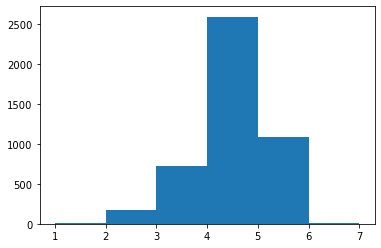

In [83]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [84]:
for i in range(N):
    I_precalc[i] = min(5, I_precalc[i])

In [85]:
iters = simulate_precalc(T, W, 743)

Result 0: 5    acc: 5.0    ks: [8, 5, 5, 5, 4]
Result 1: 5    acc: 5.0    ks: [8, 5, 5, 5, 4]
Result 2: 4    acc: 4.666666666666667    ks: [8, 5, 5, 5]
Result 3: 4    acc: 4.5    ks: [8, 5, 5, 5]
Result 4: 5    acc: 4.6    ks: [8, 5, 5, 5, 5]
Result 5: 5    acc: 4.666666666666667    ks: [8, 5, 5, 4, 4]
Result 6: 5    acc: 4.714285714285714    ks: [8, 5, 5, 4, 4]
Result 7: 5    acc: 4.75    ks: [8, 5, 5, 4, 4]
Result 8: 5    acc: 4.777777777777778    ks: [8, 5, 5, 4, 4]
Result 9: 5    acc: 4.8    ks: [8, 5, 5, 4, 4]
Result 10: 5    acc: 4.818181818181818    ks: [8, 5, 5, 4, 4]
Result 11: 5    acc: 4.833333333333333    ks: [8, 5, 5, 5, 5]
Result 12: 5    acc: 4.846153846153846    ks: [8, 5, 5, 5, 4]
Result 13: 5    acc: 4.857142857142857    ks: [8, 5, 5, 5, 4]
Result 14: 1    acc: 4.6    ks: [8]
Result 15: 1    acc: 4.375    ks: [8]
Result 16: 1    acc: 4.176470588235294    ks: [8]
Result 17: 1    acc: 4.0    ks: [8]
Result 18: 1    acc: 3.8421052631578947    ks: [8]
Result 19: 5    acc:

Result 139: 5    acc: 4.635714285714286    ks: [8, 5, 5, 4, 4]
Result 140: 5    acc: 4.638297872340425    ks: [8, 5, 5, 4, 4]
Result 141: 4    acc: 4.633802816901408    ks: [8, 5, 5, 4]
Result 142: 4    acc: 4.629370629370629    ks: [8, 5, 5, 4]
Result 143: 5    acc: 4.631944444444445    ks: [8, 5, 5, 5, 5]
Result 144: 4    acc: 4.627586206896551    ks: [8, 5, 5, 5]
Result 145: 4    acc: 4.623287671232877    ks: [8, 5, 5, 5]
Result 146: 4    acc: 4.619047619047619    ks: [8, 5, 5, 5]
Result 147: 4    acc: 4.614864864864865    ks: [8, 5, 5, 4]
Result 148: 4    acc: 4.610738255033557    ks: [8, 5, 5, 4]
Result 149: 4    acc: 4.6066666666666665    ks: [8, 5, 5, 4]
Result 150: 5    acc: 4.6092715231788075    ks: [8, 5, 5, 4, 4]
Result 151: 5    acc: 4.6118421052631575    ks: [8, 5, 5, 4, 4]
Result 152: 5    acc: 4.61437908496732    ks: [8, 5, 5, 4, 4]
Result 153: 5    acc: 4.616883116883117    ks: [8, 5, 5, 4, 4]
Result 154: 5    acc: 4.619354838709677    ks: [8, 5, 5, 4, 4]
Result 155: 5 

Result 276: 4    acc: 4.422382671480144    ks: [8, 5, 5, 5]
Result 277: 4    acc: 4.420863309352518    ks: [8, 5, 5, 5]
Result 278: 4    acc: 4.419354838709677    ks: [8, 5, 4, 4]
Result 279: 3    acc: 4.414285714285715    ks: [8, 5, 5]
Result 280: 3    acc: 4.409252669039146    ks: [8, 5, 4]
Result 281: 5    acc: 4.411347517730497    ks: [8, 5, 5, 5, 4]
Result 282: 4    acc: 4.409893992932862    ks: [8, 5, 4, 4]
Result 283: 3    acc: 4.404929577464789    ks: [8, 5, 5]
Result 284: 3    acc: 4.4    ks: [8, 5, 4]
Result 285: 3    acc: 4.395104895104895    ks: [8, 5, 5]
Result 286: 4    acc: 4.393728222996516    ks: [8, 5, 4, 4]
Result 287: 4    acc: 4.392361111111111    ks: [8, 5, 4, 4]
Result 288: 3    acc: 4.387543252595155    ks: [8, 5, 5]
Result 289: 3    acc: 4.382758620689655    ks: [8, 5, 5]
Result 290: 4    acc: 4.381443298969073    ks: [8, 5, 4, 4]
Result 291: 3    acc: 4.376712328767123    ks: [8, 5, 5]
Result 292: 4    acc: 4.375426621160409    ks: [8, 5, 4, 4]
Result 293: 3  

Result 416: 4    acc: 4.261390887290168    ks: [8, 5, 5, 5]
Result 417: 4    acc: 4.260765550239235    ks: [8, 5, 5, 4]
Result 418: 4    acc: 4.2601431980906925    ks: [8, 5, 5, 3]
Result 419: 5    acc: 4.261904761904762    ks: [8, 5, 4, 4, 4]
Result 420: 3    acc: 4.258907363420428    ks: [8, 5, 5]
Result 421: 3    acc: 4.2559241706161135    ks: [8, 5, 4]
Result 422: 4    acc: 4.25531914893617    ks: [8, 5, 4, 3]
Result 423: 6    acc: 4.259433962264151    ks: [8, 5, 4, 4, 4, 4]
Result 424: 3    acc: 4.2564705882352944    ks: [8, 5, 5]
Result 425: 5    acc: 4.258215962441315    ks: [8, 5, 5, 5, 4]
Result 426: 5    acc: 4.259953161592506    ks: [8, 5, 4, 4, 4]
Result 427: 3    acc: 4.257009345794392    ks: [8, 5, 5]
Result 428: 3    acc: 4.2540792540792545    ks: [8, 5, 4]
Result 429: 4    acc: 4.253488372093023    ks: [8, 5, 4, 4]
Result 430: 4    acc: 4.252900232018561    ks: [8, 5, 5, 3]
Result 431: 5    acc: 4.25462962962963    ks: [8, 5, 4, 4, 4]
Result 432: 4    acc: 4.25404157043

Result 553: 5    acc: 4.258122743682311    ks: [8, 5, 5, 5, 5]
Result 554: 5    acc: 4.2594594594594595    ks: [8, 5, 5, 5, 5]
Result 555: 5    acc: 4.260791366906475    ks: [8, 5, 5, 5, 5]
Result 556: 5    acc: 4.262118491921005    ks: [8, 5, 5, 5, 5]
Result 557: 5    acc: 4.263440860215054    ks: [8, 5, 5, 5, 5]
Result 558: 5    acc: 4.264758497316637    ks: [8, 5, 5, 5, 5]
Result 559: 5    acc: 4.266071428571428    ks: [8, 5, 5, 5, 5]
Result 560: 5    acc: 4.267379679144385    ks: [8, 5, 5, 5, 5]
Result 561: 5    acc: 4.2686832740213525    ks: [8, 5, 5, 5, 5]
Result 562: 5    acc: 4.269982238010657    ks: [8, 5, 5, 5, 4]
Result 563: 4    acc: 4.2695035460992905    ks: [8, 5, 5, 3]
Result 564: 5    acc: 4.270796460176991    ks: [8, 5, 5, 5, 4]
Result 565: 5    acc: 4.27208480565371    ks: [8, 5, 5, 5, 4]
Result 566: 5    acc: 4.27336860670194    ks: [8, 5, 5, 5, 4]
Result 567: 5    acc: 4.274647887323944    ks: [8, 5, 5, 5, 4]
Result 568: 5    acc: 4.275922671353252    ks: [8, 5, 5, 

Result 689: 4    acc: 4.256521739130434    ks: [8, 5, 5, 4]
Result 690: 4    acc: 4.256150506512301    ks: [8, 5, 5, 4]
Result 691: 4    acc: 4.255780346820809    ks: [8, 5, 5, 4]
Result 692: 4    acc: 4.255411255411255    ks: [8, 5, 5, 4]
Result 693: 4    acc: 4.255043227665706    ks: [8, 5, 5, 4]
Result 694: 4    acc: 4.254676258992806    ks: [8, 5, 5, 4]
Result 695: 4    acc: 4.254310344827586    ks: [8, 5, 5, 4]
Result 696: 4    acc: 4.253945480631277    ks: [8, 5, 5, 4]
Result 697: 4    acc: 4.2535816618911175    ks: [8, 5, 5, 4]
Result 698: 5    acc: 4.254649499284692    ks: [8, 5, 5, 4, 4]
Result 699: 4    acc: 4.2542857142857144    ks: [8, 5, 5, 4]
Result 700: 4    acc: 4.253922967189729    ks: [8, 5, 5, 4]
Result 701: 4    acc: 4.253561253561253    ks: [8, 5, 5, 4]
Result 702: 4    acc: 4.253200568990042    ks: [8, 5, 5, 4]
Result 703: 4    acc: 4.252840909090909    ks: [8, 5, 5, 4]
Result 704: 4    acc: 4.252482269503546    ks: [8, 5, 5, 4]
Result 705: 4    acc: 4.25212464589

Result 825: 5    acc: 4.24455205811138    ks: [8, 5, 5, 5, 5]
Result 826: 5    acc: 4.24546553808948    ks: [8, 5, 5, 4, 4]
Result 827: 5    acc: 4.246376811594203    ks: [8, 5, 5, 5, 5]
Result 828: 5    acc: 4.247285886610374    ks: [8, 5, 4, 4, 4]
Result 829: 3    acc: 4.2457831325301205    ks: [8, 5, 5]
Result 830: 4    acc: 4.245487364620939    ks: [8, 5, 5, 5]
Result 831: 4    acc: 4.2451923076923075    ks: [8, 5, 5, 5]
Result 832: 4    acc: 4.244897959183674    ks: [8, 5, 5, 3]
Result 833: 4    acc: 4.244604316546763    ks: [8, 5, 5, 3]
Result 834: 4    acc: 4.244311377245509    ks: [8, 5, 5, 4]
Result 835: 4    acc: 4.244019138755981    ks: [8, 5, 5, 4]
Result 836: 4    acc: 4.243727598566308    ks: [8, 5, 5, 4]
Result 837: 4    acc: 4.243436754176611    ks: [8, 5, 5, 4]
Result 838: 4    acc: 4.2431466030989275    ks: [8, 5, 5, 4]
Result 839: 4    acc: 4.242857142857143    ks: [8, 5, 5, 4]
Result 840: 4    acc: 4.242568370986921    ks: [8, 5, 5, 4]
Result 841: 4    acc: 4.242280

Result 961: 4    acc: 4.226611226611227    ks: [8, 5, 4, 3]
Result 962: 4    acc: 4.226375908618899    ks: [8, 5, 5, 3]
Result 963: 4    acc: 4.226141078838174    ks: [8, 5, 4, 3]
Result 964: 3    acc: 4.224870466321244    ks: [8, 5, 2]
Result 965: 3    acc: 4.22360248447205    ks: [8, 5, 2]
Result 966: 3    acc: 4.222337125129266    ks: [8, 5, 2]
Result 967: 3    acc: 4.221074380165289    ks: [8, 5, 2]
Result 968: 3    acc: 4.219814241486068    ks: [8, 5, 2]
Result 969: 4    acc: 4.2195876288659795    ks: [8, 5, 4, 4]
Result 970: 3    acc: 4.218331616889804    ks: [8, 5, 3]
Result 971: 3    acc: 4.217078189300412    ks: [8, 5, 3]
Result 972: 3    acc: 4.215827338129497    ks: [8, 5, 5]
Result 973: 3    acc: 4.214579055441479    ks: [8, 5, 5]
Result 974: 3    acc: 4.213333333333333    ks: [8, 5, 5]
Result 975: 4    acc: 4.213114754098361    ks: [8, 5, 5, 5]
Result 976: 5    acc: 4.213920163766632    ks: [8, 5, 5, 5, 5]
Result 977: 4    acc: 4.213701431492843    ks: [8, 5, 4, 4]
Result 

Result 1095: 4    acc: 4.227189781021898    ks: [8, 5, 5, 5]
Result 1096: 4    acc: 4.226982680036463    ks: [8, 5, 5, 5]
Result 1097: 4    acc: 4.226775956284153    ks: [8, 5, 5, 5]
Result 1098: 4    acc: 4.226569608735214    ks: [8, 5, 5, 5]
Result 1099: 4    acc: 4.2263636363636365    ks: [8, 5, 5, 5]
Result 1100: 5    acc: 4.227066303360581    ks: [8, 5, 4, 4, 4]
Result 1101: 4    acc: 4.226860254083484    ks: [8, 5, 4, 4]
Result 1102: 5    acc: 4.227561196736174    ks: [8, 5, 5, 5, 5]
Result 1103: 4    acc: 4.2273550724637685    ks: [8, 5, 5, 5]
Result 1104: 4    acc: 4.227149321266968    ks: [8, 5, 5, 5]
Result 1105: 4    acc: 4.226943942133816    ks: [8, 5, 4, 3]
Result 1106: 3    acc: 4.2258355916892505    ks: [8, 5, 5]
Result 1107: 3    acc: 4.224729241877256    ks: [8, 5, 2]
Result 1108: 4    acc: 4.224526600541028    ks: [8, 5, 5, 5]
Result 1109: 4    acc: 4.224324324324324    ks: [8, 5, 5, 5]
Result 1110: 4    acc: 4.224122412241224    ks: [8, 5, 5, 5]
Result 1111: 6    acc

Result 1230: 5    acc: 4.19821283509342    ks: [8, 5, 5, 3, 3]
Result 1231: 5    acc: 4.198863636363637    ks: [8, 5, 5, 3, 3]
Result 1232: 5    acc: 4.199513381995134    ks: [8, 5, 5, 3, 3]
Result 1233: 5    acc: 4.200162074554295    ks: [8, 5, 5, 3, 3]
Result 1234: 5    acc: 4.20080971659919    ks: [8, 5, 5, 3, 3]
Result 1235: 5    acc: 4.201456310679611    ks: [8, 5, 5, 3, 3]
Result 1236: 5    acc: 4.202101859337106    ks: [8, 5, 5, 3, 3]
Result 1237: 5    acc: 4.202746365105008    ks: [8, 5, 5, 3, 3]
Result 1238: 5    acc: 4.203389830508475    ks: [8, 5, 5, 5, 3]
Result 1239: 5    acc: 4.204032258064516    ks: [8, 5, 5, 3, 3]
Result 1240: 5    acc: 4.2046736502820306    ks: [8, 5, 5, 5, 5]
Result 1241: 5    acc: 4.205314009661835    ks: [8, 5, 5, 5, 4]
Result 1242: 5    acc: 4.205953338696702    ks: [8, 5, 5, 5, 4]
Result 1243: 5    acc: 4.206591639871383    ks: [8, 5, 5, 4, 3]
Result 1244: 5    acc: 4.20722891566265    ks: [8, 5, 5, 5, 4]
Result 1245: 5    acc: 4.207865168539326  

Result 1361: 4    acc: 4.2430249632892805    ks: [8, 5, 5, 5]
Result 1362: 4    acc: 4.242846661775495    ks: [8, 5, 4, 3]
Result 1363: 4    acc: 4.242668621700879    ks: [8, 5, 4, 3]
Result 1364: 4    acc: 4.2424908424908425    ks: [8, 5, 4, 3]
Result 1365: 4    acc: 4.242313323572475    ks: [8, 5, 4, 3]
Result 1366: 4    acc: 4.2421360643745425    ks: [8, 5, 4, 3]
Result 1367: 4    acc: 4.241959064327485    ks: [8, 5, 4, 3]
Result 1368: 4    acc: 4.241782322863404    ks: [8, 5, 4, 3]
Result 1369: 4    acc: 4.241605839416058    ks: [8, 5, 4, 3]
Result 1370: 4    acc: 4.241429613420861    ks: [8, 5, 4, 3]
Result 1371: 5    acc: 4.24198250728863    ks: [8, 5, 4, 3, 3]
Result 1372: 5    acc: 4.242534595775673    ks: [8, 5, 4, 3, 3]
Result 1373: 5    acc: 4.243085880640466    ks: [8, 5, 4, 3, 3]
Result 1374: 5    acc: 4.243636363636363    ks: [8, 5, 4, 3, 3]
Result 1375: 5    acc: 4.244186046511628    ks: [8, 5, 4, 3, 3]
Result 1376: 5    acc: 4.24473493100944    ks: [8, 5, 4, 3, 3]
Resul

Result 1495: 3    acc: 4.242647058823529    ks: [8, 5, 3]
Result 1496: 3    acc: 4.241816967267869    ks: [8, 5, 3]
Result 1497: 3    acc: 4.240987983978638    ks: [8, 5, 3]
Result 1498: 3    acc: 4.240160106737825    ks: [8, 5, 3]
Result 1499: 3    acc: 4.239333333333334    ks: [8, 5, 3]
Result 1500: 3    acc: 4.238507661558961    ks: [8, 5, 3]
Result 1501: 3    acc: 4.23768308921438    ks: [8, 5, 3]
Result 1502: 4    acc: 4.2375249500998    ks: [8, 5, 5, 5]
Result 1503: 4    acc: 4.2373670212765955    ks: [8, 5, 5, 5]
Result 1504: 4    acc: 4.2372093023255815    ks: [8, 5, 5, 5]
Result 1505: 4    acc: 4.2370517928286855    ks: [8, 5, 5, 5]
Result 1506: 5    acc: 4.23755806237558    ks: [8, 5, 5, 5, 4]
Result 1507: 5    acc: 4.2380636604774535    ks: [8, 5, 5, 5, 4]
Result 1508: 5    acc: 4.238568588469185    ks: [8, 5, 5, 5, 4]
Result 1509: 3    acc: 4.237748344370861    ks: [8, 5, 4]
Result 1510: 4    acc: 4.237590999338186    ks: [8, 5, 5, 5]
Result 1511: 5    acc: 4.23809523809523

Result 1628: 4    acc: 4.245549416820135    ks: [8, 5, 5, 4]
Result 1629: 4    acc: 4.245398773006135    ks: [8, 5, 5, 4]
Result 1630: 4    acc: 4.245248313917842    ks: [8, 5, 5, 4]
Result 1631: 4    acc: 4.245098039215686    ks: [8, 5, 5, 4]
Result 1632: 4    acc: 4.244947948560931    ks: [8, 5, 5, 4]
Result 1633: 4    acc: 4.244798041615667    ks: [8, 5, 5, 4]
Result 1634: 4    acc: 4.244648318042813    ks: [8, 5, 5, 4]
Result 1635: 4    acc: 4.244498777506112    ks: [8, 5, 5, 4]
Result 1636: 3    acc: 4.243738546120953    ks: [8, 5, 5]
Result 1637: 3    acc: 4.242979242979243    ks: [8, 5, 5]
Result 1638: 3    acc: 4.24222086638194    ks: [8, 5, 5]
Result 1639: 4    acc: 4.242073170731707    ks: [8, 5, 5, 5]
Result 1640: 3    acc: 4.2413162705667276    ks: [8, 5, 5]
Result 1641: 3    acc: 4.240560292326431    ks: [8, 5, 5]
Result 1642: 4    acc: 4.240413877054169    ks: [8, 5, 5, 5]
Result 1643: 4    acc: 4.240267639902676    ks: [8, 5, 5, 5]
Result 1644: 4    acc: 4.24012158054711

Result 1761: 5    acc: 4.265039727582293    ks: [8, 5, 5, 5, 5]
Result 1762: 4    acc: 4.264889393079978    ks: [8, 5, 5, 5]
Result 1763: 4    acc: 4.2647392290249435    ks: [8, 5, 5, 5]
Result 1764: 4    acc: 4.264589235127478    ks: [8, 5, 5, 5]
Result 1765: 4    acc: 4.264439411098528    ks: [8, 5, 5, 5]
Result 1766: 4    acc: 4.2642897566496885    ks: [8, 5, 5, 5]
Result 1767: 4    acc: 4.264140271493213    ks: [8, 5, 5, 5]
Result 1768: 4    acc: 4.263990955342001    ks: [8, 5, 5, 5]
Result 1769: 5    acc: 4.264406779661017    ks: [8, 5, 5, 4, 4]
Result 1770: 5    acc: 4.264822134387352    ks: [8, 5, 5, 4, 4]
Result 1771: 5    acc: 4.265237020316027    ks: [8, 5, 5, 4, 4]
Result 1772: 5    acc: 4.265651438240271    ks: [8, 5, 5, 4, 4]
Result 1773: 5    acc: 4.266065388951522    ks: [8, 5, 5, 4, 4]
Result 1774: 5    acc: 4.2664788732394365    ks: [8, 5, 5, 4, 4]
Result 1775: 4    acc: 4.266328828828829    ks: [8, 5, 5, 4]
Result 1776: 4    acc: 4.266178953292065    ks: [8, 5, 5, 4]


Result 1895: 5    acc: 4.257911392405063    ks: [8, 5, 5, 4, 4]
Result 1896: 4    acc: 4.257775434897206    ks: [8, 5, 4, 4]
Result 1897: 4    acc: 4.257639620653319    ks: [8, 5, 4, 4]
Result 1898: 4    acc: 4.257503949447077    ks: [8, 5, 4, 4]
Result 1899: 4    acc: 4.2573684210526315    ks: [8, 5, 4, 4]
Result 1900: 4    acc: 4.257233035244608    ks: [8, 5, 4, 4]
Result 1901: 4    acc: 4.257097791798107    ks: [8, 5, 4, 4]
Result 1902: 4    acc: 4.256962690488702    ks: [8, 5, 4, 4]
Result 1903: 4    acc: 4.256827731092437    ks: [8, 5, 4, 4]
Result 1904: 4    acc: 4.256692913385827    ks: [8, 5, 4, 4]
Result 1905: 4    acc: 4.256558237145855    ks: [8, 5, 5, 5]
Result 1906: 4    acc: 4.256423702149974    ks: [8, 5, 5, 5]
Result 1907: 4    acc: 4.2562893081761    ks: [8, 5, 5, 5]
Result 1908: 4    acc: 4.256155055002619    ks: [8, 5, 5, 5]
Result 1909: 4    acc: 4.256020942408377    ks: [8, 5, 5, 5]
Result 1910: 4    acc: 4.255886970172685    ks: [8, 5, 5, 5]
Result 1911: 5    acc:

Result 2026: 4    acc: 4.275777010360138    ks: [8, 5, 5, 5]
Result 2027: 4    acc: 4.2756410256410255    ks: [8, 5, 5, 5]
Result 2028: 4    acc: 4.275505174963036    ks: [8, 5, 5, 5]
Result 2029: 4    acc: 4.275369458128079    ks: [8, 5, 5, 5]
Result 2030: 4    acc: 4.275233874938454    ks: [8, 5, 5, 5]
Result 2031: 5    acc: 4.275590551181103    ks: [8, 5, 5, 5, 5]
Result 2032: 5    acc: 4.275946876537137    ks: [8, 5, 5, 5, 5]
Result 2033: 4    acc: 4.275811209439528    ks: [8, 5, 5, 3]
Result 2034: 4    acc: 4.275675675675676    ks: [8, 5, 5, 3]
Result 2035: 4    acc: 4.275540275049116    ks: [8, 5, 5, 3]
Result 2036: 4    acc: 4.27540500736377    ks: [8, 5, 5, 3]
Result 2037: 4    acc: 4.275269872423945    ks: [8, 5, 5, 3]
Result 2038: 4    acc: 4.27513487003433    ks: [8, 5, 5, 3]
Result 2039: 4    acc: 4.275    ks: [8, 5, 5, 3]
Result 2040: 5    acc: 4.275355218030377    ks: [8, 5, 5, 5, 5]
Result 2041: 5    acc: 4.275710088148873    ks: [8, 5, 5, 5, 5]
Result 2042: 4    acc: 4.

Result 2159: 5    acc: 4.274074074074074    ks: [8, 5, 5, 4, 3]
Result 2160: 3    acc: 4.2734844979176305    ks: [8, 5, 5]
Result 2161: 3    acc: 4.272895467160037    ks: [8, 5, 5]
Result 2162: 3    acc: 4.272306981044845    ks: [8, 5, 5]
Result 2163: 3    acc: 4.271719038817006    ks: [8, 5, 5]
Result 2164: 3    acc: 4.271131639722864    ks: [8, 5, 5]
Result 2165: 3    acc: 4.270544783010157    ks: [8, 5, 5]
Result 2166: 3    acc: 4.269958467928011    ks: [8, 5, 5]
Result 2167: 5    acc: 4.270295202952029    ks: [8, 5, 5, 5, 5]
Result 2168: 6    acc: 4.271092669432918    ks: [8, 5, 5, 5, 5, 5]
Result 2169: 6    acc: 4.271889400921659    ks: [8, 5, 5, 5, 5, 5]
Result 2170: 4    acc: 4.271764163979733    ks: [8, 5, 5, 3]
Result 2171: 5    acc: 4.2720994475138125    ks: [8, 5, 5, 5, 5]
Result 2172: 5    acc: 4.272434422457432    ks: [8, 5, 5, 5, 5]
Result 2173: 5    acc: 4.272769089236431    ks: [8, 5, 5, 5, 5]
Result 2174: 5    acc: 4.273103448275862    ks: [8, 5, 5, 5, 5]
Result 2175: 

Result 2299: 5    acc: 4.220434782608696    ks: [8, 5, 5, 4, 4]
Result 2300: 5    acc: 4.22077357670578    ks: [8, 5, 5, 4, 4]
Result 2301: 5    acc: 4.221112076455256    ks: [8, 5, 5, 4, 3]
Result 2302: 5    acc: 4.221450282240556    ks: [8, 5, 5, 4, 3]
Result 2303: 5    acc: 4.221788194444445    ks: [8, 5, 5, 3, 3]
Result 2304: 5    acc: 4.222125813449024    ks: [8, 5, 5, 3, 3]
Result 2305: 5    acc: 4.222463139635733    ks: [8, 5, 5, 3, 3]
Result 2306: 5    acc: 4.222800173385349    ks: [8, 5, 5, 3, 3]
Result 2307: 5    acc: 4.22313691507799    ks: [8, 5, 5, 3, 3]
Result 2308: 5    acc: 4.223473365093114    ks: [8, 5, 5, 3, 3]
Result 2309: 5    acc: 4.223809523809524    ks: [8, 5, 5, 3, 3]
Result 2310: 5    acc: 4.224145391605366    ks: [8, 5, 5, 3, 3]
Result 2311: 5    acc: 4.224480968858131    ks: [8, 5, 5, 3, 3]
Result 2312: 5    acc: 4.224816255944661    ks: [8, 5, 5, 5, 4]
Result 2313: 5    acc: 4.225151253241141    ks: [8, 5, 5, 4, 4]
Result 2314: 5    acc: 4.22548596112311   

Result 2434: 4    acc: 4.208213552361396    ks: [8, 5, 5, 5]
Result 2435: 4    acc: 4.208128078817734    ks: [8, 5, 5, 5]
Result 2436: 4    acc: 4.208042675420599    ks: [8, 5, 5, 5]
Result 2437: 4    acc: 4.207957342083676    ks: [8, 5, 5, 5]
Result 2438: 4    acc: 4.207872078720787    ks: [8, 5, 5, 5]
Result 2439: 4    acc: 4.207786885245902    ks: [8, 5, 5, 5]
Result 2440: 4    acc: 4.207701761573126    ks: [8, 5, 5, 5]
Result 2441: 4    acc: 4.207616707616707    ks: [8, 5, 5, 5]
Result 2442: 4    acc: 4.207531723291035    ks: [8, 5, 5, 3]
Result 2443: 4    acc: 4.207446808510638    ks: [8, 5, 5, 5]
Result 2444: 4    acc: 4.207361963190184    ks: [8, 5, 5, 5]
Result 2445: 6    acc: 4.208094848732625    ks: [8, 5, 5, 5, 5, 5]
Result 2446: 4    acc: 4.208009807928075    ks: [8, 5, 5, 5]
Result 2447: 3    acc: 4.207516339869281    ks: [8, 5, 5]
Result 2448: 3    acc: 4.207023274806043    ks: [8, 5, 5]
Result 2449: 4    acc: 4.206938775510204    ks: [8, 5, 5, 5]
Result 2450: 3    acc: 4

Result 2573: 3    acc: 4.16977466977467    ks: [8, 5, 2]
Result 2574: 3    acc: 4.169320388349514    ks: [8, 5, 2]
Result 2575: 3    acc: 4.1688664596273295    ks: [8, 5, 2]
Result 2576: 3    acc: 4.168412883197517    ks: [8, 5, 2]
Result 2577: 3    acc: 4.167959658650116    ks: [8, 5, 2]
Result 2578: 3    acc: 4.167506785575805    ks: [8, 5, 2]
Result 2579: 3    acc: 4.167054263565891    ks: [8, 5, 2]
Result 2580: 3    acc: 4.166602092212321    ks: [8, 5, 2]
Result 2581: 3    acc: 4.166150271107669    ks: [8, 5, 2]
Result 2582: 3    acc: 4.165698799845141    ks: [8, 5, 2]
Result 2583: 3    acc: 4.165247678018575    ks: [8, 5, 2]
Result 2584: 3    acc: 4.164796905222437    ks: [8, 5, 2]
Result 2585: 3    acc: 4.164346481051817    ks: [8, 5, 2]
Result 2586: 6    acc: 4.16505604947816    ks: [8, 5, 5, 4, 4, 4]
Result 2587: 5    acc: 4.165378670788254    ks: [8, 5, 5, 5, 5]
Result 2588: 4    acc: 4.165314793356508    ks: [8, 5, 4, 3]
Result 2589: 4    acc: 4.165250965250965    ks: [8, 5, 

Result 2709: 5    acc: 4.162730627306273    ks: [8, 5, 5, 5, 4]
Result 2710: 4    acc: 4.16267060125415    ks: [8, 5, 3, 3]
Result 2711: 4    acc: 4.162610619469026    ks: [8, 5, 5, 5]
Result 2712: 4    acc: 4.162550681901954    ks: [8, 5, 3, 3]
Result 2713: 4    acc: 4.162490788504053    ks: [8, 5, 3, 3]
Result 2714: 5    acc: 4.16279926335175    ks: [8, 5, 4, 4, 4]
Result 2715: 5    acc: 4.163107511045656    ks: [8, 5, 4, 4, 4]
Result 2716: 5    acc: 4.163415531836584    ks: [8, 5, 4, 4, 4]
Result 2717: 5    acc: 4.163723325974981    ks: [8, 5, 4, 4, 4]
Result 2718: 4    acc: 4.163663111438028    ks: [8, 5, 3, 3]
Result 2719: 4    acc: 4.163602941176471    ks: [8, 5, 3, 3]
Result 2720: 4    acc: 4.163542815141492    ks: [8, 5, 5, 3]
Result 2721: 4    acc: 4.16348273328435    ks: [8, 5, 5, 3]
Result 2722: 4    acc: 4.163422695556371    ks: [8, 5, 3, 3]
Result 2723: 5    acc: 4.163729809104258    ks: [8, 5, 5, 5, 5]
Result 2724: 4    acc: 4.163669724770642    ks: [8, 5, 3, 3]
Result 27

Result 2843: 4    acc: 4.172644163150492    ks: [8, 5, 4, 3]
Result 2844: 4    acc: 4.172583479789104    ks: [8, 5, 4, 3]
Result 2845: 4    acc: 4.172522839072382    ks: [8, 5, 4, 3]
Result 2846: 4    acc: 4.172462240955392    ks: [8, 5, 4, 3]
Result 2847: 4    acc: 4.172401685393258    ks: [8, 5, 4, 3]
Result 2848: 4    acc: 4.172341172341173    ks: [8, 5, 4, 3]
Result 2849: 4    acc: 4.172280701754386    ks: [8, 5, 5, 3]
Result 2850: 4    acc: 4.172220273588215    ks: [8, 5, 5, 3]
Result 2851: 4    acc: 4.172159887798037    ks: [8, 5, 5, 3]
Result 2852: 4    acc: 4.172099544339292    ks: [8, 5, 5, 3]
Result 2853: 4    acc: 4.172039243167484    ks: [8, 5, 5, 3]
Result 2854: 4    acc: 4.171978984238178    ks: [8, 5, 5, 3]
Result 2855: 4    acc: 4.171918767507003    ks: [8, 5, 5, 3]
Result 2856: 4    acc: 4.171858592929646    ks: [8, 5, 5, 3]
Result 2857: 4    acc: 4.171798460461861    ks: [8, 5, 5, 3]
Result 2858: 4    acc: 4.171738370059462    ks: [8, 5, 5, 3]
Result 2859: 4    acc: 4

Result 2979: 5    acc: 4.16241610738255    ks: [8, 5, 4, 4, 4]
Result 2980: 5    acc: 4.16269708151627    ks: [8, 5, 4, 4, 4]
Result 2981: 5    acc: 4.162977867203219    ks: [8, 5, 4, 4, 4]
Result 2982: 5    acc: 4.16325846463292    ks: [8, 5, 4, 4, 4]
Result 2983: 5    acc: 4.163538873994638    ks: [8, 5, 4, 4, 4]
Result 2984: 5    acc: 4.163819095477387    ks: [8, 5, 4, 4, 4]
Result 2985: 5    acc: 4.1640991292699265    ks: [8, 5, 4, 4, 4]
Result 2986: 5    acc: 4.164378975560763    ks: [8, 5, 4, 4, 4]
Result 2987: 5    acc: 4.164658634538153    ks: [8, 5, 4, 4, 4]
Result 2988: 5    acc: 4.164938106390097    ks: [8, 5, 4, 4, 4]
Result 2989: 4    acc: 4.164882943143812    ks: [8, 5, 4, 4]
Result 2990: 4    acc: 4.164827816783684    ks: [8, 5, 4, 4]
Result 2991: 4    acc: 4.1647727272727275    ks: [8, 5, 4, 4]
Result 2992: 4    acc: 4.164717674574006    ks: [8, 5, 4, 4]
Result 2993: 4    acc: 4.164662658650634    ks: [8, 5, 4, 4]
Result 2994: 4    acc: 4.164607679465776    ks: [8, 5, 4

Result 3116: 4    acc: 4.143086300930382    ks: [8, 5, 5, 5]
Result 3117: 4    acc: 4.143040410519564    ks: [8, 5, 5, 5]
Result 3118: 4    acc: 4.142994549535107    ks: [8, 5, 5, 5]
Result 3119: 4    acc: 4.142948717948718    ks: [8, 5, 5, 5]
Result 3120: 4    acc: 4.1429029157321375    ks: [8, 5, 5, 5]
Result 3121: 4    acc: 4.142857142857143    ks: [8, 5, 5, 5]
Result 3122: 4    acc: 4.1428113992955495    ks: [8, 5, 5, 5]
Result 3123: 4    acc: 4.1427656850192065    ks: [8, 5, 5, 5]
Result 3124: 4    acc: 4.14272    ks: [8, 5, 5, 5]
Result 3125: 4    acc: 4.142674344209853    ks: [8, 5, 5, 5]
Result 3126: 5    acc: 4.142948512951711    ks: [8, 5, 5, 4, 4]
Result 3127: 5    acc: 4.143222506393862    ks: [8, 5, 5, 4, 4]
Result 3128: 5    acc: 4.143496324704379    ks: [8, 5, 5, 4, 4]
Result 3129: 5    acc: 4.143769968051118    ks: [8, 5, 5, 4, 4]
Result 3130: 4    acc: 4.143724049824337    ks: [8, 5, 5, 4]
Result 3131: 4    acc: 4.14367816091954    ks: [8, 5, 5, 5]
Result 3132: 4    ac

Result 3250: 3    acc: 4.151953245155337    ks: [8, 5, 3]
Result 3251: 3    acc: 4.1515990159901595    ks: [8, 5, 3]
Result 3252: 3    acc: 4.151245004611128    ks: [8, 5, 3]
Result 3253: 4    acc: 4.15119852489244    ks: [8, 5, 4, 4]
Result 3254: 4    acc: 4.151152073732719    ks: [8, 5, 4, 4]
Result 3255: 4    acc: 4.151105651105651    ks: [8, 5, 4, 3]
Result 3256: 4    acc: 4.151059256984955    ks: [8, 5, 4, 3]
Result 3257: 4    acc: 4.151012891344383    ks: [8, 5, 4, 3]
Result 3258: 4    acc: 4.150966554157717    ks: [8, 5, 4, 4]
Result 3259: 4    acc: 4.150920245398773    ks: [8, 5, 4, 4]
Result 3260: 4    acc: 4.150873965041399    ks: [8, 5, 4, 4]
Result 3261: 4    acc: 4.150827713059472    ks: [8, 5, 4, 4]
Result 3262: 4    acc: 4.150781489426908    ks: [8, 5, 5, 4]
Result 3263: 4    acc: 4.150735294117647    ks: [8, 5, 3, 3]
Result 3264: 4    acc: 4.150689127105666    ks: [8, 5, 3, 3]
Result 3265: 4    acc: 4.1506429883649725    ks: [8, 5, 3, 3]
Result 3266: 4    acc: 4.1505968

Result 3384: 4    acc: 4.148596750369276    ks: [8, 5, 5, 4]
Result 3385: 4    acc: 4.148552864737153    ks: [8, 5, 5, 5]
Result 3386: 4    acc: 4.148509005019191    ks: [8, 5, 5, 5]
Result 3387: 4    acc: 4.148465171192444    ks: [8, 5, 5, 5]
Result 3388: 4    acc: 4.148421363233992    ks: [8, 5, 5, 5]
Result 3389: 4    acc: 4.148377581120944    ks: [8, 5, 5, 5]
Result 3390: 4    acc: 4.148333824830433    ks: [8, 5, 5, 5]
Result 3391: 4    acc: 4.148290094339623    ks: [8, 5, 4, 3]
Result 3392: 4    acc: 4.1482463896257    ks: [8, 5, 5, 4]
Result 3393: 4    acc: 4.148202710665881    ks: [8, 5, 5, 4]
Result 3394: 4    acc: 4.148159057437408    ks: [8, 5, 5, 4]
Result 3395: 4    acc: 4.14811542991755    ks: [8, 5, 5, 4]
Result 3396: 4    acc: 4.148071828083603    ks: [8, 5, 5, 4]
Result 3397: 4    acc: 4.14802825191289    ks: [8, 5, 5, 4]
Result 3398: 4    acc: 4.14798470138276    ks: [8, 5, 4, 3]
Result 3399: 4    acc: 4.147941176470588    ks: [8, 5, 5, 4]
Result 3400: 4    acc: 4.1478

Result 3516: 4    acc: 4.163207278930907    ks: [8, 5, 5, 4]
Result 3517: 4    acc: 4.163160886867538    ks: [8, 5, 5, 4]
Result 3518: 4    acc: 4.163114521170787    ks: [8, 5, 4, 4]
Result 3519: 4    acc: 4.163068181818182    ks: [8, 5, 5, 5]
Result 3520: 4    acc: 4.163021868787276    ks: [8, 5, 5, 5]
Result 3521: 4    acc: 4.16297558205565    ks: [8, 5, 5, 5]
Result 3522: 4    acc: 4.162929321600909    ks: [8, 5, 5, 5]
Result 3523: 4    acc: 4.162883087400681    ks: [8, 5, 5, 4]
Result 3524: 4    acc: 4.162836879432624    ks: [8, 5, 5, 4]
Result 3525: 4    acc: 4.162790697674419    ks: [8, 5, 5, 4]
Result 3526: 4    acc: 4.162744542103771    ks: [8, 5, 5, 4]
Result 3527: 4    acc: 4.162698412698413    ks: [8, 5, 5, 5]
Result 3528: 4    acc: 4.162652309436101    ks: [8, 5, 5, 5]
Result 3529: 4    acc: 4.162606232294618    ks: [8, 5, 5, 5]
Result 3530: 4    acc: 4.16256018125177    ks: [8, 5, 5, 5]
Result 3531: 4    acc: 4.162514156285391    ks: [8, 5, 5, 5]
Result 3532: 4    acc: 4.1

Result 3649: 5    acc: 4.167123287671233    ks: [8, 5, 4, 4, 4]
Result 3650: 5    acc: 4.167351410572446    ks: [8, 5, 4, 4, 4]
Result 3651: 5    acc: 4.167579408543264    ks: [8, 5, 4, 4, 4]
Result 3652: 4    acc: 4.167533534081577    ks: [8, 5, 4, 4]
Result 3653: 4    acc: 4.167487684729064    ks: [8, 5, 4, 4]
Result 3654: 4    acc: 4.167441860465116    ks: [8, 5, 4, 4]
Result 3655: 4    acc: 4.167396061269146    ks: [8, 5, 4, 4]
Result 3656: 4    acc: 4.16735028712059    ks: [8, 5, 5, 5]
Result 3657: 5    acc: 4.167577911427009    ks: [8, 5, 5, 5, 5]
Result 3658: 4    acc: 4.167532112599071    ks: [8, 5, 5, 5]
Result 3659: 4    acc: 4.167486338797814    ks: [8, 5, 5, 5]
Result 3660: 4    acc: 4.167440590002731    ks: [8, 5, 5, 5]
Result 3661: 4    acc: 4.167394866193337    ks: [8, 5, 5, 5]
Result 3662: 4    acc: 4.167349167349167    ks: [8, 5, 5, 5]
Result 3663: 4    acc: 4.167303493449782    ks: [8, 5, 5, 5]
Result 3664: 6    acc: 4.167803547066849    ks: [8, 5, 5, 5, 5, 5]
Result 

Result 3784: 5    acc: 4.1667107001321    ks: [8, 5, 4, 4, 3]
Result 3785: 5    acc: 4.166930797675647    ks: [8, 5, 4, 4, 3]
Result 3786: 5    acc: 4.167150778980724    ks: [8, 5, 4, 4, 3]
Result 3787: 5    acc: 4.167370644139387    ks: [8, 5, 4, 4, 3]
Result 3788: 4    acc: 4.167326471364476    ks: [8, 5, 5, 5]
Result 3789: 4    acc: 4.167282321899736    ks: [8, 5, 5, 5]
Result 3790: 4    acc: 4.167238195726721    ks: [8, 5, 5, 5]
Result 3791: 4    acc: 4.167194092827004    ks: [8, 5, 5, 5]
Result 3792: 4    acc: 4.1671500131821775    ks: [8, 5, 5, 5]
Result 3793: 5    acc: 4.167369530838165    ks: [8, 5, 5, 4, 4]
Result 3794: 4    acc: 4.167325428194993    ks: [8, 5, 5, 5]
Result 3795: 4    acc: 4.167281348788198    ks: [8, 5, 4, 4]
Result 3796: 4    acc: 4.16723729259942    ks: [8, 5, 4, 4]
Result 3797: 4    acc: 4.167193259610321    ks: [8, 5, 5, 5]
Result 3798: 4    acc: 4.16714924980258    ks: [8, 5, 5, 5]
Result 3799: 4    acc: 4.167105263157895    ks: [8, 5, 5, 3]
Result 3800:

Result 3918: 4    acc: 4.1633069660627715    ks: [8, 5, 5, 5]
Result 3919: 4    acc: 4.163265306122449    ks: [8, 5, 5, 5]
Result 3920: 4    acc: 4.163223667431778    ks: [8, 5, 5, 5]
Result 3921: 4    acc: 4.163182049974503    ks: [8, 5, 4, 4]
Result 3922: 4    acc: 4.163140453734387    ks: [8, 5, 5, 5]
Result 3923: 5    acc: 4.16335372069317    ks: [8, 5, 5, 5, 3]
Result 3924: 4    acc: 4.163312101910828    ks: [8, 5, 4, 4]
Result 3925: 4    acc: 4.163270504330107    ks: [8, 5, 4, 4]
Result 3926: 4    acc: 4.16322892793481    ks: [8, 5, 4, 4]
Result 3927: 4    acc: 4.163187372708758    ks: [8, 5, 4, 4]
Result 3928: 4    acc: 4.163145838635785    ks: [8, 5, 4, 4]
Result 3929: 4    acc: 4.163104325699746    ks: [8, 5, 5, 5]
Result 3930: 5    acc: 4.163317222080895    ks: [8, 5, 5, 5, 3]
Result 3931: 4    acc: 4.163275686673448    ks: [8, 5, 4, 4]
Result 3932: 4    acc: 4.16323417238749    ks: [8, 5, 4, 4]
Result 3933: 4    acc: 4.163192679206914    ks: [8, 5, 4, 4]
Result 3934: 4    ac

Result 4052: 5    acc: 4.167530224525043    ks: [8, 5, 5, 5, 5]
Result 4053: 5    acc: 4.167735569807597    ks: [8, 5, 5, 5, 5]
Result 4054: 5    acc: 4.167940813810111    ks: [8, 5, 5, 5, 5]
Result 4055: 6    acc: 4.168392504930966    ks: [8, 5, 5, 5, 5, 5]
Result 4056: 4    acc: 4.168350998274587    ks: [8, 5, 5, 5]
Result 4057: 4    acc: 4.168309512074914    ks: [8, 5, 5, 5]
Result 4058: 4    acc: 4.168268046316827    ks: [8, 5, 5, 5]
Result 4059: 4    acc: 4.168226600985221    ks: [8, 5, 5, 4]
Result 4060: 4    acc: 4.168185176065009    ks: [8, 5, 5, 5]
Result 4061: 4    acc: 4.1681437715411125    ks: [8, 5, 5, 5]
Result 4062: 4    acc: 4.168102387398474    ks: [8, 5, 5, 5]
Result 4063: 4    acc: 4.168061023622047    ks: [8, 5, 5, 5]
Result 4064: 4    acc: 4.168019680196802    ks: [8, 5, 5, 5]
Result 4065: 4    acc: 4.167978357107723    ks: [8, 5, 5, 5]
Result 4066: 4    acc: 4.167937054339808    ks: [8, 5, 5, 5]
Result 4067: 4    acc: 4.167895771878073    ks: [8, 5, 5, 5]
Result 4

Result 4184: 4    acc: 4.173715651135006    ks: [8, 5, 4, 4]
Result 4185: 4    acc: 4.173674151935021    ks: [8, 5, 4, 4]
Result 4186: 4    acc: 4.173632672557917    ks: [8, 5, 4, 4]
Result 4187: 4    acc: 4.173591212989494    ks: [8, 5, 4, 4]
Result 4188: 5    acc: 4.173788493673908    ks: [8, 5, 4, 4, 4]
Result 4189: 3    acc: 4.1735083532219575    ks: [8, 5, 5]
Result 4190: 3    acc: 4.173228346456693    ks: [8, 5, 5]
Result 4191: 5    acc: 4.173425572519084    ks: [8, 5, 4, 4, 4]
Result 4192: 5    acc: 4.173622704507513    ks: [8, 5, 4, 4, 4]
Result 4193: 5    acc: 4.17381974248927    ks: [8, 5, 4, 4, 4]
Result 4194: 5    acc: 4.174016686531585    ks: [8, 5, 4, 4, 4]
Result 4195: 4    acc: 4.173975214489991    ks: [8, 5, 4, 4]
Result 4196: 4    acc: 4.173933762211103    ks: [8, 5, 4, 4]
Result 4197: 4    acc: 4.1738923296808    ks: [8, 5, 4, 4]
Result 4198: 4    acc: 4.173850916884972    ks: [8, 5, 4, 4]
Result 4199: 4    acc: 4.173809523809524    ks: [8, 5, 4, 4]
Result 4200: 4   

Result 4316: 4    acc: 4.182765809589993    ks: [8, 5, 5, 4]
Result 4317: 4    acc: 4.182723483094025    ks: [8, 5, 5, 4]
Result 4318: 4    acc: 4.182681176198194    ks: [8, 5, 5, 4]
Result 4319: 4    acc: 4.182638888888889    ks: [8, 5, 5, 4]
Result 4320: 4    acc: 4.182596621152511    ks: [8, 5, 5, 4]
Result 4321: 4    acc: 4.182554372975474    ks: [8, 5, 5, 4]
Result 4322: 4    acc: 4.182512144344205    ks: [8, 5, 5, 4]
Result 4323: 4    acc: 4.182469935245144    ks: [8, 5, 5, 4]
Result 4324: 4    acc: 4.18242774566474    ks: [8, 5, 5, 4]
Result 4325: 4    acc: 4.182385575589459    ks: [8, 5, 5, 4]
Result 4326: 5    acc: 4.18257453200832    ks: [8, 5, 5, 4, 4]
Result 4327: 5    acc: 4.1827634011090575    ks: [8, 5, 5, 4, 4]
Result 4328: 4    acc: 4.182721182721183    ks: [8, 5, 5, 4]
Result 4329: 5    acc: 4.182909930715935    ks: [8, 5, 5, 4, 4]
Result 4330: 5    acc: 4.183098591549296    ks: [8, 5, 5, 4, 4]
Result 4331: 4    acc: 4.183056325023084    ks: [8, 5, 5, 5]
Result 4332: 

Result 4451: 5    acc: 4.17722371967655    ks: [8, 5, 5, 5, 5]
Result 4452: 5    acc: 4.177408488659331    ks: [8, 5, 5, 5, 5]
Result 4453: 6    acc: 4.177817691962281    ks: [8, 5, 5, 3, 3, 3]
Result 4454: 6    acc: 4.178226711560045    ks: [8, 5, 5, 5, 5, 5]
Result 4455: 6    acc: 4.1786355475763015    ks: [8, 5, 5, 5, 5, 5]
Result 4456: 6    acc: 4.179044200134619    ks: [8, 5, 5, 5, 5, 5]
Result 4457: 6    acc: 4.179452669358457    ks: [8, 5, 5, 5, 5, 5]
Result 4458: 6    acc: 4.17986095537116    ks: [8, 5, 5, 5, 5, 5]
Result 4459: 6    acc: 4.1802690582959645    ks: [8, 5, 5, 5, 5, 5]
Result 4460: 5    acc: 4.180452813270567    ks: [8, 5, 5, 5, 5]
Result 4461: 6    acc: 4.180860600627521    ks: [8, 5, 5, 5, 5, 5]
Result 4462: 6    acc: 4.18126820524311    ks: [8, 5, 5, 5, 5, 5]
Result 4463: 5    acc: 4.181451612903226    ks: [8, 5, 5, 5, 4]
Result 4464: 5    acc: 4.181634938409855    ks: [8, 5, 5, 5, 5]
Result 4465: 4    acc: 4.181594267801164    ks: [8, 5, 5, 4]
Result 4466: 4   

Result 4584: 5    acc: 4.184732824427481    ks: [8, 5, 5, 5, 4]
4.184732824427481 7


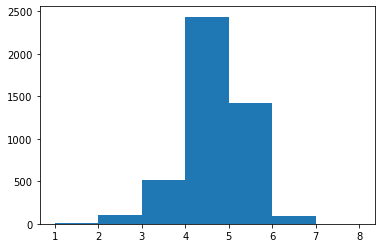

In [86]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [88]:
I_precalc = I

def simulate_precalc_mean(G, W, s_init):
    T = []; N = len(W)

    for r in range(N):
        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0 for u in range(N)]

        R = N; s = s_init; ks = []
        for t in range(100):
            R = N - sum(V)
            
            k = 0
            if t == 0:
                k = 8
            else:
                k_sum = 0
                for u in range(N):
                    if not V[u]:
                        k_sum += I_precalc[u]
                if ks:
                    k = min(int(round(k_sum / (N - sum(V)))), ks[-1])
                else:
                    k = int(round(k_sum / (N - sum(V))))
            
            P = []; ks.append(k)
            if t == 0:
                P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, 8, s)
            elif N - sum(V) > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif N - sum(V) > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            for u in P[::-1]:
                if CV[u]:
                    I = set(get_ideal(G, V, u)[::-1])
                    V = [not (v in I) for v in range(N)]
                    s = u; break
                else:
                    V, _ = visit(G, V, u)

            size, weight = get_size_weight(G, W, V, s)

            if size == 1 or weight <= 200:
                T.append(t + 1)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}    ks: {ks}")
                break
            if t == 99:
                T.append(100)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}")

    print(sum(T) / len(T), max(T))
    
    return T


In [89]:
print(max(I_precalc))
iters = simulate_precalc_mean(T, W, 743)

8
Result 0: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 1: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 2: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 3: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 4: 6    acc: 5.2    ks: [8, 4, 4, 4, 4, 4]
Result 5: 5    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4]
Result 6: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 7: 5    acc: 5.125    ks: [8, 4, 4, 4, 4]
Result 8: 5    acc: 5.111111111111111    ks: [8, 4, 4, 4, 4]
Result 9: 5    acc: 5.1    ks: [8, 4, 4, 4, 4]
Result 10: 5    acc: 5.090909090909091    ks: [8, 4, 4, 4, 4]
Result 11: 6    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 12: 5    acc: 5.153846153846154    ks: [8, 4, 4, 4, 4]
Result 13: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 14: 1    acc: 4.866666666666666    ks: [8]
Result 15: 1    acc: 4.625    ks: [8]
Result 16: 1    acc: 4.411764705882353    ks: [8]
Result 17: 1    acc: 4.222222222222222    ks: [8]
Result 18: 1    acc: 4.052631578947368    

Result 139: 5    acc: 4.914285714285715    ks: [8, 4, 4, 4, 4]
Result 140: 5    acc: 4.914893617021277    ks: [8, 4, 4, 4, 4]
Result 141: 4    acc: 4.908450704225352    ks: [8, 4, 4, 4]
Result 142: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 4]
Result 143: 6    acc: 4.916666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 144: 5    acc: 4.917241379310345    ks: [8, 4, 4, 4, 4]
Result 145: 5    acc: 4.917808219178082    ks: [8, 4, 4, 4, 4]
Result 146: 5    acc: 4.918367346938775    ks: [8, 4, 4, 4, 4]
Result 147: 4    acc: 4.912162162162162    ks: [8, 4, 4, 4]
Result 148: 4    acc: 4.906040268456376    ks: [8, 4, 4, 4]
Result 149: 5    acc: 4.906666666666666    ks: [8, 4, 4, 4, 4]
Result 150: 5    acc: 4.9072847682119205    ks: [8, 4, 4, 4, 4]
Result 151: 5    acc: 4.907894736842105    ks: [8, 4, 4, 4, 4]
Result 152: 5    acc: 4.908496732026144    ks: [8, 4, 4, 4, 4]
Result 153: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 4]
Result 154: 5    acc: 4.909677419354839    ks: [8, 4, 4, 4, 

Result 270: 5    acc: 5.022140221402214    ks: [8, 4, 4, 4, 3]
Result 271: 5    acc: 5.022058823529412    ks: [8, 3, 3, 2, 2]
Result 272: 4    acc: 5.018315018315018    ks: [8, 4, 4, 4]
Result 273: 4    acc: 5.014598540145985    ks: [8, 4, 4, 4]
Result 274: 4    acc: 5.010909090909091    ks: [8, 4, 4, 4]
Result 275: 5    acc: 5.010869565217392    ks: [8, 4, 3, 3, 3]
Result 276: 5    acc: 5.0108303249097474    ks: [8, 4, 3, 3, 3]
Result 277: 5    acc: 5.010791366906475    ks: [8, 4, 3, 3, 3]
Result 278: 5    acc: 5.010752688172043    ks: [8, 3, 3, 3, 3]
Result 279: 3    acc: 5.003571428571429    ks: [8, 3, 3]
Result 280: 5    acc: 5.00355871886121    ks: [8, 3, 3, 2, 2]
Result 281: 6    acc: 5.00709219858156    ks: [8, 4, 3, 3, 3, 3]
Result 282: 6    acc: 5.010600706713781    ks: [8, 3, 3, 3, 3, 3]
Result 283: 3    acc: 5.003521126760563    ks: [8, 3, 3]
Result 284: 5    acc: 5.003508771929824    ks: [8, 3, 3, 2, 2]
Result 285: 3    acc: 4.996503496503497    ks: [8, 3, 3]
Result 286: 6 

Result 404: 6    acc: 4.930864197530864    ks: [8, 3, 3, 3, 3, 3]
Result 405: 3    acc: 4.926108374384237    ks: [8, 3, 3]
Result 406: 6    acc: 4.9287469287469285    ks: [8, 3, 3, 3, 3, 3]
Result 407: 3    acc: 4.924019607843137    ks: [8, 3, 3]
Result 408: 5    acc: 4.924205378973105    ks: [8, 4, 3, 3, 3]
Result 409: 5    acc: 4.924390243902439    ks: [8, 3, 3, 3, 3]
Result 410: 4    acc: 4.922141119221411    ks: [8, 4, 4, 4]
Result 411: 4    acc: 4.919902912621359    ks: [8, 4, 4, 4]
Result 412: 6    acc: 4.9225181598062955    ks: [8, 4, 3, 3, 3, 3]
Result 413: 3    acc: 4.917874396135265    ks: [8, 3, 3]
Result 414: 5    acc: 4.918072289156626    ks: [8, 3, 3, 2, 2]
Result 415: 6    acc: 4.920673076923077    ks: [8, 4, 3, 3, 3, 3]
Result 416: 5    acc: 4.920863309352518    ks: [8, 4, 3, 3, 3]
Result 417: 5    acc: 4.921052631578948    ks: [8, 4, 3, 3, 3]
Result 418: 5    acc: 4.921241050119332    ks: [8, 3, 3, 3, 3]
Result 419: 6    acc: 4.923809523809524    ks: [8, 3, 3, 3, 3, 3]

Result 534: 5    acc: 5.044859813084112    ks: [8, 3, 3, 3, 3]
Result 535: 6    acc: 5.0466417910447765    ks: [8, 3, 3, 3, 3, 3]
Result 536: 6    acc: 5.048417132216015    ks: [8, 3, 3, 3, 3, 3]
Result 537: 4    acc: 5.0464684014869885    ks: [8, 3, 3, 3]
Result 538: 5    acc: 5.046382189239332    ks: [8, 3, 3, 3, 3]
Result 539: 5    acc: 5.046296296296297    ks: [8, 3, 3, 3, 3]
Result 540: 6    acc: 5.048059149722736    ks: [8, 3, 3, 3, 3, 3]
Result 541: 6    acc: 5.049815498154982    ks: [8, 3, 3, 3, 3, 3]
Result 542: 5    acc: 5.0497237569060776    ks: [8, 3, 3, 3, 3]
Result 543: 5    acc: 5.049632352941177    ks: [8, 4, 4, 4, 4]
Result 544: 5    acc: 5.04954128440367    ks: [8, 3, 3, 3, 3]
Result 545: 4    acc: 5.0476190476190474    ks: [8, 4, 4, 4]
Result 546: 4    acc: 5.045703839122487    ks: [8, 4, 4, 4]
Result 547: 4    acc: 5.043795620437956    ks: [8, 4, 4, 4]
Result 548: 5    acc: 5.043715846994536    ks: [8, 4, 4, 4, 4]
Result 549: 5    acc: 5.043636363636364    ks: [8, 3

Result 668: 4    acc: 5.00896860986547    ks: [8, 3, 3, 3]
Result 669: 4    acc: 5.007462686567164    ks: [8, 3, 3, 3]
Result 670: 4    acc: 5.0059612518628915    ks: [8, 3, 3, 3]
Result 671: 4    acc: 5.004464285714286    ks: [8, 4, 4, 4]
Result 672: 4    acc: 5.00297176820208    ks: [8, 3, 3, 3]
Result 673: 4    acc: 5.001483679525222    ks: [8, 3, 3, 3]
Result 674: 4    acc: 5.0    ks: [8, 3, 3, 3]
Result 675: 4    acc: 4.9985207100591715    ks: [8, 3, 3, 3]
Result 676: 4    acc: 4.997045790251108    ks: [8, 4, 4, 4]
Result 677: 4    acc: 4.995575221238938    ks: [8, 3, 3, 3]
Result 678: 4    acc: 4.9941089837997055    ks: [8, 4, 4, 4]
Result 679: 4    acc: 4.992647058823529    ks: [8, 3, 3, 3]
Result 680: 4    acc: 4.991189427312776    ks: [8, 4, 4, 4]
Result 681: 4    acc: 4.989736070381231    ks: [8, 3, 3, 3]
Result 682: 5    acc: 4.989751098096632    ks: [8, 4, 4, 4, 4]
Result 683: 6    acc: 4.991228070175438    ks: [8, 3, 3, 3, 3, 3]
Result 684: 6    acc: 4.992700729927007    k

Result 800: 3    acc: 4.995006242197253    ks: [8, 3, 3]
Result 801: 5    acc: 4.99501246882793    ks: [8, 4, 4, 4, 4]
Result 802: 6    acc: 4.9962640099626405    ks: [8, 3, 3, 3, 3, 3]
Result 803: 5    acc: 4.996268656716418    ks: [8, 4, 3, 3, 3]
Result 804: 5    acc: 4.9962732919254655    ks: [8, 3, 3, 2, 2]
Result 805: 7    acc: 4.9987593052109185    ks: [8, 3, 3, 3, 3, 3, 3]
Result 806: 6    acc: 5.0    ks: [8, 3, 3, 3, 3, 3]
Result 807: 5    acc: 5.0    ks: [8, 3, 3, 3, 3]
Result 808: 6    acc: 5.00123609394314    ks: [8, 3, 3, 3, 3, 3]
Result 809: 5    acc: 5.001234567901235    ks: [8, 3, 3, 3, 3]
Result 810: 3    acc: 4.998766954377312    ks: [8, 3, 2]
Result 811: 4    acc: 4.997536945812808    ks: [8, 4, 3, 3]
Result 812: 4    acc: 4.996309963099631    ks: [8, 4, 3, 3]
Result 813: 4    acc: 4.995085995085995    ks: [8, 4, 3, 3]
Result 814: 6    acc: 4.9963190184049076    ks: [8, 3, 3, 3, 3, 3]
Result 815: 5    acc: 4.9963235294117645    ks: [8, 4, 4, 4, 3]
Result 816: 4    acc

Result 932: 4    acc: 4.995712754555198    ks: [8, 3, 3, 3]
Result 933: 7    acc: 4.997858672376874    ks: [8, 3, 3, 3, 3, 3, 3]
Result 934: 4    acc: 4.996791443850268    ks: [8, 4, 4, 4]
Result 935: 4    acc: 4.995726495726496    ks: [8, 4, 4, 3]
Result 936: 5    acc: 4.995731056563501    ks: [8, 4, 3, 3, 3]
Result 937: 4    acc: 4.994669509594883    ks: [8, 4, 4, 3]
Result 938: 4    acc: 4.993610223642173    ks: [8, 4, 4, 3]
Result 939: 4    acc: 4.992553191489361    ks: [8, 4, 4, 3]
Result 940: 4    acc: 4.991498405951116    ks: [8, 4, 4, 3]
Result 941: 4    acc: 4.990445859872612    ks: [8, 4, 4, 4]
Result 942: 4    acc: 4.989395546129375    ks: [8, 4, 4, 4]
Result 943: 5    acc: 4.989406779661017    ks: [8, 3, 3, 3, 3]
Result 944: 3    acc: 4.987301587301587    ks: [8, 3, 3]
Result 945: 5    acc: 4.987315010570825    ks: [8, 4, 4, 4, 4]
Result 946: 5    acc: 4.9873284054910245    ks: [8, 4, 4, 3, 3]
Result 947: 5    acc: 4.987341772151899    ks: [8, 4, 4, 4, 4]
Result 948: 5    a

Result 1065: 4    acc: 4.970919324577861    ks: [8, 4, 4, 3]
Result 1066: 5    acc: 4.970946579194002    ks: [8, 3, 3, 3, 3]
Result 1067: 5    acc: 4.9709737827715355    ks: [8, 3, 3, 3, 3]
Result 1068: 5    acc: 4.971000935453695    ks: [8, 4, 4, 3, 3]
Result 1069: 5    acc: 4.971028037383178    ks: [8, 4, 3, 3, 3]
Result 1070: 5    acc: 4.971055088702148    ks: [8, 3, 3, 3, 3]
Result 1071: 5    acc: 4.9710820895522385    ks: [8, 4, 4, 3, 3]
Result 1072: 5    acc: 4.971109040074557    ks: [8, 3, 3, 3, 3]
Result 1073: 5    acc: 4.971135940409684    ks: [8, 4, 4, 3, 3]
Result 1074: 5    acc: 4.971162790697674    ks: [8, 3, 3, 3, 3]
Result 1075: 4    acc: 4.970260223048327    ks: [8, 4, 4, 3]
Result 1076: 6    acc: 4.971216341689879    ks: [8, 4, 3, 3, 3, 3]
Result 1077: 4    acc: 4.970315398886828    ks: [8, 4, 4, 4]
Result 1078: 5    acc: 4.970342910101946    ks: [8, 4, 3, 3, 3]
Result 1079: 5    acc: 4.970370370370371    ks: [8, 4, 3, 3, 3]
Result 1080: 5    acc: 4.970397779833488    

Result 1196: 5    acc: 4.932330827067669    ks: [8, 4, 3, 3, 3]
Result 1197: 5    acc: 4.932387312186978    ks: [8, 4, 3, 3, 3]
Result 1198: 5    acc: 4.932443703085905    ks: [8, 4, 3, 3, 3]
Result 1199: 5    acc: 4.9325    ks: [8, 4, 3, 3, 3]
Result 1200: 5    acc: 4.9325562031640295    ks: [8, 4, 3, 3, 3]
Result 1201: 5    acc: 4.93261231281198    ks: [8, 4, 3, 3, 3]
Result 1202: 5    acc: 4.932668329177058    ks: [8, 4, 3, 3, 3]
Result 1203: 6    acc: 4.9335548172757475    ks: [8, 4, 3, 3, 3, 3]
Result 1204: 6    acc: 4.9344398340248965    ks: [8, 4, 3, 3, 3, 3]
Result 1205: 6    acc: 4.935323383084577    ks: [8, 4, 3, 3, 3, 3]
Result 1206: 7    acc: 4.937033968516984    ks: [8, 4, 3, 3, 3, 3, 3]
Result 1207: 7    acc: 4.938741721854305    ks: [8, 4, 3, 3, 3, 3, 3]
Result 1208: 7    acc: 4.94044665012407    ks: [8, 4, 3, 3, 3, 3, 3]
Result 1209: 4    acc: 4.939669421487603    ks: [8, 4, 4, 4]
Result 1210: 5    acc: 4.939719240297275    ks: [8, 4, 4, 4, 4]
Result 1211: 5    acc: 4.9

Result 1325: 5    acc: 4.980392156862745    ks: [8, 3, 3, 3, 3]
Result 1326: 5    acc: 4.980406932931424    ks: [8, 3, 3, 3, 3]
Result 1327: 5    acc: 4.980421686746988    ks: [8, 3, 3, 3, 3]
Result 1328: 6    acc: 4.981188863807374    ks: [8, 3, 3, 3, 3, 3]
Result 1329: 6    acc: 4.981954887218045    ks: [8, 3, 3, 3, 3, 3]
Result 1330: 5    acc: 4.981968444778362    ks: [8, 3, 3, 3, 3]
Result 1331: 5    acc: 4.981981981981982    ks: [8, 3, 3, 3, 3]
Result 1332: 5    acc: 4.981995498874719    ks: [8, 3, 3, 3, 3]
Result 1333: 5    acc: 4.982008995502249    ks: [8, 3, 3, 3, 3]
Result 1334: 5    acc: 4.9820224719101125    ks: [8, 3, 3, 3, 3]
Result 1335: 5    acc: 4.982035928143713    ks: [8, 3, 3, 3, 3]
Result 1336: 5    acc: 4.982049364248317    ks: [8, 3, 3, 3, 3]
Result 1337: 5    acc: 4.982062780269058    ks: [8, 3, 3, 3, 3]
Result 1338: 5    acc: 4.982076176250933    ks: [8, 3, 3, 3, 3]
Result 1339: 5    acc: 4.982089552238806    ks: [8, 3, 3, 3, 3]
Result 1340: 5    acc: 4.98210290

Result 1454: 4    acc: 4.984879725085911    ks: [8, 4, 4, 4]
Result 1455: 4    acc: 4.9842032967032965    ks: [8, 4, 4, 4]
Result 1456: 4    acc: 4.983527796842828    ks: [8, 4, 4, 4]
Result 1457: 4    acc: 4.982853223593964    ks: [8, 4, 4, 4]
Result 1458: 4    acc: 4.982179575051405    ks: [8, 4, 4, 4]
Result 1459: 4    acc: 4.9815068493150685    ks: [8, 4, 4, 4]
Result 1460: 4    acc: 4.9808350444900755    ks: [8, 4, 4, 4]
Result 1461: 4    acc: 4.980164158686731    ks: [8, 4, 4, 4]
Result 1462: 4    acc: 4.979494190020506    ks: [8, 4, 4, 4]
Result 1463: 4    acc: 4.978825136612022    ks: [8, 4, 4, 4]
Result 1464: 4    acc: 4.978156996587031    ks: [8, 4, 4, 4]
Result 1465: 4    acc: 4.977489768076398    ks: [8, 4, 4, 4]
Result 1466: 4    acc: 4.976823449216087    ks: [8, 4, 4, 4]
Result 1467: 4    acc: 4.976158038147139    ks: [8, 4, 4, 4]
Result 1468: 4    acc: 4.975493533015657    ks: [8, 4, 4, 4]
Result 1469: 4    acc: 4.974829931972789    ks: [8, 4, 4, 4]
Result 1470: 4    acc

Result 1582: 5    acc: 4.993051168667088    ks: [8, 4, 4, 4, 3]
Result 1583: 5    acc: 4.993055555555555    ks: [8, 4, 4, 4, 3]
Result 1584: 5    acc: 4.993059936908518    ks: [8, 4, 4, 4, 3]
Result 1585: 5    acc: 4.993064312736444    ks: [8, 4, 4, 4, 3]
Result 1586: 5    acc: 4.9930686830497795    ks: [8, 4, 4, 4, 3]
Result 1587: 5    acc: 4.9930730478589425    ks: [8, 3, 3, 3, 3]
Result 1588: 5    acc: 4.993077407174323    ks: [8, 3, 3, 3, 3]
Result 1589: 5    acc: 4.993081761006289    ks: [8, 3, 3, 3, 3]
Result 1590: 5    acc: 4.993086109365179    ks: [8, 3, 3, 3, 3]
Result 1591: 5    acc: 4.993090452261306    ks: [8, 3, 3, 3, 3]
Result 1592: 5    acc: 4.993094789704959    ks: [8, 3, 3, 3, 3]
Result 1593: 5    acc: 4.993099121706399    ks: [8, 3, 3, 3, 3]
Result 1594: 5    acc: 4.993103448275862    ks: [8, 3, 3, 3, 3]
Result 1595: 5    acc: 4.993107769423559    ks: [8, 3, 3, 3, 3]
Result 1596: 5    acc: 4.993112085159674    ks: [8, 3, 3, 3, 3]
Result 1597: 5    acc: 4.9931163954943

Result 1710: 5    acc: 5.014026884862654    ks: [8, 4, 4, 4, 4]
Result 1711: 7    acc: 5.015186915887851    ks: [8, 4, 4, 4, 4, 4, 4]
Result 1712: 7    acc: 5.016345592527729    ks: [8, 4, 4, 4, 4, 4, 4]
Result 1713: 5    acc: 5.016336056009335    ks: [8, 4, 3, 3, 3]
Result 1714: 6    acc: 5.016909620991254    ks: [8, 3, 3, 3, 3, 3]
Result 1715: 6    acc: 5.0174825174825175    ks: [8, 3, 3, 3, 3, 3]
Result 1716: 6    acc: 5.018054746651136    ks: [8, 3, 3, 3, 3, 3]
Result 1717: 6    acc: 5.018626309662398    ks: [8, 3, 3, 3, 3, 3]
Result 1718: 6    acc: 5.019197207678883    ks: [8, 3, 3, 3, 3, 3]
Result 1719: 6    acc: 5.019767441860465    ks: [8, 3, 3, 3, 3, 3]
Result 1720: 6    acc: 5.0203370133643235    ks: [8, 3, 3, 3, 3, 3]
Result 1721: 6    acc: 5.020905923344948    ks: [8, 3, 3, 3, 3, 3]
Result 1722: 6    acc: 5.02147417295415    ks: [8, 3, 3, 3, 3, 3]
Result 1723: 6    acc: 5.022041763341067    ks: [8, 3, 3, 3, 3, 3]
Result 1724: 6    acc: 5.022608695652174    ks: [8, 3, 3, 3, 

Result 1840: 5    acc: 5.020097772949484    ks: [8, 3, 3, 3, 3]
Result 1841: 5    acc: 5.020086862106406    ks: [8, 4, 4, 4, 4]
Result 1842: 5    acc: 5.020075963103635    ks: [8, 4, 4, 4, 4]
Result 1843: 6    acc: 5.020607375271149    ks: [8, 4, 4, 4, 4, 4]
Result 1844: 5    acc: 5.020596205962059    ks: [8, 4, 4, 4, 4]
Result 1845: 5    acc: 5.020585048754063    ks: [8, 4, 3, 3, 3]
Result 1846: 5    acc: 5.020573903627504    ks: [8, 3, 3, 3, 3]
Result 1847: 4    acc: 5.020021645021645    ks: [8, 4, 3, 3]
Result 1848: 5    acc: 5.020010816657653    ks: [8, 3, 3, 3, 3]
Result 1849: 4    acc: 5.019459459459459    ks: [8, 4, 3, 3]
Result 1850: 4    acc: 5.018908698001081    ks: [8, 4, 3, 3]
Result 1851: 5    acc: 5.01889848812095    ks: [8, 3, 3, 3, 3]
Result 1852: 5    acc: 5.0188882892606586    ks: [8, 4, 4, 4, 3]
Result 1853: 5    acc: 5.018878101402374    ks: [8, 4, 3, 3, 3]
Result 1854: 6    acc: 5.019407008086254    ks: [8, 4, 4, 4, 4, 4]
Result 1855: 6    acc: 5.019935344827586   

Result 1969: 5    acc: 5.013197969543147    ks: [8, 4, 3, 3, 3]
Result 1970: 5    acc: 5.013191273465246    ks: [8, 4, 3, 3, 3]
Result 1971: 5    acc: 5.013184584178499    ks: [8, 4, 3, 3, 3]
Result 1972: 5    acc: 5.01317790167258    ks: [8, 4, 3, 3, 3]
Result 1973: 5    acc: 5.0131712259371835    ks: [8, 4, 3, 3, 3]
Result 1974: 5    acc: 5.013164556962026    ks: [8, 4, 3, 3, 3]
Result 1975: 5    acc: 5.0131578947368425    ks: [8, 4, 3, 3, 3]
Result 1976: 5    acc: 5.013151239251391    ks: [8, 4, 3, 3, 3]
Result 1977: 5    acc: 5.01314459049545    ks: [8, 4, 3, 3, 3]
Result 1978: 5    acc: 5.013137948458818    ks: [8, 4, 3, 3, 3]
Result 1979: 5    acc: 5.013131313131313    ks: [8, 4, 3, 3, 3]
Result 1980: 5    acc: 5.013124684502777    ks: [8, 4, 3, 3, 3]
Result 1981: 6    acc: 5.0136226034308775    ks: [8, 4, 3, 3, 3, 3]
Result 1982: 6    acc: 5.0141200201714575    ks: [8, 4, 3, 3, 3, 3]
Result 1983: 6    acc: 5.014616935483871    ks: [8, 4, 3, 3, 3, 3]
Result 1984: 6    acc: 5.0151

Result 2098: 5    acc: 5.021915197713197    ks: [8, 4, 3, 3, 3]
Result 2099: 5    acc: 5.021904761904762    ks: [8, 3, 3, 3, 3]
Result 2100: 5    acc: 5.021894336030462    ks: [8, 3, 3, 3, 3]
Result 2101: 5    acc: 5.021883920076118    ks: [8, 3, 3, 3, 3]
Result 2102: 5    acc: 5.02187351402758    ks: [8, 3, 3, 3, 3]
Result 2103: 4    acc: 5.02138783269962    ks: [8, 3, 3, 3]
Result 2104: 4    acc: 5.020902612826603    ks: [8, 3, 3, 3]
Result 2105: 4    acc: 5.020417853751187    ks: [8, 3, 3, 3]
Result 2106: 4    acc: 5.019933554817276    ks: [8, 3, 3, 3]
Result 2107: 4    acc: 5.019449715370019    ks: [8, 3, 3, 3]
Result 2108: 4    acc: 5.018966334755809    ks: [8, 3, 3, 3]
Result 2109: 4    acc: 5.018483412322275    ks: [8, 3, 3, 3]
Result 2110: 4    acc: 5.018000947418285    ks: [8, 3, 3, 3]
Result 2111: 4    acc: 5.0175189393939394    ks: [8, 3, 3, 3]
Result 2112: 5    acc: 5.01751064836725    ks: [8, 3, 3, 3, 3]
Result 2113: 5    acc: 5.017502365184485    ks: [8, 3, 3, 3, 3]
Resul

Result 2231: 3    acc: 4.978942652329749    ks: [8, 3, 2]
Result 2232: 3    acc: 4.978056426332288    ks: [8, 3, 2]
Result 2233: 3    acc: 4.977170993733214    ks: [8, 3, 2]
Result 2234: 3    acc: 4.976286353467562    ks: [8, 3, 2]
Result 2235: 3    acc: 4.975402504472272    ks: [8, 3, 2]
Result 2236: 3    acc: 4.9745194456861865    ks: [8, 3, 2]
Result 2237: 3    acc: 4.973637176050045    ks: [8, 3, 2]
Result 2238: 3    acc: 4.972755694506476    ks: [8, 3, 2]
Result 2239: 3    acc: 4.971875    ks: [8, 3, 2]
Result 2240: 3    acc: 4.970995091477019    ks: [8, 3, 2]
Result 2241: 3    acc: 4.970115967885817    ks: [8, 3, 2]
Result 2242: 3    acc: 4.96923762817655    ks: [8, 3, 2]
Result 2243: 3    acc: 4.968360071301248    ks: [8, 3, 2]
Result 2244: 3    acc: 4.967483296213809    ks: [8, 3, 2]
Result 2245: 3    acc: 4.966607301869991    ks: [8, 3, 2]
Result 2246: 3    acc: 4.965732087227415    ks: [8, 3, 2]
Result 2247: 3    acc: 4.964857651245552    ks: [8, 3, 2]
Result 2248: 5    acc: 

Result 2363: 5    acc: 4.9543147208121825    ks: [8, 4, 4, 3, 3]
Result 2364: 5    acc: 4.954334038054968    ks: [8, 4, 4, 3, 3]
Result 2365: 6    acc: 4.954775993237532    ks: [8, 4, 3, 3, 3, 3]
Result 2366: 6    acc: 4.9552175749894385    ks: [8, 4, 3, 3, 3, 3]
Result 2367: 6    acc: 4.955658783783784    ks: [8, 4, 3, 3, 3, 3]
Result 2368: 6    acc: 4.956099620092866    ks: [8, 3, 3, 3, 3, 3]
Result 2369: 5    acc: 4.956118143459916    ks: [8, 3, 3, 3, 3]
Result 2370: 5    acc: 4.956136651202025    ks: [8, 3, 3, 3, 3]
Result 2371: 5    acc: 4.956155143338955    ks: [8, 3, 3, 3, 3]
Result 2372: 5    acc: 4.956173619890434    ks: [8, 3, 3, 3, 3]
Result 2373: 5    acc: 4.956192080876159    ks: [8, 3, 3, 3, 3]
Result 2374: 5    acc: 4.95621052631579    ks: [8, 3, 3, 3, 3]
Result 2375: 4    acc: 4.95580808080808    ks: [8, 3, 3, 3]
Result 2376: 7    acc: 4.956668068994531    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2377: 7    acc: 4.957527333894029    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2378: 8    a

Result 2497: 4    acc: 4.921537229783827    ks: [8, 3, 3, 3]
Result 2498: 4    acc: 4.921168467386955    ks: [8, 3, 3, 3]
Result 2499: 4    acc: 4.9208    ks: [8, 3, 3, 3]
Result 2500: 4    acc: 4.920431827269092    ks: [8, 3, 3, 3]
Result 2501: 4    acc: 4.9200639488409275    ks: [8, 3, 3, 3]
Result 2502: 5    acc: 4.920095884938075    ks: [8, 3, 3, 3, 3]
Result 2503: 4    acc: 4.919728434504792    ks: [8, 3, 3, 3]
Result 2504: 4    acc: 4.91936127744511    ks: [8, 3, 3, 3]
Result 2505: 4    acc: 4.918994413407821    ks: [8, 3, 3, 3]
Result 2506: 4    acc: 4.918627842042282    ks: [8, 3, 3, 3]
Result 2507: 4    acc: 4.9182615629984054    ks: [8, 3, 3, 3]
Result 2508: 4    acc: 4.917895575926664    ks: [8, 3, 3, 3]
Result 2509: 4    acc: 4.917529880478088    ks: [8, 3, 3, 3]
Result 2510: 4    acc: 4.9171644763042615    ks: [8, 3, 3, 3]
Result 2511: 4    acc: 4.916799363057325    ks: [8, 3, 3, 3]
Result 2512: 5    acc: 4.91683247115002    ks: [8, 3, 3, 3, 3]
Result 2513: 5    acc: 4.916

Result 2629: 4    acc: 4.897718631178707    ks: [8, 3, 3, 3]
Result 2630: 5    acc: 4.897757506651463    ks: [8, 3, 3, 3, 3]
Result 2631: 4    acc: 4.89741641337386    ks: [8, 3, 3, 3]
Result 2632: 4    acc: 4.897075579187239    ks: [8, 3, 3, 3]
Result 2633: 4    acc: 4.896735003796508    ks: [8, 3, 3, 3]
Result 2634: 4    acc: 4.896394686907021    ks: [8, 3, 3, 3]
Result 2635: 4    acc: 4.896054628224583    ks: [8, 3, 3, 3]
Result 2636: 5    acc: 4.896094046264695    ks: [8, 3, 3, 3, 3]
Result 2637: 5    acc: 4.896133434420015    ks: [8, 3, 3, 3, 3]
Result 2638: 5    acc: 4.896172792724517    ks: [8, 3, 3, 3, 3]
Result 2639: 5    acc: 4.8962121212121215    ks: [8, 3, 3, 3, 3]
Result 2640: 5    acc: 4.896251419916698    ks: [8, 3, 3, 3, 3]
Result 2641: 5    acc: 4.8962906888720665    ks: [8, 3, 3, 3, 3]
Result 2642: 5    acc: 4.896329928111994    ks: [8, 3, 3, 3, 3]
Result 2643: 5    acc: 4.896369137670197    ks: [8, 3, 3, 3, 3]
Result 2644: 5    acc: 4.89640831758034    ks: [8, 3, 3, 

Result 2759: 5    acc: 4.898913043478261    ks: [8, 4, 4, 3, 3]
Result 2760: 5    acc: 4.898949655921768    ks: [8, 4, 3, 3, 3]
Result 2761: 5    acc: 4.898986241853729    ks: [8, 4, 4, 4, 4]
Result 2762: 5    acc: 4.899022801302932    ks: [8, 4, 4, 4, 4]
Result 2763: 5    acc: 4.899059334298118    ks: [8, 4, 4, 4, 4]
Result 2764: 5    acc: 4.899095840867993    ks: [8, 4, 4, 4, 4]
Result 2765: 5    acc: 4.899132321041215    ks: [8, 4, 4, 4, 4]
Result 2766: 5    acc: 4.899168774846404    ks: [8, 4, 4, 4, 4]
Result 2767: 5    acc: 4.899205202312139    ks: [8, 4, 4, 4, 4]
Result 2768: 5    acc: 4.8992416034669555    ks: [8, 4, 4, 4, 4]
Result 2769: 5    acc: 4.8992779783393505    ks: [8, 4, 4, 3, 3]
Result 2770: 5    acc: 4.899314326957777    ks: [8, 4, 4, 3, 3]
Result 2771: 5    acc: 4.89935064935065    ks: [8, 4, 4, 3, 3]
Result 2772: 5    acc: 4.89938694554634    ks: [8, 4, 4, 4, 4]
Result 2773: 5    acc: 4.899423215573179    ks: [8, 4, 4, 4, 4]
Result 2774: 5    acc: 4.899459459459459

Result 2889: 4    acc: 4.894809688581315    ks: [8, 3, 3, 3]
Result 2890: 4    acc: 4.894500172950536    ks: [8, 3, 3, 3]
Result 2891: 4    acc: 4.894190871369295    ks: [8, 3, 3, 3]
Result 2892: 4    acc: 4.893881783615624    ks: [8, 3, 3, 3]
Result 2893: 4    acc: 4.893572909467864    ks: [8, 3, 3, 3]
Result 2894: 4    acc: 4.893264248704663    ks: [8, 3, 3, 3]
Result 2895: 7    acc: 4.893991712707182    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2896: 5    acc: 4.894028305143252    ks: [8, 3, 3, 3, 3]
Result 2897: 5    acc: 4.894064872325742    ks: [8, 3, 3, 3, 3]
Result 2898: 5    acc: 4.894101414280787    ks: [8, 3, 3, 3, 3]
Result 2899: 5    acc: 4.894137931034483    ks: [8, 3, 3, 3, 3]
Result 2900: 6    acc: 4.894519131334023    ks: [8, 3, 3, 3, 3, 3]
Result 2901: 6    acc: 4.894900068917988    ks: [8, 3, 3, 3, 3, 3]
Result 2902: 6    acc: 4.895280744057871    ks: [8, 3, 3, 3, 3, 3]
Result 2903: 6    acc: 4.895661157024794    ks: [8, 3, 3, 3, 3, 3]
Result 2904: 5    acc: 4.895697074010327

Result 3018: 3    acc: 4.897979463398476    ks: [8, 3, 2]
Result 3019: 3    acc: 4.897350993377484    ks: [8, 3, 2]
Result 3020: 3    acc: 4.8967229394240315    ks: [8, 3, 2]
Result 3021: 3    acc: 4.896095301125083    ks: [8, 3, 2]
Result 3022: 3    acc: 4.895468078068144    ks: [8, 3, 2]
Result 3023: 3    acc: 4.89484126984127    ks: [8, 3, 2]
Result 3024: 3    acc: 4.8942148760330575    ks: [8, 3, 2]
Result 3025: 3    acc: 4.89358889623265    ks: [8, 3, 2]
Result 3026: 3    acc: 4.892963330029732    ks: [8, 3, 2]
Result 3027: 3    acc: 4.892338177014531    ks: [8, 3, 2]
Result 3028: 3    acc: 4.891713436777814    ks: [8, 3, 2]
Result 3029: 3    acc: 4.891089108910891    ks: [8, 3, 2]
Result 3030: 3    acc: 4.890465193005609    ks: [8, 3, 2]
Result 3031: 3    acc: 4.889841688654354    ks: [8, 3, 2]
Result 3032: 3    acc: 4.88921859545005    ks: [8, 3, 2]
Result 3033: 3    acc: 4.8885959129861565    ks: [8, 3, 2]
Result 3034: 3    acc: 4.887973640856672    ks: [8, 3, 2]
Result 3035: 3

Result 3149: 5    acc: 4.893015873015873    ks: [8, 4, 4, 4, 4]
Result 3150: 5    acc: 4.893049825452238    ks: [8, 4, 3, 3, 3]
Result 3151: 5    acc: 4.8930837563451774    ks: [8, 4, 3, 3, 3]
Result 3152: 5    acc: 4.893117665715192    ks: [8, 4, 3, 3, 3]
Result 3153: 5    acc: 4.893151553582752    ks: [8, 4, 3, 3, 3]
Result 3154: 5    acc: 4.8931854199683045    ks: [8, 4, 4, 4, 4]
Result 3155: 5    acc: 4.893219264892268    ks: [8, 4, 4, 4, 4]
Result 3156: 5    acc: 4.893253088375039    ks: [8, 4, 4, 4, 4]
Result 3157: 5    acc: 4.893286890436985    ks: [8, 4, 4, 4, 4]
Result 3158: 5    acc: 4.893320671098449    ks: [8, 4, 4, 4, 4]
Result 3159: 5    acc: 4.8933544303797465    ks: [8, 4, 4, 4, 4]
Result 3160: 5    acc: 4.89338816830117    ks: [8, 4, 4, 4, 4]
Result 3161: 5    acc: 4.893421884882986    ks: [8, 4, 4, 4, 4]
Result 3162: 6    acc: 4.893771735693962    ks: [8, 3, 3, 3, 3, 3]
Result 3163: 6    acc: 4.894121365360303    ks: [8, 3, 3, 3, 3, 3]
Result 3164: 6    acc: 4.8944707

Result 3277: 5    acc: 4.901159243441122    ks: [8, 4, 4, 3, 3]
Result 3278: 4    acc: 4.900884415980482    ks: [8, 4, 4, 3]
Result 3279: 5    acc: 4.900914634146342    ks: [8, 3, 3, 3, 3]
Result 3280: 5    acc: 4.9009448338921064    ks: [8, 4, 3, 3, 3]
Result 3281: 5    acc: 4.900975015234613    ks: [8, 4, 4, 3, 3]
Result 3282: 5    acc: 4.90100517819068    ks: [8, 4, 3, 3, 3]
Result 3283: 5    acc: 4.901035322777101    ks: [8, 4, 3, 3, 3]
Result 3284: 5    acc: 4.901065449010654    ks: [8, 4, 3, 3, 3]
Result 3285: 5    acc: 4.9010955569080945    ks: [8, 4, 3, 3, 3]
Result 3286: 5    acc: 4.9011256464861574    ks: [8, 4, 3, 3, 3]
Result 3287: 5    acc: 4.901155717761557    ks: [8, 4, 3, 3, 3]
Result 3288: 5    acc: 4.901185770750988    ks: [8, 4, 3, 3, 3]
Result 3289: 5    acc: 4.901215805471125    ks: [8, 4, 3, 3, 3]
Result 3290: 5    acc: 4.901245821938621    ks: [8, 4, 3, 3, 3]
Result 3291: 5    acc: 4.90127582017011    ks: [8, 4, 3, 3, 3]
Result 3292: 5    acc: 4.901305800182205  

Result 3407: 6    acc: 4.908157276995305    ks: [8, 3, 3, 3, 3, 3]
Result 3408: 5    acc: 4.90818421824582    ks: [8, 3, 3, 3, 3]
Result 3409: 5    acc: 4.908211143695015    ks: [8, 3, 3, 3, 3]
Result 3410: 5    acc: 4.908238053356786    ks: [8, 3, 3, 3, 3]
Result 3411: 6    acc: 4.908558030480656    ks: [8, 4, 4, 4, 4, 4]
Result 3412: 5    acc: 4.908584822736596    ks: [8, 4, 4, 4, 4]
Result 3413: 6    acc: 4.908904510837727    ks: [8, 4, 4, 4, 4, 4]
Result 3414: 5    acc: 4.908931185944363    ks: [8, 4, 4, 4, 4]
Result 3415: 5    acc: 4.908957845433255    ks: [8, 4, 4, 4, 4]
Result 3416: 5    acc: 4.908984489318115    ks: [8, 4, 4, 4, 4]
Result 3417: 5    acc: 4.909011117612639    ks: [8, 4, 4, 4, 4]
Result 3418: 5    acc: 4.909037730330506    ks: [8, 4, 4, 4, 4]
Result 3419: 6    acc: 4.909356725146199    ks: [8, 4, 4, 4, 4, 4]
Result 3420: 6    acc: 4.909675533469746    ks: [8, 4, 4, 4, 4, 4]
Result 3421: 6    acc: 4.9099941554646405    ks: [8, 4, 4, 4, 4, 4]
Result 3422: 6    acc:

Result 3534: 5    acc: 4.920792079207921    ks: [8, 4, 4, 3, 3]
Result 3535: 5    acc: 4.920814479638009    ks: [8, 4, 4, 3, 3]
Result 3536: 5    acc: 4.920836867401753    ks: [8, 4, 4, 3, 3]
Result 3537: 5    acc: 4.920859242509892    ks: [8, 4, 4, 3, 3]
Result 3538: 5    acc: 4.9208816049731565    ks: [8, 4, 4, 3, 3]
Result 3539: 5    acc: 4.9209039548022595    ks: [8, 4, 4, 3, 3]
Result 3540: 5    acc: 4.920926292007907    ks: [8, 4, 4, 3, 3]
Result 3541: 5    acc: 4.92094861660079    ks: [8, 4, 4, 3, 3]
Result 3542: 5    acc: 4.920970928591589    ks: [8, 4, 4, 3, 3]
Result 3543: 5    acc: 4.92099322799097    ks: [8, 4, 4, 3, 3]
Result 3544: 5    acc: 4.921015514809591    ks: [8, 4, 4, 3, 3]
Result 3545: 5    acc: 4.921037789058094    ks: [8, 4, 4, 3, 3]
Result 3546: 5    acc: 4.92106005074711    ks: [8, 4, 4, 3, 3]
Result 3547: 5    acc: 4.92108229988726    ks: [8, 4, 4, 4, 3]
Result 3548: 6    acc: 4.921386306001691    ks: [8, 3, 3, 3, 3, 3]
Result 3549: 5    acc: 4.92140845070422

Result 3663: 6    acc: 4.923307860262009    ks: [8, 3, 3, 3, 3, 3]
Result 3664: 6    acc: 4.923601637107776    ks: [8, 3, 3, 3, 3, 3]
Result 3665: 5    acc: 4.923622476813966    ks: [8, 3, 3, 3, 3]
Result 3666: 5    acc: 4.923643305154077    ks: [8, 3, 3, 3, 3]
Result 3667: 6    acc: 4.923936750272628    ks: [8, 3, 3, 3, 3, 3]
Result 3668: 5    acc: 4.923957481602616    ks: [8, 3, 3, 3, 3]
Result 3669: 6    acc: 4.92425068119891    ks: [8, 3, 3, 3, 3, 3]
Result 3670: 6    acc: 4.924543721056932    ks: [8, 3, 3, 3, 3, 3]
Result 3671: 6    acc: 4.92483660130719    ks: [8, 3, 3, 3, 3, 3]
Result 3672: 5    acc: 4.924857065069426    ks: [8, 3, 3, 3, 3]
Result 3673: 5    acc: 4.924877517691889    ks: [8, 3, 3, 3, 3]
Result 3674: 5    acc: 4.9248979591836735    ks: [8, 3, 3, 3, 3]
Result 3675: 5    acc: 4.924918389553863    ks: [8, 3, 3, 3, 3]
Result 3676: 5    acc: 4.924938808811532    ks: [8, 3, 3, 3, 3]
Result 3677: 5    acc: 4.924959216965743    ks: [8, 3, 3, 3, 3]
Result 3678: 5    acc: 

Result 3792: 5    acc: 4.931716319535988    ks: [8, 3, 3, 3, 3]
Result 3793: 5    acc: 4.931734317343174    ks: [8, 4, 4, 3, 3]
Result 3794: 5    acc: 4.931752305665349    ks: [8, 3, 3, 3, 3]
Result 3795: 5    acc: 4.93177028451001    ks: [8, 3, 3, 3, 3]
Result 3796: 5    acc: 4.931788253884646    ks: [8, 3, 3, 3, 3]
Result 3797: 5    acc: 4.931806213796735    ks: [8, 3, 3, 3, 3]
Result 3798: 5    acc: 4.931824164253751    ks: [8, 3, 3, 3, 3]
Result 3799: 5    acc: 4.931842105263158    ks: [8, 4, 4, 3, 3]
Result 3800: 5    acc: 4.931860036832412    ks: [8, 3, 3, 3, 3]
Result 3801: 5    acc: 4.931877958968964    ks: [8, 3, 3, 3, 3]
Result 3802: 5    acc: 4.931895871680252    ks: [8, 3, 3, 3, 3]
Result 3803: 4    acc: 4.931650893796005    ks: [8, 3, 3, 3]
Result 3804: 4    acc: 4.931406044678055    ks: [8, 3, 3, 3]
Result 3805: 4    acc: 4.931161324224908    ks: [8, 3, 3, 3]
Result 3806: 4    acc: 4.930916732335172    ks: [8, 3, 3, 3]
Result 3807: 4    acc: 4.930672268907563    ks: [8, 3

Result 3922: 5    acc: 4.933214376752486    ks: [8, 3, 3, 3, 3]
Result 3923: 5    acc: 4.933231396534149    ks: [8, 3, 3, 3, 3]
Result 3924: 5    acc: 4.933248407643312    ks: [8, 3, 3, 3, 3]
Result 3925: 5    acc: 4.9332654100866025    ks: [8, 3, 3, 3, 3]
Result 3926: 5    acc: 4.933282403870639    ks: [8, 3, 3, 3, 3]
Result 3927: 4    acc: 4.933044806517311    ks: [8, 3, 3, 3]
Result 3928: 5    acc: 4.933061847798422    ks: [8, 3, 3, 3, 3]
Result 3929: 5    acc: 4.933078880407125    ks: [8, 3, 3, 3, 3]
Result 3930: 5    acc: 4.933095904350038    ks: [8, 3, 3, 3, 3]
Result 3931: 6    acc: 4.933367243133265    ks: [8, 3, 3, 3, 3, 3]
Result 3932: 6    acc: 4.933638443935926    ks: [8, 3, 3, 3, 3, 3]
Result 3933: 6    acc: 4.933909506863244    ks: [8, 3, 3, 3, 3, 3]
Result 3934: 6    acc: 4.93418043202033    ks: [8, 3, 3, 3, 3, 3]
Result 3935: 6    acc: 4.934451219512195    ks: [8, 3, 3, 3, 3, 3]
Result 3936: 6    acc: 4.934721869443739    ks: [8, 3, 3, 3, 3, 3]
Result 3937: 5    acc: 4.

Result 4051: 5    acc: 4.935093780848963    ks: [8, 4, 4, 4, 4]
Result 4052: 5    acc: 4.935109795213422    ks: [8, 4, 4, 4, 4]
Result 4053: 5    acc: 4.935125801677356    ks: [8, 4, 4, 4, 4]
Result 4054: 5    acc: 4.935141800246609    ks: [8, 4, 4, 4, 4]
Result 4055: 6    acc: 4.935404339250493    ks: [8, 4, 4, 4, 4, 4]
Result 4056: 5    acc: 4.935420261276805    ks: [8, 4, 3, 3, 3]
Result 4057: 5    acc: 4.93543617545589    ks: [8, 4, 3, 3, 3]
Result 4058: 5    acc: 4.935452081793545    ks: [8, 4, 4, 4, 4]
Result 4059: 6    acc: 4.935714285714286    ks: [8, 4, 3, 3, 3, 3]
Result 4060: 5    acc: 4.935730115735041    ks: [8, 4, 4, 4, 4]
Result 4061: 5    acc: 4.935745937961595    ks: [8, 4, 4, 4, 4]
Result 4062: 5    acc: 4.935761752399705    ks: [8, 4, 4, 4, 4]
Result 4063: 5    acc: 4.9357775590551185    ks: [8, 4, 4, 4, 4]
Result 4064: 5    acc: 4.935793357933579    ks: [8, 4, 4, 4, 4]
Result 4065: 5    acc: 4.935809149040827    ks: [8, 4, 4, 4, 4]
Result 4066: 5    acc: 4.935824932

Result 4178: 6    acc: 4.943048576214405    ks: [8, 4, 4, 3, 3, 3]
Result 4179: 5    acc: 4.943062200956938    ks: [8, 4, 4, 3, 3]
Result 4180: 4    acc: 4.942836641951686    ks: [8, 4, 4, 3]
Result 4181: 4    acc: 4.94261119081779    ks: [8, 4, 4, 3]
Result 4182: 6    acc: 4.942863973224958    ks: [8, 4, 4, 3, 3, 3]
Result 4183: 6    acc: 4.943116634799235    ks: [8, 4, 4, 3, 3, 3]
Result 4184: 4    acc: 4.942891278375149    ks: [8, 4, 4, 3]
Result 4185: 4    acc: 4.9426660296225515    ks: [8, 4, 4, 3]
Result 4186: 4    acc: 4.9424408884642945    ks: [8, 4, 4, 3]
Result 4187: 4    acc: 4.942215854823305    ks: [8, 4, 4, 3]
Result 4188: 6    acc: 4.942468369539269    ks: [8, 4, 4, 3, 3, 3]
Result 4189: 4    acc: 4.942243436754176    ks: [8, 4, 4, 4]
Result 4190: 4    acc: 4.94201861130995    ks: [8, 4, 4, 4]
Result 4191: 5    acc: 4.942032442748092    ks: [8, 4, 4, 3, 3]
Result 4192: 5    acc: 4.942046267588839    ks: [8, 4, 4, 3, 3]
Result 4193: 4    acc: 4.9418216499761565    ks: [8,

Result 4308: 5    acc: 4.941517753539104    ks: [8, 4, 4, 3, 3]
Result 4309: 5    acc: 4.9415313225058    ks: [8, 4, 4, 3, 3]
Result 4310: 5    acc: 4.941544885177453    ks: [8, 4, 4, 3, 3]
Result 4311: 5    acc: 4.941558441558442    ks: [8, 4, 4, 3, 3]
Result 4312: 5    acc: 4.9415719916531415    ks: [8, 4, 4, 3, 3]
Result 4313: 5    acc: 4.941585535465925    ks: [8, 4, 4, 3, 3]
Result 4314: 5    acc: 4.941599073001159    ks: [8, 4, 4, 3, 3]
Result 4315: 5    acc: 4.941612604263207    ks: [8, 4, 4, 3, 3]
Result 4316: 5    acc: 4.941626129256428    ks: [8, 4, 4, 3, 3]
Result 4317: 5    acc: 4.941639647985179    ks: [8, 4, 4, 3, 3]
Result 4318: 5    acc: 4.941653160453809    ks: [8, 4, 4, 3, 3]
Result 4319: 5    acc: 4.941666666666666    ks: [8, 4, 4, 3, 3]
Result 4320: 5    acc: 4.941680166628095    ks: [8, 4, 4, 3, 3]
Result 4321: 5    acc: 4.941693660342434    ks: [8, 4, 4, 3, 3]
Result 4322: 5    acc: 4.941707147814018    ks: [8, 4, 4, 3, 3]
Result 4323: 5    acc: 4.941720629047179 

Result 4437: 5    acc: 4.9387111311401535    ks: [8, 4, 4, 4, 3]
Result 4438: 5    acc: 4.93872493804911    ks: [8, 4, 4, 4, 3]
Result 4439: 5    acc: 4.9387387387387385    ks: [8, 4, 4, 4, 3]
Result 4440: 5    acc: 4.938752533213241    ks: [8, 4, 4, 4, 3]
Result 4441: 5    acc: 4.9387663214768125    ks: [8, 4, 4, 4, 3]
Result 4442: 5    acc: 4.938780103533649    ks: [8, 4, 4, 4, 3]
Result 4443: 5    acc: 4.938793879387939    ks: [8, 4, 4, 4, 3]
Result 4444: 5    acc: 4.93880764904387    ks: [8, 4, 3, 3, 3]
Result 4445: 4    acc: 4.93859649122807    ks: [8, 4, 4, 3]
Result 4446: 5    acc: 4.9386102990780305    ks: [8, 4, 3, 3, 3]
Result 4447: 5    acc: 4.938624100719425    ks: [8, 4, 3, 3, 3]
Result 4448: 5    acc: 4.93863789615644    ks: [8, 4, 3, 3, 3]
Result 4449: 5    acc: 4.938651685393259    ks: [8, 4, 3, 3, 3]
Result 4450: 5    acc: 4.93866546843406    ks: [8, 4, 3, 3, 3]
Result 4451: 6    acc: 4.938903863432166    ks: [8, 4, 3, 3, 3, 3]
Result 4452: 6    acc: 4.939142151358634 

Result 4567: 4    acc: 4.937828371278459    ks: [8, 4, 4, 4]
Result 4568: 4    acc: 4.937623112278398    ks: [8, 4, 4, 4]
Result 4569: 4    acc: 4.937417943107221    ks: [8, 4, 4, 4]
Result 4570: 4    acc: 4.937212863705972    ks: [8, 4, 4, 4]
Result 4571: 5    acc: 4.937226596675416    ks: [8, 4, 4, 4, 4]
Result 4572: 5    acc: 4.937240323638749    ks: [8, 4, 4, 4, 4]
Result 4573: 5    acc: 4.9372540445999125    ks: [8, 4, 4, 4, 4]
Result 4574: 1    acc: 4.9363934426229505    ks: [8]
Result 4575: 1    acc: 4.935533216783217    ks: [8]
Result 4576: 5    acc: 4.935547301726022    ks: [8, 4, 4, 4, 4]
Result 4577: 5    acc: 4.935561380515509    ks: [8, 4, 4, 4, 4]
Result 4578: 5    acc: 4.935575453155711    ks: [8, 4, 4, 4, 4]
Result 4579: 5    acc: 4.935589519650655    ks: [8, 4, 4, 4, 4]
Result 4580: 5    acc: 4.935603580004366    ks: [8, 4, 4, 4, 4]
Result 4581: 5    acc: 4.935617634220864    ks: [8, 4, 4, 4, 4]
Result 4582: 5    acc: 4.935631682304168    ks: [8, 4, 4, 4, 4]
Result 458

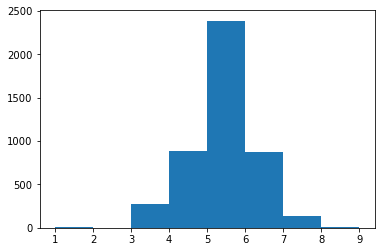

In [90]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [91]:
for i in range(N):
    I_precalc[i] = min(5, I_precalc[i])

In [92]:
print(max(I_precalc))
iters = simulate_precalc_mean(T, W, 743)

5
Result 0: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 1: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 2: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 3: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 4: 6    acc: 5.2    ks: [8, 4, 4, 4, 4, 4]
Result 5: 5    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4]
Result 6: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 7: 5    acc: 5.125    ks: [8, 4, 4, 4, 4]
Result 8: 5    acc: 5.111111111111111    ks: [8, 4, 4, 4, 4]
Result 9: 5    acc: 5.1    ks: [8, 4, 4, 4, 4]
Result 10: 5    acc: 5.090909090909091    ks: [8, 4, 4, 4, 4]
Result 11: 6    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 12: 5    acc: 5.153846153846154    ks: [8, 4, 4, 4, 4]
Result 13: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 14: 1    acc: 4.866666666666666    ks: [8]
Result 15: 1    acc: 4.625    ks: [8]
Result 16: 1    acc: 4.411764705882353    ks: [8]
Result 17: 1    acc: 4.222222222222222    ks: [8]
Result 18: 1    acc: 4.052631578947368    

Result 139: 5    acc: 4.914285714285715    ks: [8, 4, 4, 4, 4]
Result 140: 5    acc: 4.914893617021277    ks: [8, 4, 4, 4, 4]
Result 141: 4    acc: 4.908450704225352    ks: [8, 4, 4, 4]
Result 142: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 4]
Result 143: 6    acc: 4.916666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 144: 5    acc: 4.917241379310345    ks: [8, 4, 4, 4, 4]
Result 145: 5    acc: 4.917808219178082    ks: [8, 4, 4, 4, 4]
Result 146: 5    acc: 4.918367346938775    ks: [8, 4, 4, 4, 4]
Result 147: 4    acc: 4.912162162162162    ks: [8, 4, 4, 4]
Result 148: 4    acc: 4.906040268456376    ks: [8, 4, 4, 4]
Result 149: 5    acc: 4.906666666666666    ks: [8, 4, 4, 4, 4]
Result 150: 5    acc: 4.9072847682119205    ks: [8, 4, 4, 4, 4]
Result 151: 5    acc: 4.907894736842105    ks: [8, 4, 4, 4, 4]
Result 152: 5    acc: 4.908496732026144    ks: [8, 4, 4, 4, 4]
Result 153: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 4]
Result 154: 5    acc: 4.909677419354839    ks: [8, 4, 4, 4, 

Result 270: 5    acc: 5.025830258302583    ks: [8, 4, 4, 4, 3]
Result 271: 5    acc: 5.025735294117647    ks: [8, 3, 3, 2, 2]
Result 272: 4    acc: 5.021978021978022    ks: [8, 4, 4, 4]
Result 273: 4    acc: 5.018248175182482    ks: [8, 4, 4, 4]
Result 274: 4    acc: 5.014545454545455    ks: [8, 4, 4, 4]
Result 275: 5    acc: 5.0144927536231885    ks: [8, 4, 3, 3, 3]
Result 276: 5    acc: 5.014440433212997    ks: [8, 4, 3, 3, 3]
Result 277: 5    acc: 5.014388489208633    ks: [8, 4, 3, 3, 3]
Result 278: 5    acc: 5.014336917562724    ks: [8, 3, 3, 3, 3]
Result 279: 3    acc: 5.007142857142857    ks: [8, 3, 3]
Result 280: 5    acc: 5.00711743772242    ks: [8, 3, 3, 2, 2]
Result 281: 6    acc: 5.01063829787234    ks: [8, 4, 3, 3, 3, 3]
Result 282: 6    acc: 5.014134275618375    ks: [8, 3, 3, 3, 3, 3]
Result 283: 3    acc: 5.007042253521127    ks: [8, 3, 3]
Result 284: 5    acc: 5.007017543859649    ks: [8, 3, 3, 2, 2]
Result 285: 3    acc: 5.0    ks: [8, 3, 3]
Result 286: 6    acc: 5.0034

Result 403: 5    acc: 4.930693069306931    ks: [8, 3, 3, 3, 3]
Result 404: 6    acc: 4.933333333333334    ks: [8, 3, 3, 3, 3, 3]
Result 405: 3    acc: 4.928571428571429    ks: [8, 3, 3]
Result 406: 6    acc: 4.931203931203931    ks: [8, 3, 3, 3, 3, 3]
Result 407: 3    acc: 4.926470588235294    ks: [8, 3, 3]
Result 408: 5    acc: 4.9266503667481665    ks: [8, 4, 3, 3, 3]
Result 409: 5    acc: 4.926829268292683    ks: [8, 3, 3, 3, 3]
Result 410: 4    acc: 4.924574209245742    ks: [8, 4, 4, 4]
Result 411: 4    acc: 4.922330097087379    ks: [8, 4, 4, 4]
Result 412: 6    acc: 4.924939467312349    ks: [8, 4, 3, 3, 3, 3]
Result 413: 3    acc: 4.920289855072464    ks: [8, 3, 3]
Result 414: 5    acc: 4.920481927710844    ks: [8, 3, 3, 2, 2]
Result 415: 6    acc: 4.923076923076923    ks: [8, 4, 3, 3, 3, 3]
Result 416: 5    acc: 4.92326139088729    ks: [8, 3, 3, 3, 3]
Result 417: 5    acc: 4.923444976076555    ks: [8, 4, 3, 3, 3]
Result 418: 5    acc: 4.923627684964201    ks: [8, 3, 3, 3, 3]
Resu

Result 533: 5    acc: 5.0543071161048685    ks: [8, 3, 3, 3, 3]
Result 534: 5    acc: 5.054205607476636    ks: [8, 3, 3, 3, 3]
Result 535: 6    acc: 5.0559701492537314    ks: [8, 3, 3, 3, 3, 3]
Result 536: 6    acc: 5.057728119180633    ks: [8, 3, 3, 3, 3, 3]
Result 537: 4    acc: 5.055762081784387    ks: [8, 3, 3, 3]
Result 538: 5    acc: 5.055658627087198    ks: [8, 3, 3, 3, 3]
Result 539: 5    acc: 5.055555555555555    ks: [8, 3, 3, 3, 3]
Result 540: 6    acc: 5.057301293900185    ks: [8, 3, 3, 3, 3, 3]
Result 541: 6    acc: 5.059040590405904    ks: [8, 3, 3, 3, 3, 3]
Result 542: 5    acc: 5.058931860036832    ks: [8, 3, 3, 3, 3]
Result 543: 5    acc: 5.0588235294117645    ks: [8, 4, 4, 4, 4]
Result 544: 5    acc: 5.058715596330275    ks: [8, 3, 3, 3, 3]
Result 545: 4    acc: 5.056776556776557    ks: [8, 4, 4, 4]
Result 546: 4    acc: 5.0548446069469835    ks: [8, 4, 4, 4]
Result 547: 4    acc: 5.052919708029197    ks: [8, 4, 4, 4]
Result 548: 5    acc: 5.052823315118397    ks: [8, 

Result 666: 4    acc: 5.019490254872563    ks: [8, 3, 3, 3]
Result 667: 4    acc: 5.017964071856287    ks: [8, 3, 3, 3]
Result 668: 4    acc: 5.01644245142003    ks: [8, 3, 3, 3]
Result 669: 4    acc: 5.014925373134329    ks: [8, 3, 3, 3]
Result 670: 4    acc: 5.013412816691505    ks: [8, 3, 3, 3]
Result 671: 4    acc: 5.011904761904762    ks: [8, 4, 4, 4]
Result 672: 4    acc: 5.010401188707281    ks: [8, 3, 3, 3]
Result 673: 4    acc: 5.008902077151335    ks: [8, 3, 3, 3]
Result 674: 4    acc: 5.007407407407407    ks: [8, 3, 3, 3]
Result 675: 4    acc: 5.005917159763314    ks: [8, 3, 3, 3]
Result 676: 4    acc: 5.004431314623338    ks: [8, 4, 4, 4]
Result 677: 4    acc: 5.002949852507375    ks: [8, 3, 3, 3]
Result 678: 4    acc: 5.001472754050074    ks: [8, 4, 4, 4]
Result 679: 4    acc: 5.0    ks: [8, 3, 3, 3]
Result 680: 4    acc: 4.998531571218796    ks: [8, 4, 4, 4]
Result 681: 4    acc: 4.997067448680352    ks: [8, 3, 3, 3]
Result 682: 5    acc: 4.997071742313324    ks: [8, 4, 4

Result 797: 3    acc: 5.022556390977444    ks: [8, 3, 3]
Result 798: 3    acc: 5.020025031289111    ks: [8, 3, 3]
Result 799: 3    acc: 5.0175    ks: [8, 3, 3]
Result 800: 3    acc: 5.01498127340824    ks: [8, 3, 3]
Result 801: 5    acc: 5.014962593516209    ks: [8, 4, 4, 4, 4]
Result 802: 6    acc: 5.0161892901618925    ks: [8, 3, 3, 3, 3, 3]
Result 803: 5    acc: 5.016169154228856    ks: [8, 3, 3, 3, 3]
Result 804: 5    acc: 5.0161490683229815    ks: [8, 3, 3, 2, 2]
Result 805: 7    acc: 5.018610421836228    ks: [8, 3, 3, 3, 3, 3, 3]
Result 806: 6    acc: 5.019826517967782    ks: [8, 3, 3, 3, 3, 3]
Result 807: 5    acc: 5.01980198019802    ks: [8, 3, 3, 3, 3]
Result 808: 6    acc: 5.021013597033375    ks: [8, 3, 3, 3, 3, 3]
Result 809: 5    acc: 5.0209876543209875    ks: [8, 3, 3, 3, 3]
Result 810: 3    acc: 5.018495684340321    ks: [8, 3, 2]
Result 811: 4    acc: 5.017241379310345    ks: [8, 3, 3, 3]
Result 812: 4    acc: 5.015990159901599    ks: [8, 3, 3, 3]
Result 813: 4    acc: 5

Result 928: 5    acc: 5.016146393972013    ks: [8, 3, 3, 3, 3]
Result 929: 5    acc: 5.016129032258065    ks: [8, 4, 4, 4, 4]
Result 930: 5    acc: 5.0161117078410316    ks: [8, 3, 3, 3, 3]
Result 931: 5    acc: 5.016094420600858    ks: [8, 4, 4, 4, 4]
Result 932: 4    acc: 5.015005359056806    ks: [8, 3, 3, 3]
Result 933: 7    acc: 5.017130620985011    ks: [8, 3, 3, 3, 3, 3, 3]
Result 934: 4    acc: 5.016042780748663    ks: [8, 4, 4, 4]
Result 935: 4    acc: 5.014957264957265    ks: [8, 4, 4, 3]
Result 936: 5    acc: 5.014941302027748    ks: [8, 4, 3, 3, 3]
Result 937: 4    acc: 5.013859275053305    ks: [8, 4, 4, 3]
Result 938: 4    acc: 5.012779552715655    ks: [8, 4, 4, 3]
Result 939: 4    acc: 5.011702127659574    ks: [8, 4, 4, 3]
Result 940: 4    acc: 5.0106269925611056    ks: [8, 4, 4, 3]
Result 941: 6    acc: 5.011677282377919    ks: [8, 3, 3, 3, 3, 3]
Result 942: 6    acc: 5.012725344644751    ks: [8, 3, 3, 3, 3, 3]
Result 943: 5    acc: 5.012711864406779    ks: [8, 3, 3, 3, 3]

Result 1061: 5    acc: 4.992467043314501    ks: [8, 4, 4, 3, 3]
Result 1062: 7    acc: 4.994355597365946    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1063: 5    acc: 4.9943609022556394    ks: [8, 3, 3, 3, 3]
Result 1064: 3    acc: 4.992488262910798    ks: [8, 3, 3]
Result 1065: 4    acc: 4.99155722326454    ks: [8, 4, 4, 3]
Result 1066: 5    acc: 4.991565135895033    ks: [8, 3, 3, 3, 3]
Result 1067: 5    acc: 4.991573033707865    ks: [8, 3, 3, 3, 3]
Result 1068: 5    acc: 4.9915809167446215    ks: [8, 4, 4, 3, 3]
Result 1069: 5    acc: 4.991588785046729    ks: [8, 4, 3, 3, 3]
Result 1070: 5    acc: 4.991596638655462    ks: [8, 3, 3, 3, 3]
Result 1071: 5    acc: 4.99160447761194    ks: [8, 4, 4, 3, 3]
Result 1072: 5    acc: 4.9916123019571295    ks: [8, 3, 3, 3, 3]
Result 1073: 5    acc: 4.9916201117318435    ks: [8, 4, 4, 3, 3]
Result 1074: 5    acc: 4.991627906976744    ks: [8, 3, 3, 3, 3]
Result 1075: 4    acc: 4.9907063197026025    ks: [8, 4, 4, 3]
Result 1076: 6    acc: 4.991643454038997   

Result 1193: 5    acc: 4.950586264656616    ks: [8, 3, 3, 3, 3]
Result 1194: 5    acc: 4.9506276150627615    ks: [8, 3, 3, 3, 3]
Result 1195: 5    acc: 4.95066889632107    ks: [8, 3, 3, 3, 3]
Result 1196: 5    acc: 4.950710108604845    ks: [8, 3, 3, 3, 3]
Result 1197: 5    acc: 4.950751252086811    ks: [8, 3, 3, 3, 3]
Result 1198: 5    acc: 4.950792326939116    ks: [8, 3, 3, 3, 3]
Result 1199: 5    acc: 4.950833333333334    ks: [8, 3, 3, 3, 3]
Result 1200: 5    acc: 4.950874271440466    ks: [8, 3, 3, 3, 3]
Result 1201: 5    acc: 4.950915141430948    ks: [8, 3, 3, 3, 3]
Result 1202: 5    acc: 4.950955943474646    ks: [8, 3, 3, 3, 3]
Result 1203: 6    acc: 4.951827242524917    ks: [8, 3, 3, 3, 3, 3]
Result 1204: 6    acc: 4.952697095435685    ks: [8, 3, 3, 3, 3, 3]
Result 1205: 6    acc: 4.9535655058043115    ks: [8, 3, 3, 3, 3, 3]
Result 1206: 7    acc: 4.955260977630489    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1207: 7    acc: 4.956953642384106    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1208: 7    

Result 1320: 6    acc: 4.993943981831945    ks: [8, 3, 3, 3, 3, 3]
Result 1321: 6    acc: 4.994704992435704    ks: [8, 3, 3, 3, 3, 3]
Result 1322: 6    acc: 4.99546485260771    ks: [8, 3, 3, 3, 3, 3]
Result 1323: 6    acc: 4.996223564954683    ks: [8, 3, 3, 3, 3, 3]
Result 1324: 6    acc: 4.996981132075471    ks: [8, 3, 3, 3, 3, 3]
Result 1325: 5    acc: 4.996983408748115    ks: [8, 3, 3, 3, 3]
Result 1326: 5    acc: 4.99698568198945    ks: [8, 3, 3, 3, 3]
Result 1327: 5    acc: 4.996987951807229    ks: [8, 3, 3, 3, 3]
Result 1328: 6    acc: 4.997742663656885    ks: [8, 3, 3, 3, 3, 3]
Result 1329: 6    acc: 4.998496240601503    ks: [8, 3, 3, 3, 3, 3]
Result 1330: 5    acc: 4.998497370398197    ks: [8, 3, 3, 3, 3]
Result 1331: 5    acc: 4.998498498498498    ks: [8, 3, 3, 3, 3]
Result 1332: 5    acc: 4.998499624906226    ks: [8, 3, 3, 3, 3]
Result 1333: 5    acc: 4.998500749625188    ks: [8, 3, 3, 3, 3]
Result 1334: 5    acc: 4.998501872659176    ks: [8, 3, 3, 3, 3]
Result 1335: 5    acc

Result 1448: 5    acc: 5.004140786749482    ks: [8, 4, 4, 4, 4]
Result 1449: 4    acc: 5.003448275862069    ks: [8, 4, 4, 4]
Result 1450: 4    acc: 5.0027567195037905    ks: [8, 4, 4, 4]
Result 1451: 4    acc: 5.00206611570248    ks: [8, 4, 4, 4]
Result 1452: 4    acc: 5.001376462491397    ks: [8, 4, 4, 4]
Result 1453: 4    acc: 5.000687757909216    ks: [8, 4, 4, 4]
Result 1454: 4    acc: 5.0    ks: [8, 4, 4, 4]
Result 1455: 4    acc: 4.999313186813187    ks: [8, 4, 4, 4]
Result 1456: 4    acc: 4.998627316403569    ks: [8, 4, 4, 4]
Result 1457: 4    acc: 4.997942386831276    ks: [8, 4, 4, 4]
Result 1458: 4    acc: 4.9972583961617545    ks: [8, 4, 4, 4]
Result 1459: 4    acc: 4.9965753424657535    ks: [8, 4, 4, 4]
Result 1460: 4    acc: 4.9958932238193015    ks: [8, 4, 4, 4]
Result 1461: 4    acc: 4.995212038303694    ks: [8, 4, 4, 4]
Result 1462: 4    acc: 4.994531784005468    ks: [8, 4, 4, 4]
Result 1463: 4    acc: 4.993852459016393    ks: [8, 4, 4, 4]
Result 1464: 4    acc: 4.9931740

Result 1582: 5    acc: 5.0138976626658245    ks: [8, 3, 3, 3, 3]
Result 1583: 5    acc: 5.013888888888889    ks: [8, 3, 3, 3, 3]
Result 1584: 5    acc: 5.013880126182965    ks: [8, 3, 3, 3, 3]
Result 1585: 5    acc: 5.013871374527112    ks: [8, 3, 3, 3, 3]
Result 1586: 5    acc: 5.013862633900441    ks: [8, 3, 3, 3, 3]
Result 1587: 5    acc: 5.013853904282116    ks: [8, 3, 3, 3, 3]
Result 1588: 5    acc: 5.013845185651353    ks: [8, 3, 3, 3, 3]
Result 1589: 5    acc: 5.013836477987422    ks: [8, 3, 3, 3, 3]
Result 1590: 5    acc: 5.013827781269642    ks: [8, 3, 3, 3, 3]
Result 1591: 5    acc: 5.013819095477387    ks: [8, 3, 3, 3, 3]
Result 1592: 5    acc: 5.013810420590081    ks: [8, 3, 3, 3, 3]
Result 1593: 5    acc: 5.013801756587202    ks: [8, 3, 3, 3, 3]
Result 1594: 5    acc: 5.0137931034482754    ks: [8, 3, 3, 3, 3]
Result 1595: 5    acc: 5.013784461152882    ks: [8, 3, 3, 3, 3]
Result 1596: 5    acc: 5.013775829680651    ks: [8, 3, 3, 3, 3]
Result 1597: 5    acc: 5.0137672090112

Result 1709: 5    acc: 5.044444444444444    ks: [8, 4, 4, 4, 4]
Result 1710: 5    acc: 5.0444184687317355    ks: [8, 4, 4, 4, 4]
Result 1711: 7    acc: 5.045560747663552    ks: [8, 4, 4, 4, 4, 4, 4]
Result 1712: 7    acc: 5.046701692936369    ks: [8, 4, 4, 4, 4, 4, 4]
Result 1713: 5    acc: 5.0466744457409565    ks: [8, 3, 3, 3, 3]
Result 1714: 6    acc: 5.0472303206997085    ks: [8, 3, 3, 3, 3, 3]
Result 1715: 6    acc: 5.047785547785548    ks: [8, 3, 3, 3, 3, 3]
Result 1716: 6    acc: 5.0483401281304605    ks: [8, 3, 3, 3, 3, 3]
Result 1717: 6    acc: 5.048894062863795    ks: [8, 3, 3, 3, 3, 3]
Result 1718: 6    acc: 5.049447353112274    ks: [8, 3, 3, 3, 3, 3]
Result 1719: 6    acc: 5.05    ks: [8, 3, 3, 3, 3, 3]
Result 1720: 6    acc: 5.05055200464846    ks: [8, 3, 3, 3, 3, 3]
Result 1721: 6    acc: 5.0511033681765385    ks: [8, 3, 3, 3, 3, 3]
Result 1722: 6    acc: 5.051654091700522    ks: [8, 3, 3, 3, 3, 3]
Result 1723: 6    acc: 5.052204176334107    ks: [8, 3, 3, 3, 3, 3]
Result 

Result 1839: 5    acc: 5.048369565217391    ks: [8, 4, 4, 4, 4]
Result 1840: 5    acc: 5.048343291689299    ks: [8, 3, 3, 3, 3]
Result 1841: 5    acc: 5.048317046688382    ks: [8, 4, 4, 4, 4]
Result 1842: 5    acc: 5.048290830168204    ks: [8, 4, 4, 4, 4]
Result 1843: 6    acc: 5.04880694143167    ks: [8, 4, 4, 4, 4, 4]
Result 1844: 5    acc: 5.048780487804878    ks: [8, 4, 4, 4, 4]
Result 1845: 5    acc: 5.04875406283857    ks: [8, 4, 3, 3, 3]
Result 1846: 5    acc: 5.048727666486194    ks: [8, 3, 3, 3, 3]
Result 1847: 4    acc: 5.0481601731601735    ks: [8, 4, 3, 3]
Result 1848: 5    acc: 5.048134126554895    ks: [8, 3, 3, 3, 3]
Result 1849: 4    acc: 5.047567567567568    ks: [8, 4, 3, 3]
Result 1850: 4    acc: 5.047001620745543    ks: [8, 4, 3, 3]
Result 1851: 5    acc: 5.046976241900648    ks: [8, 3, 3, 3, 3]
Result 1852: 5    acc: 5.046950890447922    ks: [8, 4, 4, 4, 3]
Result 1853: 5    acc: 5.046925566343042    ks: [8, 4, 3, 3, 3]
Result 1854: 6    acc: 5.047439353099731    ks:

Result 1969: 5    acc: 5.039593908629442    ks: [8, 3, 3, 3, 3]
Result 1970: 5    acc: 5.039573820395738    ks: [8, 3, 3, 3, 3]
Result 1971: 5    acc: 5.039553752535497    ks: [8, 3, 3, 3, 3]
Result 1972: 5    acc: 5.03953370501774    ks: [8, 4, 3, 3, 3]
Result 1973: 5    acc: 5.03951367781155    ks: [8, 4, 3, 3, 3]
Result 1974: 5    acc: 5.039493670886076    ks: [8, 4, 3, 3, 3]
Result 1975: 5    acc: 5.0394736842105265    ks: [8, 4, 3, 3, 3]
Result 1976: 5    acc: 5.039453717754173    ks: [8, 4, 3, 3, 3]
Result 1977: 5    acc: 5.03943377148635    ks: [8, 4, 3, 3, 3]
Result 1978: 5    acc: 5.039413845376453    ks: [8, 4, 3, 3, 3]
Result 1979: 5    acc: 5.039393939393939    ks: [8, 4, 3, 3, 3]
Result 1980: 5    acc: 5.039374053508329    ks: [8, 4, 3, 3, 3]
Result 1981: 6    acc: 5.039858728557014    ks: [8, 4, 3, 3, 3, 3]
Result 1982: 6    acc: 5.040342914775593    ks: [8, 4, 3, 3, 3, 3]
Result 1983: 6    acc: 5.040826612903226    ks: [8, 4, 3, 3, 3, 3]
Result 1984: 6    acc: 5.04130982

Result 2098: 5    acc: 5.046688899475941    ks: [8, 4, 3, 3, 3]
Result 2099: 5    acc: 5.046666666666667    ks: [8, 3, 3, 3, 3]
Result 2100: 5    acc: 5.0466444550214185    ks: [8, 3, 3, 3, 3]
Result 2101: 5    acc: 5.04662226450999    ks: [8, 3, 3, 3, 3]
Result 2102: 5    acc: 5.046600095102235    ks: [8, 3, 3, 3, 3]
Result 2103: 4    acc: 5.046102661596958    ks: [8, 3, 3, 3]
Result 2104: 4    acc: 5.045605700712589    ks: [8, 3, 3, 3]
Result 2105: 4    acc: 5.045109211775879    ks: [8, 3, 3, 3]
Result 2106: 4    acc: 5.044613194114855    ks: [8, 3, 3, 3]
Result 2107: 4    acc: 5.044117647058823    ks: [8, 3, 3, 3]
Result 2108: 4    acc: 5.04362256993836    ks: [8, 3, 3, 3]
Result 2109: 4    acc: 5.0431279620853084    ks: [8, 3, 3, 3]
Result 2110: 4    acc: 5.042633822832781    ks: [8, 3, 3, 3]
Result 2111: 4    acc: 5.042140151515151    ks: [8, 3, 3, 3]
Result 2112: 5    acc: 5.042120208234738    ks: [8, 3, 3, 3, 3]
Result 2113: 5    acc: 5.042100283822138    ks: [8, 3, 3, 3, 3]
Res

Result 2232: 3    acc: 5.0013434841021045    ks: [8, 3, 2]
Result 2233: 3    acc: 5.000447627573859    ks: [8, 3, 2]
Result 2234: 3    acc: 4.999552572706935    ks: [8, 3, 2]
Result 2235: 3    acc: 4.99865831842576    ks: [8, 3, 2]
Result 2236: 3    acc: 4.997764863656683    ks: [8, 3, 2]
Result 2237: 3    acc: 4.996872207327971    ks: [8, 3, 2]
Result 2238: 3    acc: 4.995980348369808    ks: [8, 3, 2]
Result 2239: 3    acc: 4.995089285714286    ks: [8, 3, 2]
Result 2240: 3    acc: 4.9941990182954035    ks: [8, 3, 2]
Result 2241: 3    acc: 4.993309545049064    ks: [8, 3, 2]
Result 2242: 3    acc: 4.992420864913063    ks: [8, 3, 2]
Result 2243: 3    acc: 4.991532976827094    ks: [8, 3, 2]
Result 2244: 3    acc: 4.99064587973274    ks: [8, 3, 2]
Result 2245: 3    acc: 4.989759572573464    ks: [8, 3, 2]
Result 2246: 3    acc: 4.988874054294615    ks: [8, 3, 2]
Result 2247: 3    acc: 4.987989323843417    ks: [8, 3, 2]
Result 2248: 5    acc: 4.987994664295242    ks: [8, 4, 4, 4, 4]
Result 2

Result 2363: 5    acc: 4.976311336717428    ks: [8, 4, 4, 3, 3]
Result 2364: 5    acc: 4.976321353065539    ks: [8, 4, 4, 3, 3]
Result 2365: 6    acc: 4.976754015215554    ks: [8, 4, 3, 3, 3, 3]
Result 2366: 6    acc: 4.977186311787072    ks: [8, 4, 3, 3, 3, 3]
Result 2367: 6    acc: 4.977618243243243    ks: [8, 4, 3, 3, 3, 3]
Result 2368: 6    acc: 4.978049810046433    ks: [8, 3, 3, 3, 3, 3]
Result 2369: 5    acc: 4.978059071729958    ks: [8, 3, 3, 3, 3]
Result 2370: 5    acc: 4.978068325601012    ks: [8, 3, 3, 3, 3]
Result 2371: 5    acc: 4.978077571669477    ks: [8, 3, 3, 3, 3]
Result 2372: 5    acc: 4.978086809945217    ks: [8, 3, 3, 3, 3]
Result 2373: 5    acc: 4.978096040438079    ks: [8, 3, 3, 3, 3]
Result 2374: 5    acc: 4.978105263157895    ks: [8, 3, 3, 3, 3]
Result 2375: 4    acc: 4.977693602693603    ks: [8, 3, 3, 3]
Result 2376: 7    acc: 4.978544383676904    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2377: 7    acc: 4.979394449116905    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2378: 8    a

Result 2497: 4    acc: 4.9423538831064855    ks: [8, 3, 3, 3]
Result 2498: 4    acc: 4.941976790716287    ks: [8, 3, 3, 3]
Result 2499: 4    acc: 4.9416    ks: [8, 3, 3, 3]
Result 2500: 4    acc: 4.941223510595762    ks: [8, 3, 3, 3]
Result 2501: 4    acc: 4.940847322142286    ks: [8, 3, 3, 3]
Result 2502: 5    acc: 4.940870954854175    ks: [8, 3, 3, 3, 3]
Result 2503: 4    acc: 4.940495207667731    ks: [8, 3, 3, 3]
Result 2504: 4    acc: 4.940119760479042    ks: [8, 3, 3, 3]
Result 2505: 4    acc: 4.939744612928971    ks: [8, 3, 3, 3]
Result 2506: 4    acc: 4.939369764658955    ks: [8, 3, 3, 3]
Result 2507: 4    acc: 4.938995215311005    ks: [8, 3, 3, 3]
Result 2508: 4    acc: 4.938620964527701    ks: [8, 3, 3, 3]
Result 2509: 4    acc: 4.938247011952191    ks: [8, 3, 3, 3]
Result 2510: 4    acc: 4.937873357228196    ks: [8, 3, 3, 3]
Result 2511: 4    acc: 4.9375    ks: [8, 3, 3, 3]
Result 2512: 5    acc: 4.937524870672503    ks: [8, 3, 3, 3, 3]
Result 2513: 5    acc: 4.93754972155926

Result 2630: 5    acc: 4.918662105663246    ks: [8, 3, 3, 3, 3]
Result 2631: 4    acc: 4.918313069908814    ks: [8, 3, 3, 3]
Result 2632: 4    acc: 4.91796429927839    ks: [8, 3, 3, 3]
Result 2633: 4    acc: 4.9176157934700075    ks: [8, 3, 3, 3]
Result 2634: 4    acc: 4.917267552182163    ks: [8, 3, 3, 3]
Result 2635: 4    acc: 4.916919575113809    ks: [8, 3, 3, 3]
Result 2636: 5    acc: 4.9169510807736065    ks: [8, 3, 3, 3, 3]
Result 2637: 5    acc: 4.916982562547385    ks: [8, 3, 3, 3, 3]
Result 2638: 5    acc: 4.917014020462297    ks: [8, 3, 3, 3, 3]
Result 2639: 5    acc: 4.9170454545454545    ks: [8, 3, 3, 3, 3]
Result 2640: 5    acc: 4.9170768648239305    ks: [8, 3, 3, 3, 3]
Result 2641: 5    acc: 4.917108251324754    ks: [8, 3, 3, 3, 3]
Result 2642: 5    acc: 4.917139614074915    ks: [8, 3, 3, 3, 3]
Result 2643: 5    acc: 4.917170953101362    ks: [8, 3, 3, 3, 3]
Result 2644: 5    acc: 4.9172022684310015    ks: [8, 3, 3, 3, 3]
Result 2645: 4    acc: 4.916855631141345    ks: [8,

Result 2759: 5    acc: 4.923913043478261    ks: [8, 4, 4, 3, 3]
Result 2760: 5    acc: 4.923940601231438    ks: [8, 3, 3, 3, 3]
Result 2761: 5    acc: 4.9239681390296886    ks: [8, 4, 4, 4, 4]
Result 2762: 5    acc: 4.92399565689468    ks: [8, 4, 4, 4, 4]
Result 2763: 5    acc: 4.924023154848046    ks: [8, 4, 4, 4, 4]
Result 2764: 5    acc: 4.924050632911392    ks: [8, 4, 4, 4, 4]
Result 2765: 5    acc: 4.92407809110629    ks: [8, 4, 4, 4, 4]
Result 2766: 5    acc: 4.924105529454283    ks: [8, 4, 4, 4, 4]
Result 2767: 5    acc: 4.9241329479768785    ks: [8, 4, 4, 4, 4]
Result 2768: 5    acc: 4.924160346695558    ks: [8, 4, 4, 4, 4]
Result 2769: 5    acc: 4.924187725631769    ks: [8, 4, 4, 3, 3]
Result 2770: 5    acc: 4.924215084806929    ks: [8, 4, 4, 3, 3]
Result 2771: 5    acc: 4.924242424242424    ks: [8, 4, 4, 3, 3]
Result 2772: 5    acc: 4.92426974395961    ks: [8, 4, 4, 4, 4]
Result 2773: 5    acc: 4.924297043979813    ks: [8, 4, 4, 4, 4]
Result 2774: 5    acc: 4.924324324324324 

Result 2888: 4    acc: 4.929041190723433    ks: [8, 3, 3, 3]
Result 2889: 4    acc: 4.928719723183391    ks: [8, 3, 3, 3]
Result 2890: 4    acc: 4.928398478035282    ks: [8, 3, 3, 3]
Result 2891: 4    acc: 4.92807745504841    ks: [8, 3, 3, 3]
Result 2892: 4    acc: 4.927756653992396    ks: [8, 3, 3, 3]
Result 2893: 4    acc: 4.92743607463718    ks: [8, 3, 3, 3]
Result 2894: 4    acc: 4.927115716753023    ks: [8, 3, 3, 3]
Result 2895: 7    acc: 4.927831491712707    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2896: 5    acc: 4.927856403175699    ks: [8, 3, 3, 3, 3]
Result 2897: 5    acc: 4.927881297446515    ks: [8, 3, 3, 3, 3]
Result 2898: 5    acc: 4.9279061745429455    ks: [8, 3, 3, 3, 3]
Result 2899: 5    acc: 4.927931034482759    ks: [8, 3, 3, 3, 3]
Result 2900: 6    acc: 4.928300586004826    ks: [8, 3, 3, 3, 3, 3]
Result 2901: 6    acc: 4.928669882839421    ks: [8, 3, 3, 3, 3, 3]
Result 2902: 6    acc: 4.929038925249742    ks: [8, 3, 3, 3, 3, 3]
Result 2903: 6    acc: 4.929407713498622    ks:

Result 3018: 3    acc: 4.930440543226234    ks: [8, 3, 2]
Result 3019: 3    acc: 4.929801324503312    ks: [8, 3, 2]
Result 3020: 3    acc: 4.92916252896392    ks: [8, 3, 2]
Result 3021: 3    acc: 4.928524156187955    ks: [8, 3, 2]
Result 3022: 3    acc: 4.927886205755872    ks: [8, 3, 2]
Result 3023: 3    acc: 4.927248677248677    ks: [8, 3, 2]
Result 3024: 3    acc: 4.926611570247934    ks: [8, 3, 2]
Result 3025: 3    acc: 4.925974884335757    ks: [8, 3, 2]
Result 3026: 3    acc: 4.925338619094814    ks: [8, 3, 2]
Result 3027: 3    acc: 4.924702774108322    ks: [8, 3, 2]
Result 3028: 3    acc: 4.924067348960053    ks: [8, 3, 2]
Result 3029: 3    acc: 4.923432343234324    ks: [8, 3, 2]
Result 3030: 3    acc: 4.922797756516001    ks: [8, 3, 2]
Result 3031: 3    acc: 4.922163588390501    ks: [8, 3, 2]
Result 3032: 3    acc: 4.921529838443785    ks: [8, 3, 2]
Result 3033: 3    acc: 4.92089650626236    ks: [8, 3, 2]
Result 3034: 3    acc: 4.920263591433279    ks: [8, 3, 2]
Result 3035: 3  

Result 3149: 5    acc: 4.924126984126984    ks: [8, 4, 4, 4, 4]
Result 3150: 5    acc: 4.924151063154554    ks: [8, 4, 3, 3, 3]
Result 3151: 5    acc: 4.924175126903553    ks: [8, 4, 3, 3, 3]
Result 3152: 5    acc: 4.924199175388519    ks: [8, 4, 3, 3, 3]
Result 3153: 5    acc: 4.924223208623969    ks: [8, 4, 3, 3, 3]
Result 3154: 5    acc: 4.924247226624406    ks: [8, 4, 4, 4, 4]
Result 3155: 5    acc: 4.924271229404309    ks: [8, 4, 4, 4, 4]
Result 3156: 5    acc: 4.924295216978144    ks: [8, 4, 4, 4, 4]
Result 3157: 5    acc: 4.924319189360355    ks: [8, 4, 4, 4, 4]
Result 3158: 5    acc: 4.924343146565369    ks: [8, 4, 4, 4, 4]
Result 3159: 5    acc: 4.924367088607595    ks: [8, 4, 4, 4, 4]
Result 3160: 5    acc: 4.924391015501423    ks: [8, 4, 4, 4, 4]
Result 3161: 5    acc: 4.924414927261227    ks: [8, 4, 4, 4, 4]
Result 3162: 6    acc: 4.924754979449889    ks: [8, 3, 3, 3, 3, 3]
Result 3163: 6    acc: 4.925094816687737    ks: [8, 3, 3, 3, 3, 3]
Result 3164: 6    acc: 4.925434439

Result 3277: 6    acc: 4.931360585723001    ks: [8, 3, 3, 3, 3, 3]
Result 3278: 5    acc: 4.931381518755718    ks: [8, 3, 3, 3, 3]
Result 3279: 5    acc: 4.9314024390243905    ks: [8, 3, 3, 3, 3]
Result 3280: 5    acc: 4.931423346540689    ks: [8, 3, 3, 3, 3]
Result 3281: 6    acc: 4.931748933577087    ks: [8, 3, 3, 3, 3, 3]
Result 3282: 5    acc: 4.931769722814499    ks: [8, 3, 3, 3, 3]
Result 3283: 5    acc: 4.931790499390987    ks: [8, 3, 3, 3, 3]
Result 3284: 5    acc: 4.931811263318113    ks: [8, 3, 3, 3, 3]
Result 3285: 5    acc: 4.9318320146074255    ks: [8, 3, 3, 3, 3]
Result 3286: 5    acc: 4.9318527532704595    ks: [8, 3, 3, 3, 3]
Result 3287: 5    acc: 4.931873479318734    ks: [8, 3, 3, 3, 3]
Result 3288: 5    acc: 4.931894192763758    ks: [8, 3, 3, 3, 3]
Result 3289: 4    acc: 4.9316109422492405    ks: [8, 3, 3, 3]
Result 3290: 5    acc: 4.931631722880583    ks: [8, 3, 3, 3, 3]
Result 3291: 5    acc: 4.931652490886999    ks: [8, 3, 3, 3, 3]
Result 3292: 5    acc: 4.93167324

Result 3407: 6    acc: 4.936913145539906    ks: [8, 3, 3, 3, 3, 3]
Result 3408: 5    acc: 4.936931651510707    ks: [8, 3, 3, 3, 3]
Result 3409: 5    acc: 4.936950146627566    ks: [8, 3, 3, 3, 3]
Result 3410: 5    acc: 4.936968630900029    ks: [8, 3, 3, 3, 3]
Result 3411: 6    acc: 4.937280187573271    ks: [8, 4, 4, 4, 4, 4]
Result 3412: 5    acc: 4.937298564312921    ks: [8, 4, 4, 4, 4]
Result 3413: 6    acc: 4.937609841827768    ks: [8, 4, 4, 4, 4, 4]
Result 3414: 5    acc: 4.937628111273792    ks: [8, 4, 4, 4, 4]
Result 3415: 5    acc: 4.937646370023419    ks: [8, 4, 4, 4, 4]
Result 3416: 5    acc: 4.93766461808604    ks: [8, 4, 4, 4, 4]
Result 3417: 5    acc: 4.937682855471036    ks: [8, 4, 4, 4, 4]
Result 3418: 5    acc: 4.9377010821877745    ks: [8, 4, 4, 4, 4]
Result 3419: 6    acc: 4.938011695906432    ks: [8, 4, 4, 4, 4, 4]
Result 3420: 6    acc: 4.938322128032739    ks: [8, 4, 4, 4, 4, 4]
Result 3421: 6    acc: 4.938632378725892    ks: [8, 4, 4, 4, 4, 4]
Result 3422: 6    acc:

Result 3532: 4    acc: 4.958675346730824    ks: [8, 4, 4, 4]
Result 3533: 5    acc: 4.958687040181098    ks: [8, 4, 4, 3, 3]
Result 3534: 5    acc: 4.958698727015559    ks: [8, 4, 4, 3, 3]
Result 3535: 5    acc: 4.958710407239819    ks: [8, 4, 4, 3, 3]
Result 3536: 5    acc: 4.958722080859485    ks: [8, 4, 4, 3, 3]
Result 3537: 5    acc: 4.958733747880158    ks: [8, 4, 4, 3, 3]
Result 3538: 5    acc: 4.958745408307432    ks: [8, 4, 4, 3, 3]
Result 3539: 5    acc: 4.958757062146892    ks: [8, 4, 4, 3, 3]
Result 3540: 5    acc: 4.958768709404123    ks: [8, 4, 4, 3, 3]
Result 3541: 5    acc: 4.958780350084698    ks: [8, 4, 4, 3, 3]
Result 3542: 5    acc: 4.958791984194185    ks: [8, 4, 4, 3, 3]
Result 3543: 5    acc: 4.958803611738149    ks: [8, 4, 4, 3, 3]
Result 3544: 5    acc: 4.958815232722144    ks: [8, 4, 4, 3, 3]
Result 3545: 5    acc: 4.9588268471517205    ks: [8, 4, 4, 3, 3]
Result 3546: 5    acc: 4.958838455032422    ks: [8, 4, 4, 3, 3]
Result 3547: 5    acc: 4.958850056369786  

Result 3659: 5    acc: 4.968032786885246    ks: [8, 3, 3, 3, 3]
Result 3660: 5    acc: 4.968041518710735    ks: [8, 3, 3, 3, 3]
Result 3661: 5    acc: 4.9680502457673406    ks: [8, 3, 3, 3, 3]
Result 3662: 5    acc: 4.968058968058968    ks: [8, 3, 3, 3, 3]
Result 3663: 6    acc: 4.968340611353712    ks: [8, 3, 3, 3, 3, 3]
Result 3664: 6    acc: 4.968622100954979    ks: [8, 3, 3, 3, 3, 3]
Result 3665: 5    acc: 4.968630660120022    ks: [8, 3, 3, 3, 3]
Result 3666: 5    acc: 4.968639214616853    ks: [8, 3, 3, 3, 3]
Result 3667: 6    acc: 4.968920392584515    ks: [8, 3, 3, 3, 3, 3]
Result 3668: 5    acc: 4.9689288634505315    ks: [8, 3, 3, 3, 3]
Result 3669: 6    acc: 4.9692098092643056    ks: [8, 3, 3, 3, 3, 3]
Result 3670: 6    acc: 4.969490602015799    ks: [8, 3, 3, 3, 3, 3]
Result 3671: 6    acc: 4.969771241830065    ks: [8, 3, 3, 3, 3, 3]
Result 3672: 5    acc: 4.9697794718214    ks: [8, 3, 3, 3, 3]
Result 3673: 5    acc: 4.969787697332608    ks: [8, 3, 3, 3, 3]
Result 3674: 5    acc

Result 3787: 5    acc: 4.976504751847941    ks: [8, 3, 3, 3, 3]
Result 3788: 5    acc: 4.976510952757984    ks: [8, 3, 3, 3, 3]
Result 3789: 5    acc: 4.976517150395779    ks: [8, 3, 3, 3, 3]
Result 3790: 5    acc: 4.976523344763915    ks: [8, 3, 3, 3, 3]
Result 3791: 5    acc: 4.976529535864979    ks: [8, 3, 3, 3, 3]
Result 3792: 5    acc: 4.976535723701556    ks: [8, 3, 3, 3, 3]
Result 3793: 5    acc: 4.976541908276226    ks: [8, 4, 4, 3, 3]
Result 3794: 5    acc: 4.976548089591568    ks: [8, 3, 3, 3, 3]
Result 3795: 5    acc: 4.976554267650158    ks: [8, 3, 3, 3, 3]
Result 3796: 5    acc: 4.976560442454569    ks: [8, 3, 3, 3, 3]
Result 3797: 5    acc: 4.976566614007372    ks: [8, 3, 3, 3, 3]
Result 3798: 5    acc: 4.976572782311134    ks: [8, 3, 3, 3, 3]
Result 3799: 5    acc: 4.976578947368421    ks: [8, 4, 4, 3, 3]
Result 3800: 5    acc: 4.976585109181794    ks: [8, 3, 3, 3, 3]
Result 3801: 5    acc: 4.976591267753814    ks: [8, 3, 3, 3, 3]
Result 3802: 5    acc: 4.976597423087036

Result 3915: 5    acc: 4.979570990806946    ks: [8, 3, 3, 3, 3]
Result 3916: 5    acc: 4.979576206280316    ks: [8, 3, 3, 3, 3]
Result 3917: 5    acc: 4.979581419091373    ks: [8, 4, 4, 4, 4]
Result 3918: 5    acc: 4.979586629242154    ks: [8, 3, 3, 3, 3]
Result 3919: 5    acc: 4.979591836734694    ks: [8, 3, 3, 3, 3]
Result 3920: 5    acc: 4.979597041571028    ks: [8, 3, 3, 3, 3]
Result 3921: 5    acc: 4.979602243753187    ks: [8, 3, 3, 3, 3]
Result 3922: 5    acc: 4.979607443283202    ks: [8, 3, 3, 3, 3]
Result 3923: 5    acc: 4.979612640163099    ks: [8, 3, 3, 3, 3]
Result 3924: 5    acc: 4.9796178343949045    ks: [8, 3, 3, 3, 3]
Result 3925: 5    acc: 4.979623025980642    ks: [8, 3, 3, 3, 3]
Result 3926: 5    acc: 4.979628214922332    ks: [8, 3, 3, 3, 3]
Result 3927: 4    acc: 4.9793788187372705    ks: [8, 3, 3, 3]
Result 3928: 5    acc: 4.97938406719267    ks: [8, 3, 3, 3, 3]
Result 3929: 5    acc: 4.9793893129771    ks: [8, 3, 3, 3, 3]
Result 3930: 5    acc: 4.979394556092597    

Result 4045: 5    acc: 4.980227385071676    ks: [8, 4, 4, 4, 4]
Result 4046: 5    acc: 4.98023227081789    ks: [8, 4, 4, 4, 4]
Result 4047: 5    acc: 4.980237154150197    ks: [8, 4, 4, 4, 4]
Result 4048: 5    acc: 4.980242035070388    ks: [8, 4, 4, 4, 4]
Result 4049: 6    acc: 4.980493827160494    ks: [8, 3, 3, 3, 3, 3]
Result 4050: 5    acc: 4.980498642310541    ks: [8, 4, 4, 4, 4]
Result 4051: 5    acc: 4.980503455083909    ks: [8, 4, 4, 4, 4]
Result 4052: 5    acc: 4.980508265482359    ks: [8, 4, 4, 4, 4]
Result 4053: 5    acc: 4.980513073507646    ks: [8, 4, 4, 4, 4]
Result 4054: 5    acc: 4.980517879161529    ks: [8, 4, 4, 4, 4]
Result 4055: 6    acc: 4.980769230769231    ks: [8, 4, 4, 4, 4, 4]
Result 4056: 5    acc: 4.980773970914469    ks: [8, 4, 3, 3, 3]
Result 4057: 5    acc: 4.980778708723509    ks: [8, 4, 3, 3, 3]
Result 4058: 5    acc: 4.980783444198078    ks: [8, 4, 4, 4, 4]
Result 4059: 6    acc: 4.981034482758621    ks: [8, 4, 3, 3, 3, 3]
Result 4060: 5    acc: 4.9810391

Result 4172: 5    acc: 4.987299305056315    ks: [8, 3, 3, 3, 3]
Result 4173: 5    acc: 4.987302347867753    ks: [8, 3, 3, 3, 3]
Result 4174: 6    acc: 4.987544910179641    ks: [8, 3, 3, 3, 3, 3]
Result 4175: 5    acc: 4.987547892720307    ks: [8, 3, 3, 3, 3]
Result 4176: 5    acc: 4.987550873832895    ks: [8, 4, 3, 3, 3]
Result 4177: 7    acc: 4.988032551460028    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4178: 7    acc: 4.98851399856425    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4179: 6    acc: 4.988755980861244    ks: [8, 3, 3, 3, 3, 3]
Result 4180: 5    acc: 4.988758670174599    ks: [8, 3, 3, 3, 3]
Result 4181: 5    acc: 4.988761358201817    ks: [8, 3, 3, 3, 3]
Result 4182: 7    acc: 4.989242170690892    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4183: 7    acc: 4.98972275334608    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4184: 5    acc: 4.9897252090800475    ks: [8, 3, 3, 3, 3]
Result 4185: 5    acc: 4.989727663640707    ks: [8, 3, 3, 3, 3]
Result 4186: 5    acc: 4.989730117028899    ks: [8, 3, 3, 3, 3]
Result 4187

Result 4301: 6    acc: 4.9927940492794045    ks: [8, 4, 3, 3, 3, 3]
Result 4302: 5    acc: 4.992795723913549    ks: [8, 3, 3, 3, 3]
Result 4303: 5    acc: 4.992797397769516    ks: [8, 4, 4, 3, 3]
Result 4304: 5    acc: 4.992799070847851    ks: [8, 4, 4, 3, 3]
Result 4305: 5    acc: 4.992800743149094    ks: [8, 4, 4, 3, 3]
Result 4306: 5    acc: 4.992802414673787    ks: [8, 4, 4, 3, 3]
Result 4307: 5    acc: 4.99280408542247    ks: [8, 4, 4, 3, 3]
Result 4308: 5    acc: 4.9928057553956835    ks: [8, 4, 4, 3, 3]
Result 4309: 5    acc: 4.992807424593967    ks: [8, 4, 4, 3, 3]
Result 4310: 5    acc: 4.992809093017861    ks: [8, 4, 4, 3, 3]
Result 4311: 5    acc: 4.992810760667903    ks: [8, 4, 4, 3, 3]
Result 4312: 5    acc: 4.992812427544632    ks: [8, 4, 4, 3, 3]
Result 4313: 5    acc: 4.992814093648586    ks: [8, 4, 4, 3, 3]
Result 4314: 5    acc: 4.992815758980301    ks: [8, 4, 4, 3, 3]
Result 4315: 5    acc: 4.992817423540315    ks: [8, 4, 4, 3, 3]
Result 4316: 5    acc: 4.99281908732

Result 4431: 5    acc: 4.988492779783393    ks: [8, 3, 3, 3, 3]
Result 4432: 5    acc: 4.98849537559215    ks: [8, 3, 3, 3, 3]
Result 4433: 5    acc: 4.988497970230041    ks: [8, 3, 3, 3, 3]
Result 4434: 5    acc: 4.988500563697858    ks: [8, 3, 3, 3, 3]
Result 4435: 5    acc: 4.988503155996393    ks: [8, 3, 3, 3, 3]
Result 4436: 5    acc: 4.988505747126437    ks: [8, 3, 3, 3, 3]
Result 4437: 5    acc: 4.988508337088779    ks: [8, 3, 3, 3, 3]
Result 4438: 5    acc: 4.988510925884208    ks: [8, 3, 3, 3, 3]
Result 4439: 6    acc: 4.988738738738738    ks: [8, 3, 3, 3, 3, 3]
Result 4440: 5    acc: 4.988741274487728    ks: [8, 3, 3, 3, 3]
Result 4441: 5    acc: 4.988743809095002    ks: [8, 3, 3, 3, 3]
Result 4442: 5    acc: 4.988746342561332    ks: [8, 3, 3, 3, 3]
Result 4443: 5    acc: 4.988748874887489    ks: [8, 3, 3, 3, 3]
Result 4444: 5    acc: 4.988751406074241    ks: [8, 3, 3, 3, 3]
Result 4445: 5    acc: 4.988753936122357    ks: [8, 3, 3, 3, 3]
Result 4446: 5    acc: 4.9887564650326

Result 4558: 4    acc: 5.0004386926957665    ks: [8, 4, 4, 4]
Result 4559: 4    acc: 5.000219298245614    ks: [8, 4, 4, 4]
Result 4560: 4    acc: 5.0    ks: [8, 4, 4, 4]
Result 4561: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 4562: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 4563: 4    acc: 4.999780893952673    ks: [8, 4, 4, 4]
Result 4564: 4    acc: 4.999561883899234    ks: [8, 4, 4, 4]
Result 4565: 5    acc: 4.999561979851073    ks: [8, 4, 4, 4, 4]
Result 4566: 5    acc: 4.999562075760894    ks: [8, 4, 4, 4, 4]
Result 4567: 4    acc: 4.9993432574430825    ks: [8, 4, 4, 4]
Result 4568: 4    acc: 4.99912453490917    ks: [8, 4, 4, 4]
Result 4569: 4    acc: 4.99890590809628    ks: [8, 4, 4, 4]
Result 4570: 4    acc: 4.9986873769415885    ks: [8, 4, 4, 4]
Result 4571: 5    acc: 4.998687664041995    ks: [8, 4, 4, 4, 4]
Result 4572: 5    acc: 4.998687951016838    ks: [8, 4, 4, 4, 4]
Result 4573: 5    acc: 4.9986882378662    ks: [8, 4, 4, 4, 4]
Result 4574: 1    acc: 4.997814207650273    ks

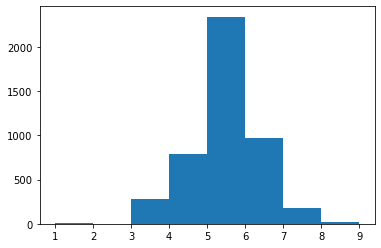

In [93]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()